# Cause Of Deaths Around The World

##### Trong đồ án này, nhóm chúng em xin phép được trình bày một quy trình Khoa Học Dữ Liệu với dataset về những nguyên nhân gây tử vong vòng quanh thế giới, tiền xử lý dữ liệu, đưa ra các câu hỏi, phân tích và đánh giá.

Link Dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/cause-of-deaths-around-the-world?resource=download

# Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Khám phá dữ liệu

### Đọc dữ liệu từ .csv vào dataframe

Sau khi giải nén bộ dữ liệu đã khám phá ở link trên, chúng ta sẽ được một file "cause_of_deaths.csv"

Chúng ta sẽ tiến hành đọc dữ liệu vào một DataFrame tên là cause_of_deaths_df

In [2]:
cause_of_deaths_df = pd.read_csv("cause_of_deaths.csv")
cause_of_deaths_df.head()

Country/Territory Code  Year  Meningitis  \
0       Afghanistan  AFG  1990        2159   
1       Afghanistan  AFG  1991        2218   
2       Afghanistan  AFG  1992        2475   
3       Afghanistan  AFG  1993        2812   
4       Afghanistan  AFG  1994        3027   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  ...  \
0                      2087       93      1370                    1538  ...   
1                      2153      189      1391                    2001  ...   
2                      2441      239      1514                    2299  ...   
3                      2837      108      1687                    2589  ...   
4                      3081      211      1809                    2849  ...   

   Diabetes Mellitus  Chronic Kidney Disease  Poisonings  \
0               2108                    3709         338   
1               2120                    3724         351   
2               2153                    3776         386   
3               2195                    3862         425   
4               2231                    3932         451   

   Protein-Energy Malnutrition  Road Injuries  Chronic Respiratory Diseases  \
0                         2054           4154                          5945   
1                         2119           4472                          6050   
2                         2404           5106                          6223   
3                         2797           5681                          6445   
4                         3038           6001                          6664   

   Cirrhosis and Other Chronic Liver Diseases  Digestive Diseases  \
0                                        2673                5005   
1                                        2728                5120   
2                                        2830                5335   
3                                        2943                5568   
4                                        3027                5739   

   Fire, Heat, and Hot Substances  Acute Hepatitis  
0                             323             2985  
1                             332             3092  
2                             360             3325  
3                             396             3601  
4                             420             3816  

[5 rows x 34 columns]

### Kiểm tra số dòng và số cột của dữ liệu

Kiểm tra số dòng và số cột của dữ liệu, sau đó lưu vào hai biến tên là num_cols và num_rows

In [3]:
def countCols(df):
    result = len(df.axes[1])
    return result

def countRows(df):
    result = len(df.axes[0])
    return result

num_cols = countCols(cause_of_deaths_df)
num_rows = countRows(cause_of_deaths_df)


## Mỗi một cột ( thuộc tính ) có ý nghĩa như thế nào ?

Theo như mô tả của dữ liệu trên kaggle, thì chúng ta có một số dòng dữ liệu cần lưu ý như sau

01. Country/Territory - Tên của nước trên dòng dữ liệu đó

02. Code - Mã của các nước tương ứng

03. Year - Năm diễn ra khi thu thập thông số

Và các cột thứ 4 -> 32 là số người tử vong với nguyên nhân tử vong tương ứng

## Chúng ta sẽ liệt kê các nguyên nhân tử vong này là gì

Liệt kê tất cả các loại nguyên nhân và lưu vào biến names_cause


In [4]:
names_cause = pd.Series(cause_of_deaths_df.columns.values[3:])
names_cause

0                                     Meningitis
1        Alzheimer's Disease and Other Dementias
2                            Parkinson's Disease
3                       Nutritional Deficiencies
4                                        Malaria
5                                       Drowning
6                         Interpersonal Violence
7                             Maternal Disorders
8                                       HIV/AIDS
9                             Drug Use Disorders
10                                  Tuberculosis
11                       Cardiovascular Diseases
12                  Lower Respiratory Infections
13                            Neonatal Disorders
14                         Alcohol Use Disorders
15                                     Self-harm
16                  Exposure to Forces of Nature
17                            Diarrheal Diseases
18          Environmental Heat and Cold Exposure
19                                     Neoplasms
20                  

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu không phù hợp không?

Lấy kiểu dữ liệu của các cột và lưu vào series cols_dtype

In [5]:
cols_name = list(cause_of_deaths_df.columns.values)
cols_dtype = pd.Series(cause_of_deaths_df[cols_name].dtypes)
cols_dtype

Country/Territory                             object
Code                                          object
Year                                           int64
Meningitis                                     int64
Alzheimer's Disease and Other Dementias        int64
Parkinson's Disease                            int64
Nutritional Deficiencies                       int64
Malaria                                        int64
Drowning                                       int64
Interpersonal Violence                         int64
Maternal Disorders                             int64
HIV/AIDS                                       int64
Drug Use Disorders                             int64
Tuberculosis                                   int64
Cardiovascular Diseases                        int64
Lower Respiratory Infections                   int64
Neonatal Disorders                             int64
Alcohol Use Disorders                          int64
Self-harm                                     

### Nhận xét kiểu dữ liệu 

Ta có các kiểu từ Year cho tới các kiểu dữ liệu số lượng người tử vong về một nguyên nhân nào đó thuộc kiểu dữ liệu int và là numercial

Chúng ta sẽ cần tìm hiểu cụ thể kiểu dữ liệu của Country/Territory và Code là gì

Ta sẽ viết một hàm để tìm hiểu kỹ hơn kiểu dữ liệu của cột trên, ở đây chúng ta sẽ sử dụng phương thức apply để làm.

In [6]:
def open_object_dtype(s):
    dtypes = set()
    
    #Ta sẽ append lần lượt các type của từng s[i] vào trong set
    ##Thì chắc chắn rằng bên trong dtypes sẽ chỉ có một kiểu duy nhất, cho nên rằng set này chỉ chứa 1 phần tử
    
    ##Chúng ta lấy ra một series dùng apply với hàm type lên tất cả các s[i]
    object_series = s.apply(type)
    
    ##Sau đó dùng chính hàm dtypes.add để apply vô series object_series vừa xử lý xong
    object_series.apply(dtypes.add)
    return dtypes

type_of_country = open_object_dtype(cause_of_deaths_df['Country/Territory'])
type_of_code = open_object_dtype(cause_of_deaths_df['Code'])

### Nhận xét kiểu dữ liệu object

Vậy ta có thể thấy rằng, kiểu dữ liệu của hai cột Country/Territory và Code là string, vậy rằng trong bộ dữ liệu này chúng ta sẽ không cần phải tiền xử lý/ chuẩn hóa dữ liệu lại để có thể thực hiện các câu hỏi

## Có dòng nào bị lặp hay không ?

Ta xác định trong DataFrame có dòng nào bị lặp không để tiến hành lọc và đưa ra các nhận xét. Lưu kết quả ở trong biến have_duplicated_rows, trả về true nếu như có các dòng bị lặp, trả về false nếu như không có dòng nào bị lăp

In [7]:
temp = np.array(cause_of_deaths_df.duplicated())

##Check xem có tồn tại phần tử nào là True hay không, nếu không có bất kỳ một phần tử nào là true thì trả về False
have_duplicated_rows = np.any(temp)
have_duplicated_rows

False

Vậy rằng không có dòng nào trong đây bị lặp, các dữ liệu hoàn toàn độc lập với nhau

### Kiểm tra xem trong các cột có dữ liệu thuộc kiểu Numercial có dữ liệu nào bị thiếu hay là không

Ta sẽ kiểm tra xem trong lần lượt các cột số lượng người tử vong với các nguyên nhân tương ứng xem có giá trị nào trong đó bị thiếu không. Ta cần kiểm tra thông số này để đưa ra hướng giải quyết tiêp theo xem liệu rằng ta có nên kiểm tra tỉ lệ phần trăm dữ liệu bị thiếu và lần lượt đưa ra các kiểm tra cho phân bố dữ liệu. Kết quả lưu vào biến numberOfMissing

In [8]:
def countMissingNumber(arr):
    return np.count_nonzero(np.isnan(arr))

numberOfMissing = countMissingNumber(cause_of_deaths_df[names_cause])

## Trong bộ dữ liệu có bao nhiêu đất nước được khảo sát ? Có đất nước Việt Nam được khảo sát ở đây không ?

Ta sẽ kiểm tra xem trong bộ dữ liệu có bao nhiêu đất nước và có tồn tại đất nước Việt Nam không, lưu kết quả lần lượt ở trong 2 biến num_countries (Integer) và isContainsVietnam (bool)

In [9]:
##Lấy series Country ra và đếm số lượng các nước riêng biệt trong bộ dữ liệu
countries_series = cause_of_deaths_df['Country/Territory']
countries_unique = np.unique(countries_series)
num_countries = len(np.unique(countries_unique))

isContainsVietnam = len(countries_unique[countries_unique == 'Vietnam']) != 0

print(num_countries, isContainsVietnam)


204 True


Vậy rằng bộ dữ liệu ở đây có 204 quốc gia và có tồn tại sự khảo sát của đất nước Việt Nam

## Các năm được khảo sát trong bộ dữ liệu trải dài từ năm mấy tới năm mấy ?

Liệt kê trong bộ dữ liệu các năm trải dài từ năm bao nhiêu tới năm bao nhiêu, lưu kết quả vô 3 biến years, min_years, max_years



In [10]:
years = np.unique(cause_of_deaths_df['Year'])

min_years = min(years)
max_years = max(years)

print(years,min_years,max_years)


[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019] 1990 2019


### Vậy rằng trong bộ dữ liệu này thực hiện khảo sát từ năm 1990 tới năm 2019, tổng cộng là 30 năm, vậy câu hỏi đặt ra là có nước nào không có đủ dữ liệu trải dài từ năm 1990 tới năm 2019 không ?

Liệt kê danh sách tất cả các nước mà không đủ dữ liệu trải dài từ năm 1990 tới năm 2019, lưu vào Series not_full_years_countries và số lượng vào biến not_full_years_countries_count



In [11]:
## Ý tưởng : Nhờ nhận xét rằng mỗi dòng đều khác biệt nhau, cho nên rằng miễn là số dòng của một nước là 30 thì
## thì nước đó sẽ cover đủ dữ liệu từ năm 1990 tới năm 2019

## Tách cá
count_count_df = cause_of_deaths_df.value_counts('Country/Territory')
not_full_years_countries = pd.Series(count_count_df[count_count_df < 30])
not_full_years_countries_count = len(not_full_years_countries)

Hmmm... Vậy chúng ta có thể thấy rằng, ở đây tất cả các nước đều có đầy đủ dữ liệu từ năm 1990 tới năm 2019

## Với mỗi loại nguyên nhân tử vong, số lượng người tử vong nhiều nhất và ít nhất của từng nguyên nhân đó là bao nhiêu trong tất cả các năm khảo sát ?

Ở đây chúng ta sẽ dùng vòng lặp để lặp qua tên các loại nguyên nhân (đã thu thập ở trên) để lấy được từng Series của từng loại nguyên nhân, chi phí cho vòng lặp này là rất nhỏ ( bằng với số lượng cột Numercial là 30 lần )

Dữ liệu của từng nguyên nhân sẽ được lưu trong một dictionary cause_death_profile với key là tên nguyên nhân và value là list chứa 2 phần từ là số lượng min và max người tử vong về nguyên nhân đó

In [12]:
##Ta có biến names_cause chứa số lượng nguyên nhân các loại bệnh

def getMin(arr):
    return arr.min()
    
    
def getMax(arr):
    return arr.max()

cause_death_profile = {}

for name_cause in names_cause:
    cause_Series = cause_of_deaths_df[name_cause]
    cause_num_min = getMin(cause_Series)
    cause_num_max = getMax(cause_Series)
    cause_death_profile[name_cause] = [cause_num_min,cause_num_max]
    
cause_death_profile
    

{'Meningitis': [0, 98358],
 "Alzheimer's Disease and Other Dementias": [0, 320715],
 "Parkinson's Disease": [0, 76990],
 'Nutritional Deficiencies': [0, 268223],
 'Malaria': [0, 280604],
 'Drowning': [0, 153773],
 'Interpersonal Violence': [0, 69640],
 'Maternal Disorders': [0, 107929],
 'HIV/AIDS': [0, 305491],
 'Drug Use Disorders': [0, 65717],
 'Tuberculosis': [0, 657515],
 'Cardiovascular Diseases': [4, 4584273],
 'Lower Respiratory Infections': [0, 690913],
 'Neonatal Disorders': [0, 852761],
 'Alcohol Use Disorders': [0, 55200],
 'Self-harm': [0, 220357],
 'Exposure to Forces of Nature': [0, 222641],
 'Diarrheal Diseases': [0, 1119477],
 'Environmental Heat and Cold Exposure': [0, 29048],
 'Neoplasms': [1, 2716551],
 'Conflict and Terrorism': [0, 503532],
 'Diabetes Mellitus': [1, 273089],
 'Chronic Kidney Disease': [0, 222922],
 'Poisonings': [0, 30883],
 'Protein-Energy Malnutrition': [0, 202241],
 'Road Injuries': [0, 329237],
 'Chronic Respiratory Diseases': [1, 1366039],
 'C

# Đưa ra các câu hỏi cần trả lời

***Câu 1:*** *Căn bệnh nào chiếm tỷ lệ cao nhất vào năm 2019? Và căn bệnh đó biến đổi theo từng năm như thế nào ?*

***Câu 2:*** *Tổng số lượng người tử vong qua từng năm sẽ như thế nào ? Số lượng người tử vong theo từng loại bệnh theo từng năm như thế nào ? có biểu đồ nào để visualize sự thay đổi này không?*

***Câu 3:*** *Tổng số lượng người tử vong nhiều nhất của từng năm là thuộc về nước nào ? Có thể đưa ra được biểu đồ phân bố ?*

***Câu 4:*** *Với từng năm, bệnh nào có tổng số người tử vong nhiều nhất ? Liệt kê ra top 5 mỗi năm*

***Câu 5:*** Hãy phân tích về tỉ lệ tử vong của Việt Nam bằng cách trả lời những câu hỏi sau đây:

- *Tổng số người tử vong ở Việt Nam trong khảo sát này từ năm 1990-2019? Từ đó ta có nhận xét gì?*
- *Kể tên các nguyên nhân bệnh gây tử vong phổ biến nhất của Việt Nam từ 1990 tới 2019? Nhận xét về các nguyên nhân này?*
- *Tỉ lệ các nguyên nhân tử vong của Việt Nam so với mặt bằng chung thế giới như thế nào ? Visualize biểu đồ so sánh ?*

***Câu 6:*** *Hãy nhận xét về tỉ lệ các bệnh không lây nhiễm và các bệnh lây nhiễm trong thời gian từ 1990 đến 2019. Từ đó hãy đưa ra kết luận.*

***Câu 7:*** *Hãy phân tích và nhận xét về nguyên nhân tử vong của các quốc gia có thu nhập thấp nhất*

***Câu 8:*** *Có thể áp dụng mô hình dự đoán nào không ???*






# Câu 1: Căn bệnh nào chiếm tỷ lệ cao nhất vào năm 2019 ? Và căn bệnh đó biến đổi theo từng năm như thế nào ?

In [15]:
#Lấy những dòng dữ liệu của năm 2019
mask = cause_of_deaths_df['Year'] == 2019 
df = cause_of_deaths_df[mask]

In [16]:
#Tính tổng ca tử vong trong năm 2019 trên toàn thế giới
cause_of_deaths_total = []

def countSumCauseOfDeaths(cols): #Hàm tính tổng
    total = cols.sum()
    return total

#Duyệt qua từng cột ứng với từng bệnh và tính tổng, lưu vào list cause_of_deaths_total
for cols in df.columns[3:]:
    column = df[cols]
    cause_of_deaths_total.append(countSumCauseOfDeaths(column))

label = np.array(df.columns[3:]) #List chứa tên từng bệnh

Vẽ biểu đồ đường thể hiện số lượng ca tử vong

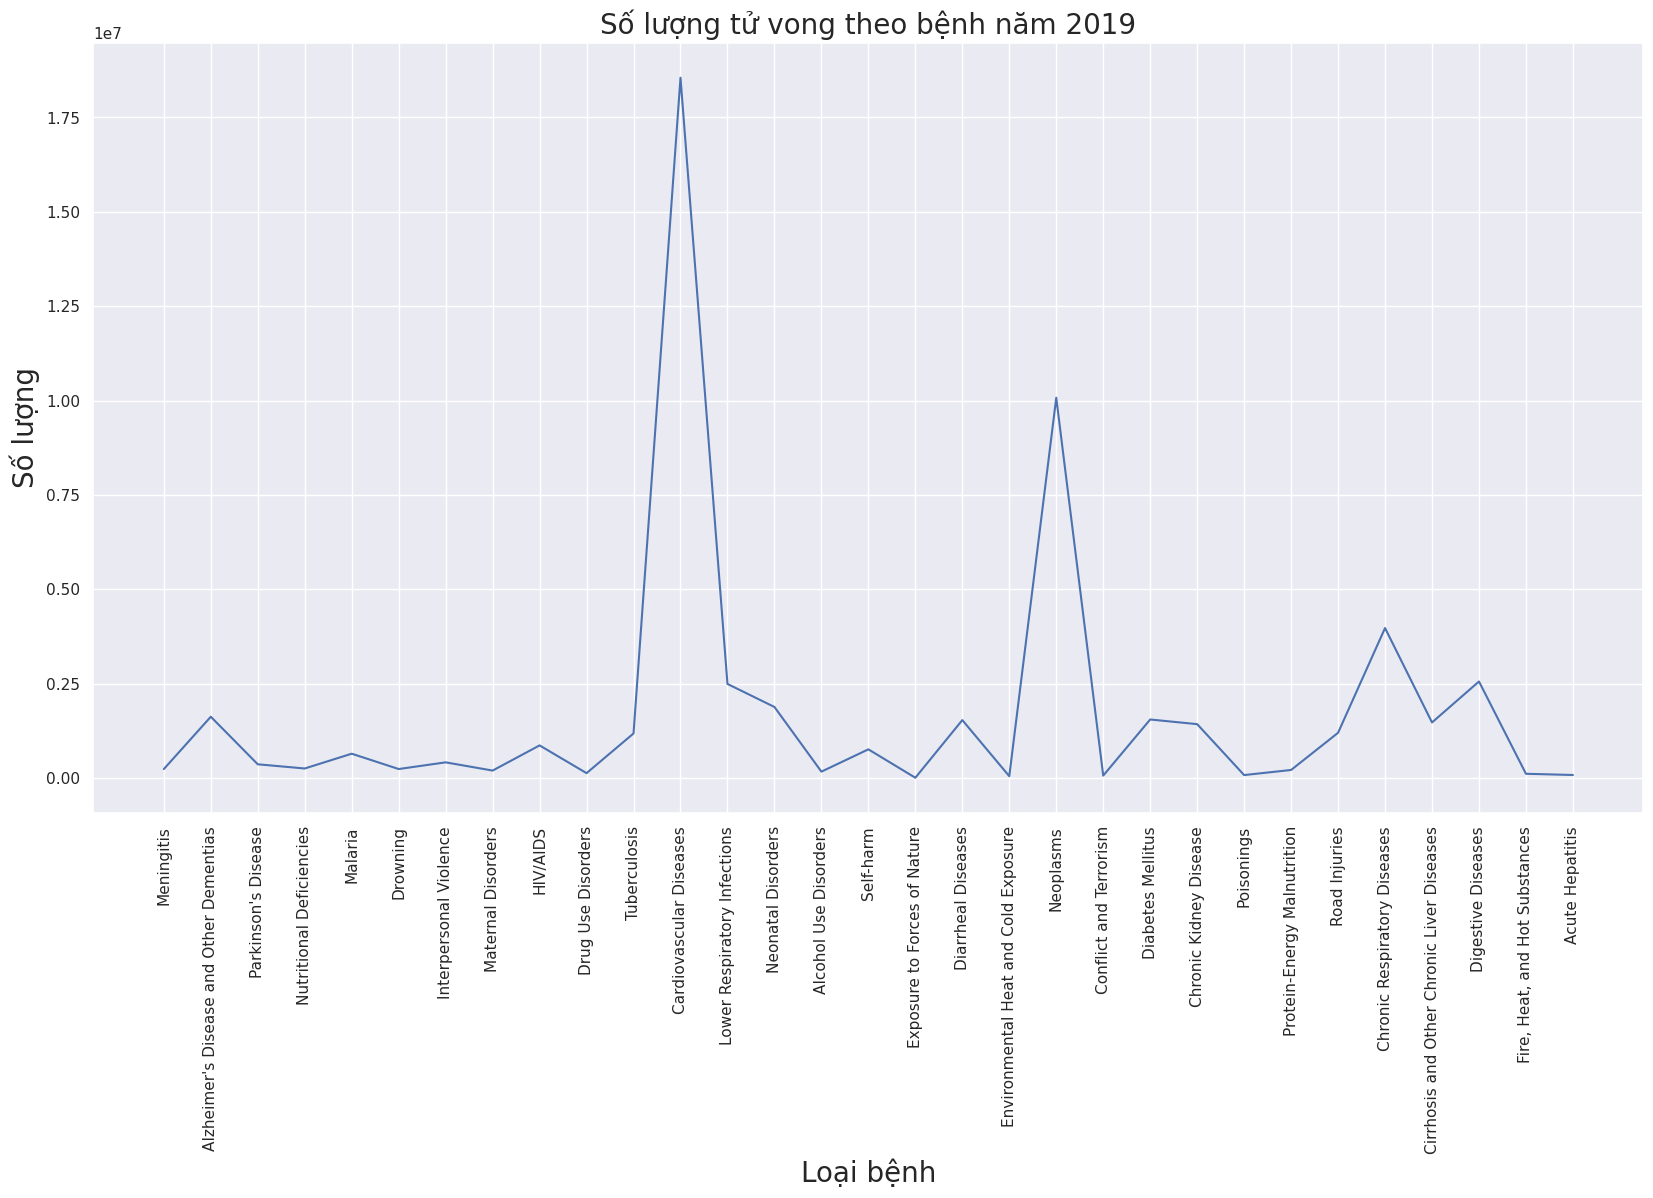

In [17]:
plt.figure(figsize = (20,10))

plt.plot(label, cause_of_deaths_total)

#customize chart
plt.title('Số lượng tử vong theo bệnh năm 2019', fontsize = 20)
plt.xlabel('Loại bệnh', fontsize = 20)
plt.ylabel('Số lượng', fontsize = 20)
plt.xticks(rotation = 90)

plt.show()

Có thể thấy bệnh tim mạch (Cardiovascular Diseases) chiếm số lượng tử vong cao nhất, chính vì vậy chúng ta hãy cùng khảo sát xem xu hướng tử vong do bệnh tim mạch biến đổi như thế nào trong 30 năm qua

**Xu hướng của nguyên nhân gây tử vong cao nhất và thấp nhất**

**Cardiovascular Diseases**

In [18]:
#Lấy tổng số lượng tử vong mỗi năm do bệnh tim mạch
cardiovascular = cause_of_deaths_df.groupby('Year')['Cardiovascular Diseases'].sum()

Vẽ biểu đồ đường thể hiện qua từng năm

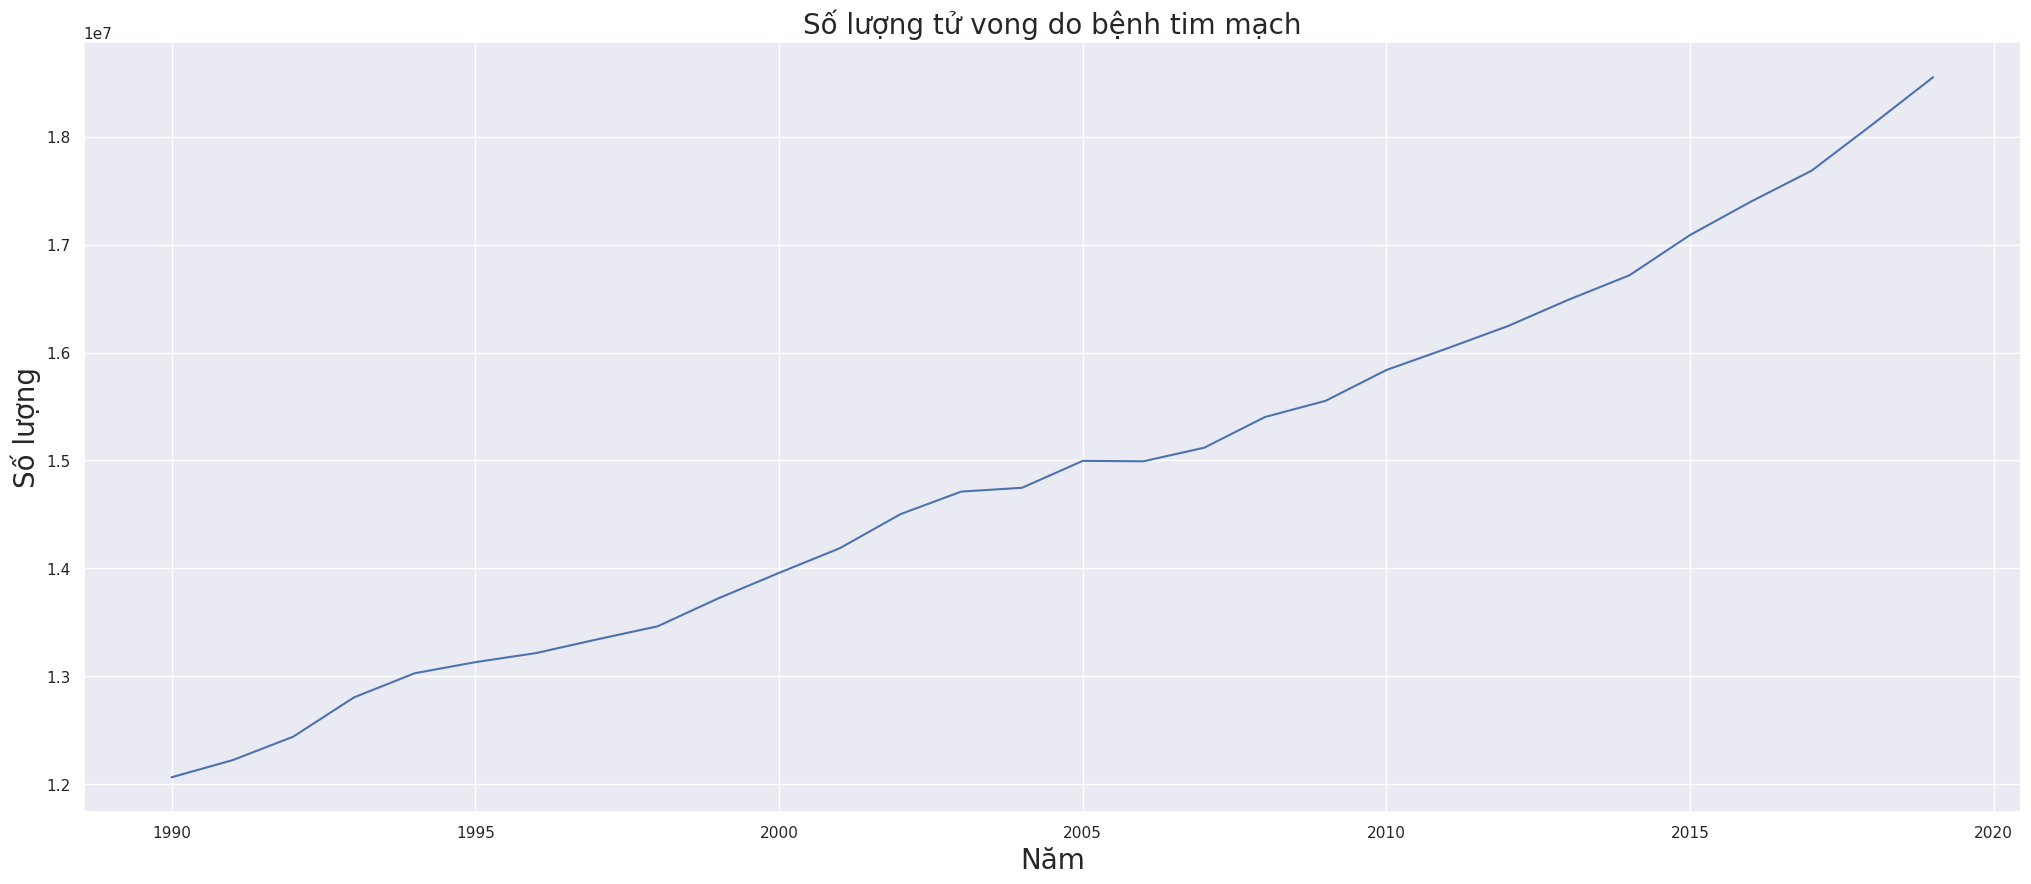

In [19]:
plt.figure(figsize = (25,10))

plt.plot(cardiovascular.index, cardiovascular.values)

#customize chart
plt.title('Số lượng tử vong do bệnh tim mạch', fontsize = 20)
plt.xlabel('Năm', fontsize = 20)
plt.ylabel('Số lượng', fontsize = 20)


plt.show()

Như biểu đồ trên biểu diễn, số lượng tử vong do bệnh tim mạch tăng liên tục trong suốt 30 năm qua\
**Giải thích:** Do dân số mỗi năm không ngừng tăng lên, trong khi đó bệnh tim mạch là một căn bệnh có tính di truyền cao cũng như có thể mắc phải do thói quen sinh hoạt. Chính vì vậy mà số lượng người mắc phải bệnh này không ngừng tăng lên theo từng năm và số lượng tử vong cũng tương tự thế

Khi nhìn vào biểu đồ năm 2019 ta có thể thấy được số lượng người tử vong do thiên tai (Exposure to Forces of Nature) chiếm số lượng rất ít, vì thế cùng khảo sát xem xu hướng của nguyên nhân tử vong này 

**Exposure to Forces of Nature**

In [20]:
#Lấy tổng số lượng tử vong mỗi năm do thiên tai
nature = cause_of_deaths_df.groupby('Year')['Exposure to Forces of Nature'].sum()

Vẽ biểu đồ đường thể hiện qua từng năm

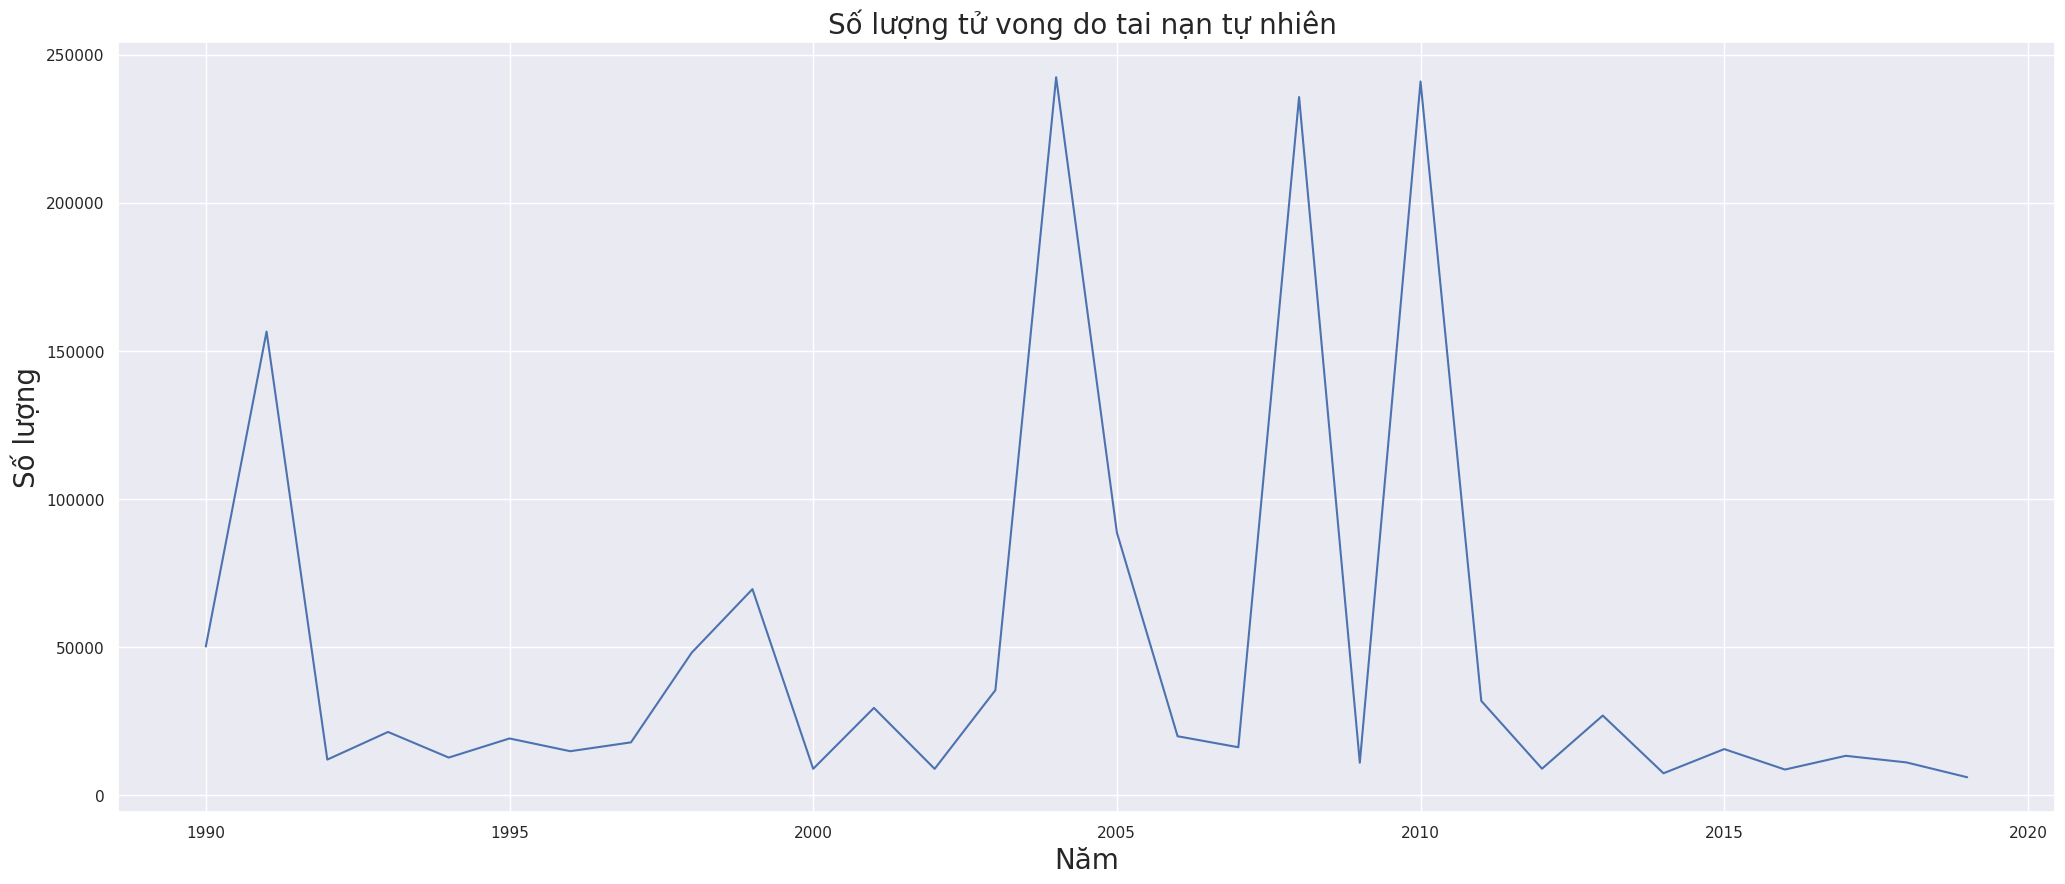

In [21]:
plt.figure(figsize = (25,10))

plt.plot(nature.index, nature.values)

#customize chart
plt.title('Số lượng tử vong do tai nạn tự nhiên ', fontsize = 20)
plt.xlabel('Năm', fontsize = 20)
plt.ylabel('Số lượng', fontsize = 20)


plt.show()

Khác với bệnh tim mạch, nguyên nhân tử vong do thiên tại biến động liên tục trong 30 năm vừa qua, nhưng đặc biệt có xu hướng giảm đáng kể trong 10 năm đổ lại\
**Giải thích:** Do con người đã biết cách phòng chống trước những tai nạn bất ngờ do thiên tai, cách bảo vệ hợp lý trước tự nhiên nên các ca tử vong do nguyên nhân này đã giảm đi trong những năm gần đây. Mặt khác tai nạn xảy ra do tự nhiên tương đối hiếm hơn so với các nguyên nhân khác điển hình như mắc bệnh, chính vì vậy mà chiếm số lượng tử vong ít nhất trong tổng số các nguyên nhân

# Câu 2: Tổng số lượng người tử vong qua từng năm sẽ như thế nào ? Số lượng người tử vong theo từng loại bệnh theo từng năm như thế nào ? Có biểu đồ nào để biểu diễn sự thay đổi này không?

Mục đích: Để xem rằng tình hình thế giới trong những năm 1990 tới 2019 thay đổi như thế nào ? Trả lời cho câu hỏi rằng liệu nền y tế chung của thế giới có được cải thiện hay không ?

Hướng làm: Tạo ra một dataframe với 2 cột là năm và tổng số lượng người tương ứng với lại năm đó

Các bước làm: 


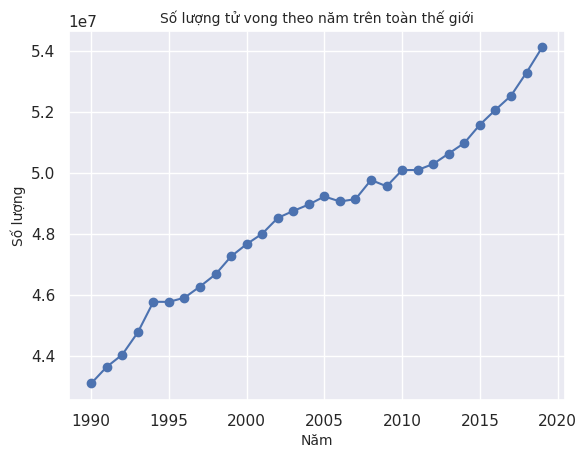

In [22]:
##Giải quyết số Tổng số lượng người tử vong theo từng năm

num_causeOfDeath_by_year = cause_of_deaths_df.groupby("Year")[names_cause].sum()
num_causeOfDeath_by_year


##Sử dụng iloc là để không cộng thêm con số năm ở cột "Year" vào 

total_causeOfDeath_by_year = num_causeOfDeath_by_year.iloc[:, 1:].sum(axis = 1)

##Reset index và dùng phép đổi tên cột

total_causeOfDeath_by_year = total_causeOfDeath_by_year.reset_index()
total_causeOfDeath_by_year = total_causeOfDeath_by_year.rename(columns = {0 : "TotalSum"})
total_causeOfDeath_by_year = total_causeOfDeath_by_year.set_index(['Year'])

##Visuallize lên

plt.plot(total_causeOfDeath_by_year['TotalSum'], marker = 'o')
plt.title('Số lượng tử vong theo năm trên toàn thế giới', fontsize = 10)
plt.xlabel('Năm', fontsize = 10)
plt.ylabel('Số lượng', fontsize = 10)

plt.show()



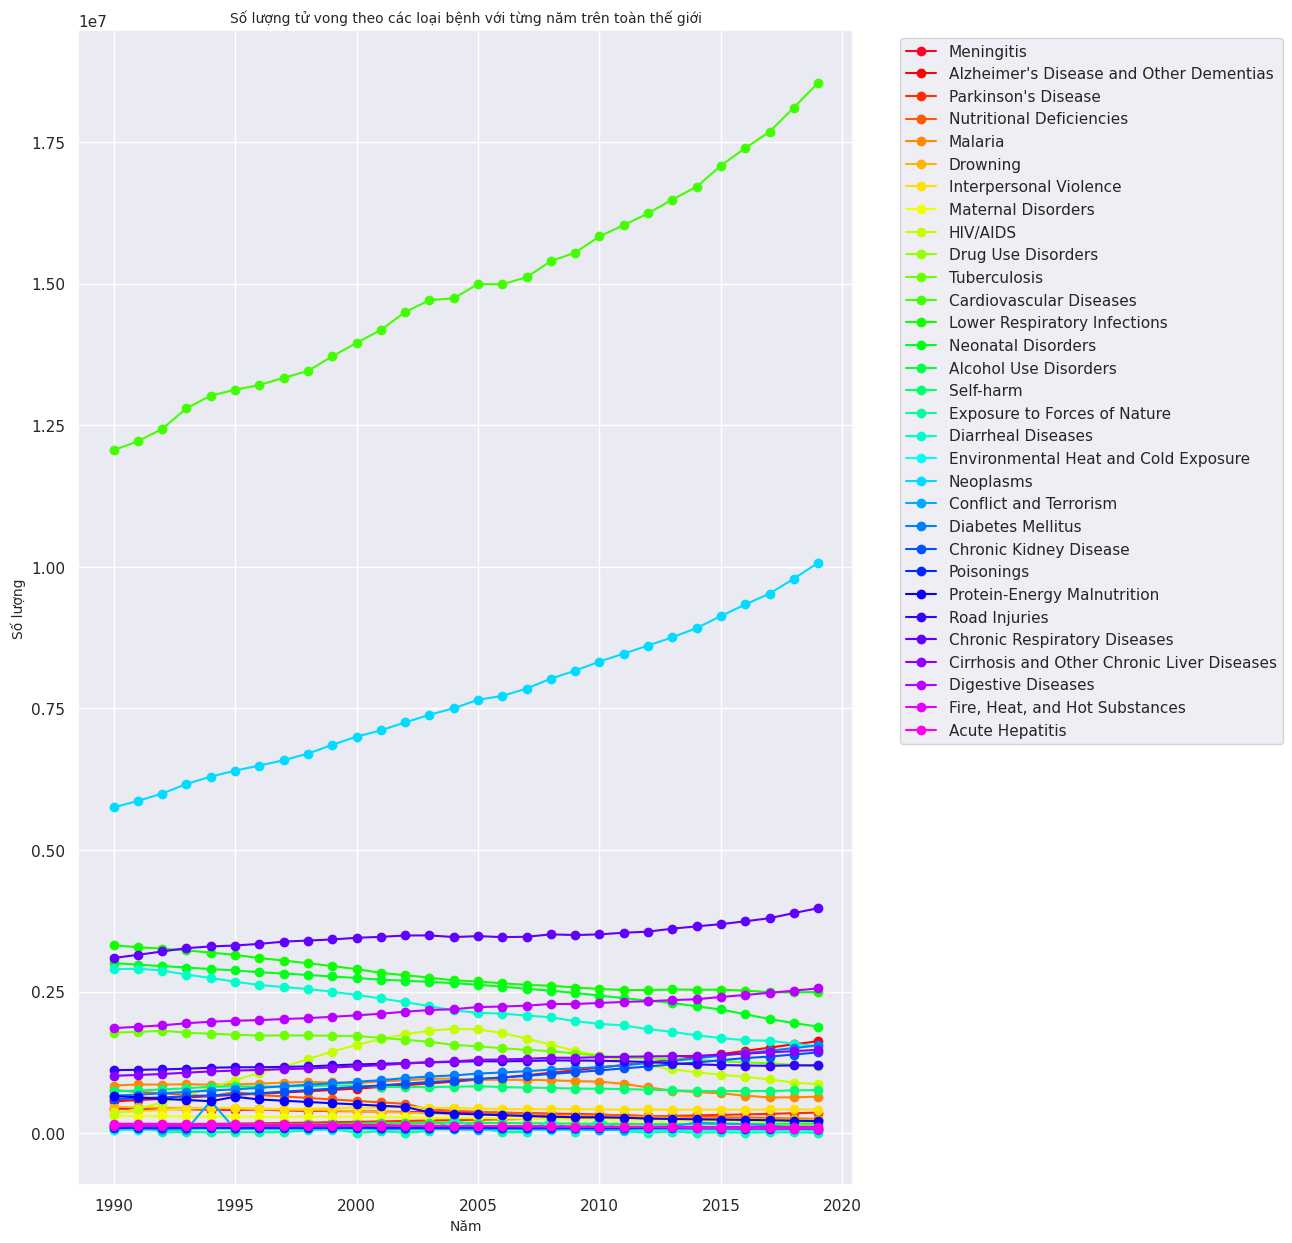

In [23]:
fig = plt.figure(figsize =(10, 15))

NUM_COLORS = len(names_cause)

cm = plt.get_cmap('gist_rainbow')
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

plt.plot(num_causeOfDeath_by_year, marker = 'o')
plt.title('Số lượng tử vong theo các loại bệnh với từng năm trên toàn thế giới', fontsize = 10)
plt.xlabel('Năm', fontsize = 10)
plt.ylabel('Số lượng', fontsize = 10)
plt.legend(names_cause,bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

Hmmmm với biểu đồ trên thì việc chúng ta nhận thấy rằng ngoài hai nguyên nhân tử vong về bệnh tim mạch và bệnh khối u ra thì chúng ta khó lòng mà có thể nhìn rõ dữ liệu biến đổi như thế nào. Ta sẽ plot thêm một biểu đồ trong đó loại bỏ hai loại bệnh trên ra

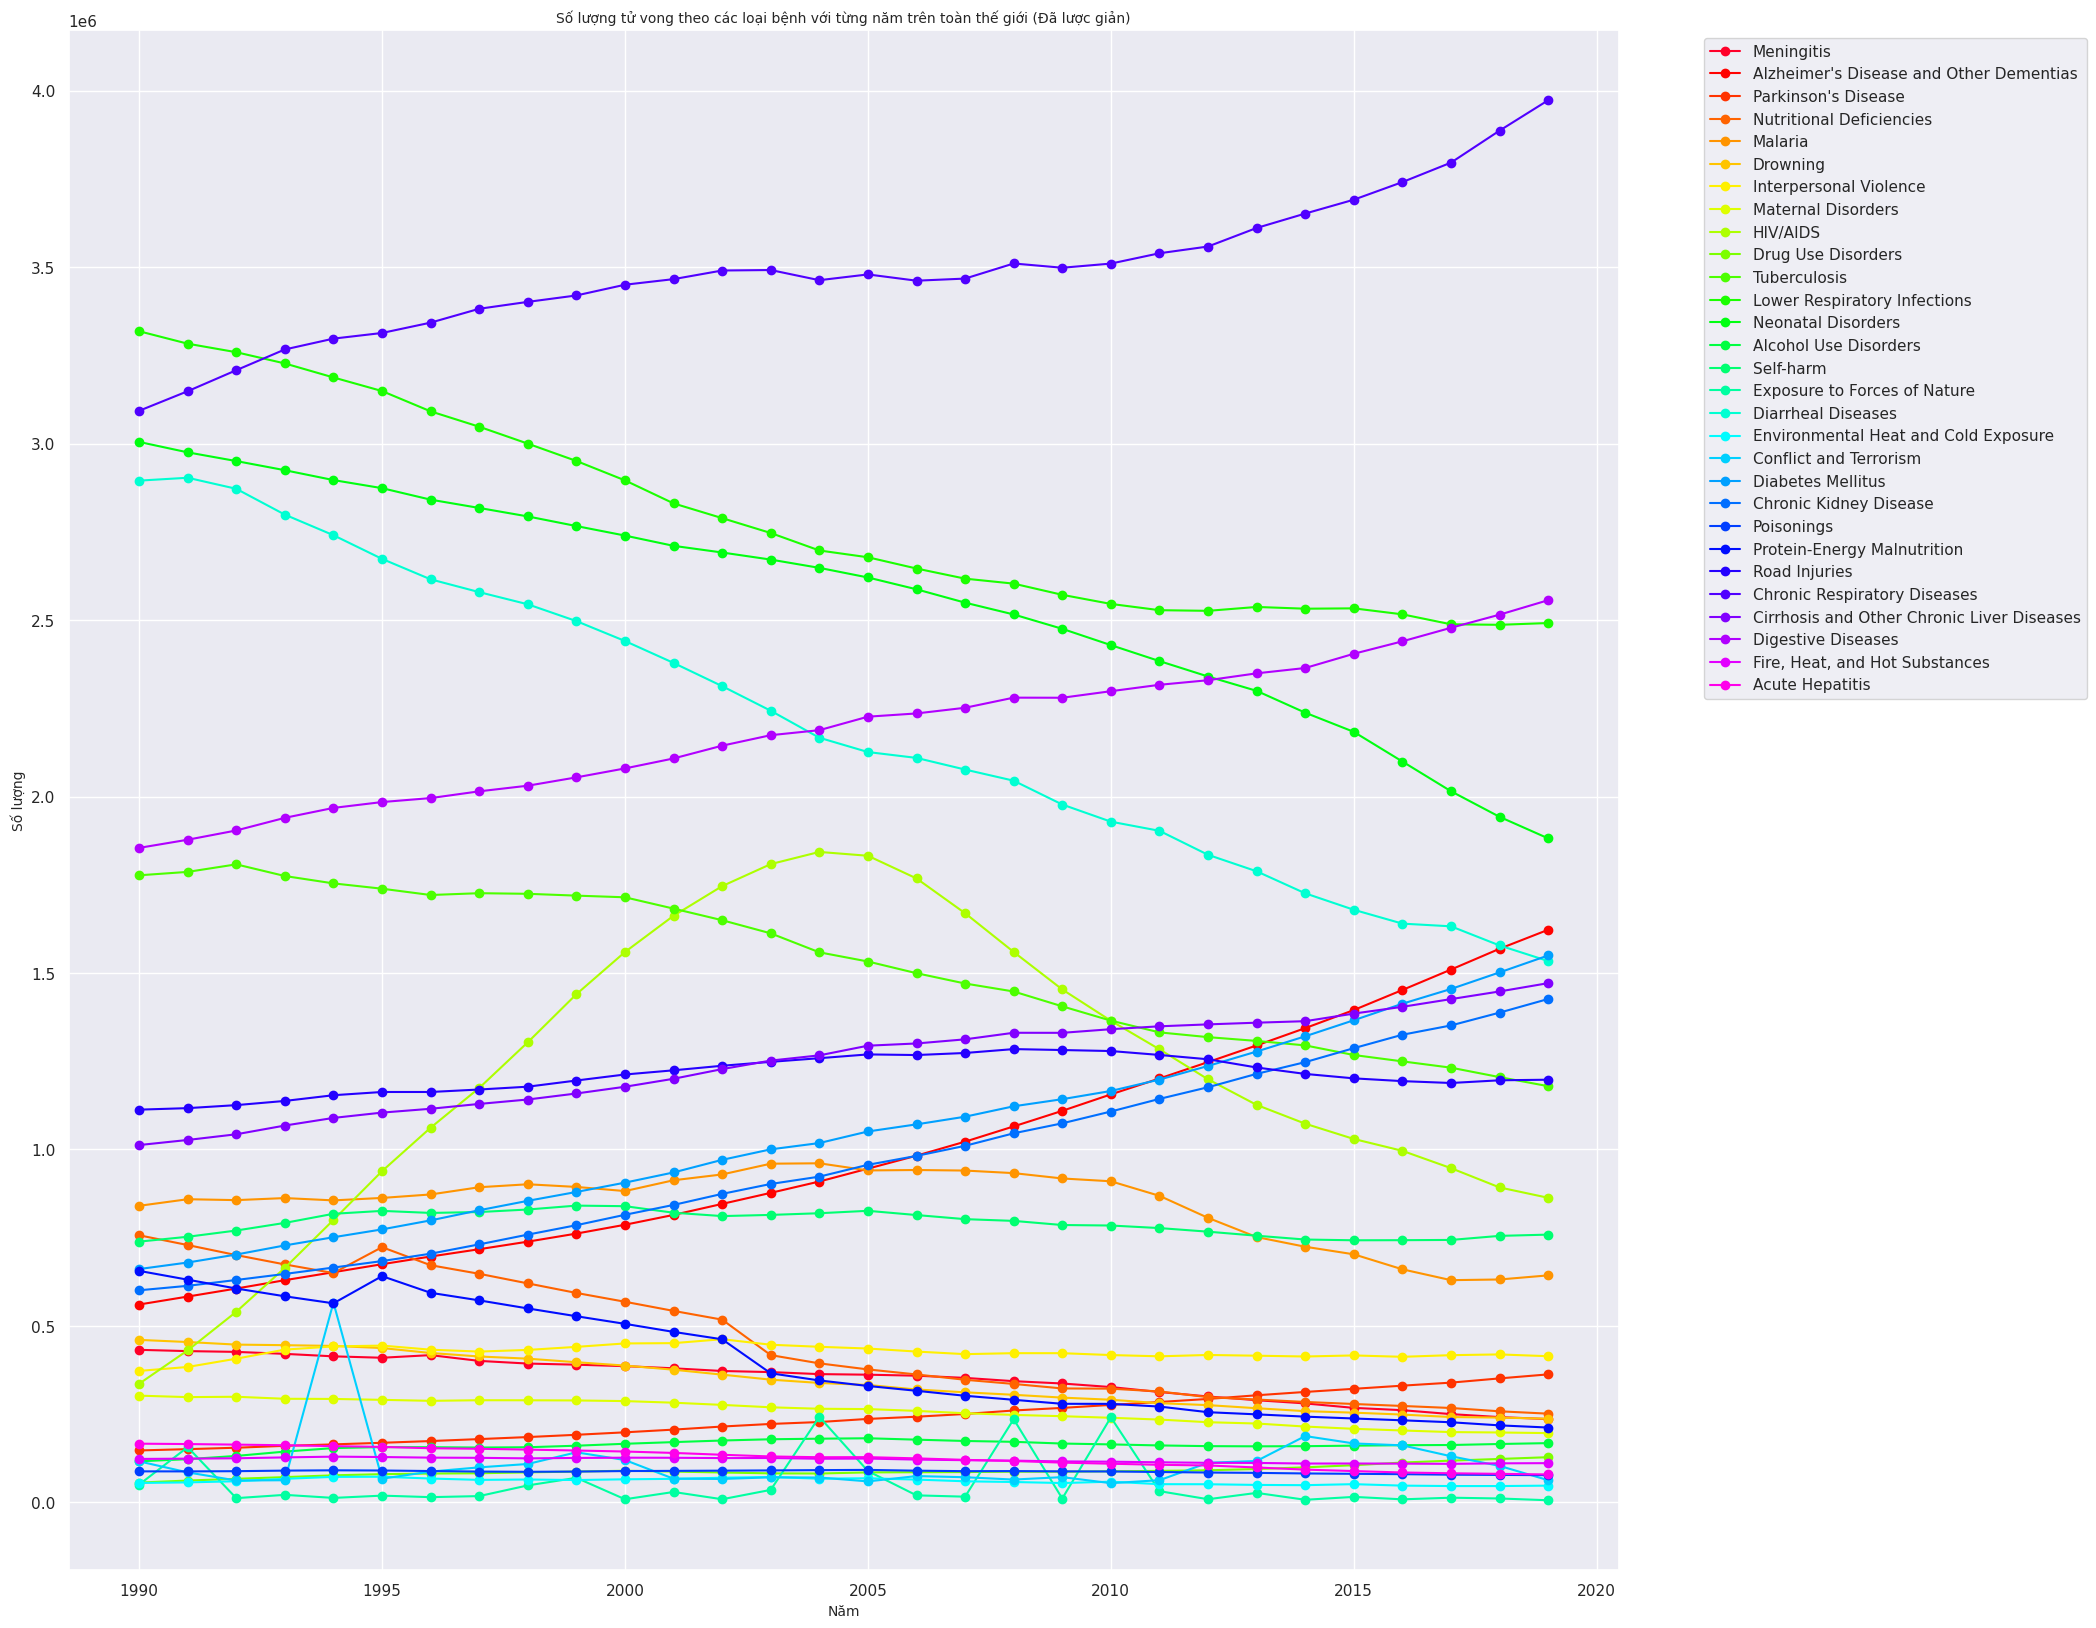

In [24]:
##Drop 2 cột về nguyên nhân tử vong tim mạch và khối u

num_causeOfDeath_by_year_drop = num_causeOfDeath_by_year.drop(['Cardiovascular Diseases','Neoplasms'], axis = 1)
num_causeOfDeath_by_year_drop

fig = plt.figure(figsize =(20, 20))

NUM_COLORS = len(names_cause) -2
cm = plt.get_cmap('gist_rainbow')
ax = fig.add_subplot(111)
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

current_name_causes = list(num_causeOfDeath_by_year_drop.columns.values)
plt.plot(num_causeOfDeath_by_year_drop, marker = 'o', label = current_name_causes)
plt.title('Số lượng tử vong theo các loại bệnh với từng năm trên toàn thế giới (Đã lược giản)', fontsize = 10)
plt.xlabel('Năm', fontsize = 10)
plt.ylabel('Số lượng', fontsize = 10)




plt.legend(current_name_causes,bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()


Từ hai biểu đồ trên, ta có thể thấy rằng nguyên nhân tử vong về bệnh tim mạch và khối u luôn là những nguyên nhân tử vong hàng đầu ở trên thế giới. Đây cũng là vấn đề nhức nhối hiện nay trong ngành y. Khối u sẽ dẫn tới ung thư và nếu không phát hiện kịp thời sẽ dẫn tới tỉ lệ tử vong rất cao. Bệnh tim mạch từ 1990 - 2019 luôn rất cao là vì việc con người ăn uống, sinh hoạt không được điều độ trong quãng thời gian này, quãng thời gian mà đánh dấu cho việc cách mạng công nghệ 3.0 và các loại thực phẩm không sạch xuất hiện tràn lan trên các thế giới.

=> Chúng ta nên nhìn những số liệu này để có thể đưa ra những đánh giá về ngành Y Học trên thế giới

Ngoài ra cũng có nhiều nguyên nhân đáng báo động như tai nạn, bùng nổ về nhiệt độ ( tăng lẫn giảm ) do sự biến đổi khí hậu, ...

## Câu 3: Tổng số lượng người tử vong nhiều nhất của từng năm là thuộc về nước nào ? Liệt kê ra top 5 từng năm ? Có thể đưa ra được biểu đồ phân bố ?*

In [29]:
def getMaxYear():
    
    ##Hàm này sẽ trả về một dataFrame với 3 cột Country-Territory/Year/Total với total là số lượng người tử vong trong year đó
    countries_maxDeath_byYear = pd.DataFrame()
    ##Ở đây ta sử dụng vòng lặp để lặp qua từng năm, chi phí sẽ không đáng kể vì số năm khảo sát là 31 năm, một con số constant không lớn
    for year in years:
        current_df = cause_of_deaths_df[cause_of_deaths_df['Year'] == year]
        current_df = current_df.reset_index().drop(["Code","index"], axis = 1)
        ##iloc[:, 2:] là để skip qua cột Year trong data frame
        current_df['Total'] = current_df.iloc[:, 2:].sum(axis = 1)
        country_total_df = current_df[['Country/Territory','Year','Total']]
        country_max = country_total_df [ country_total_df['Total'] == country_total_df['Total'].max()]
        if countries_maxDeath_byYear.empty:
            countries_maxDeath_byYear = country_max
        else:
            countries_maxDeath_byYear = countries_maxDeath_byYear.append(country_max)
    
    ##Xử lý dataframe
    countries_maxDeath_byYear = countries_maxDeath_byYear.reset_index()
    countries_maxDeath_byYear = countries_maxDeath_byYear.drop(['index'], axis = 1)
    return countries_maxDeath_byYear
    
countries_maxDeath_byYear = getMaxYear()

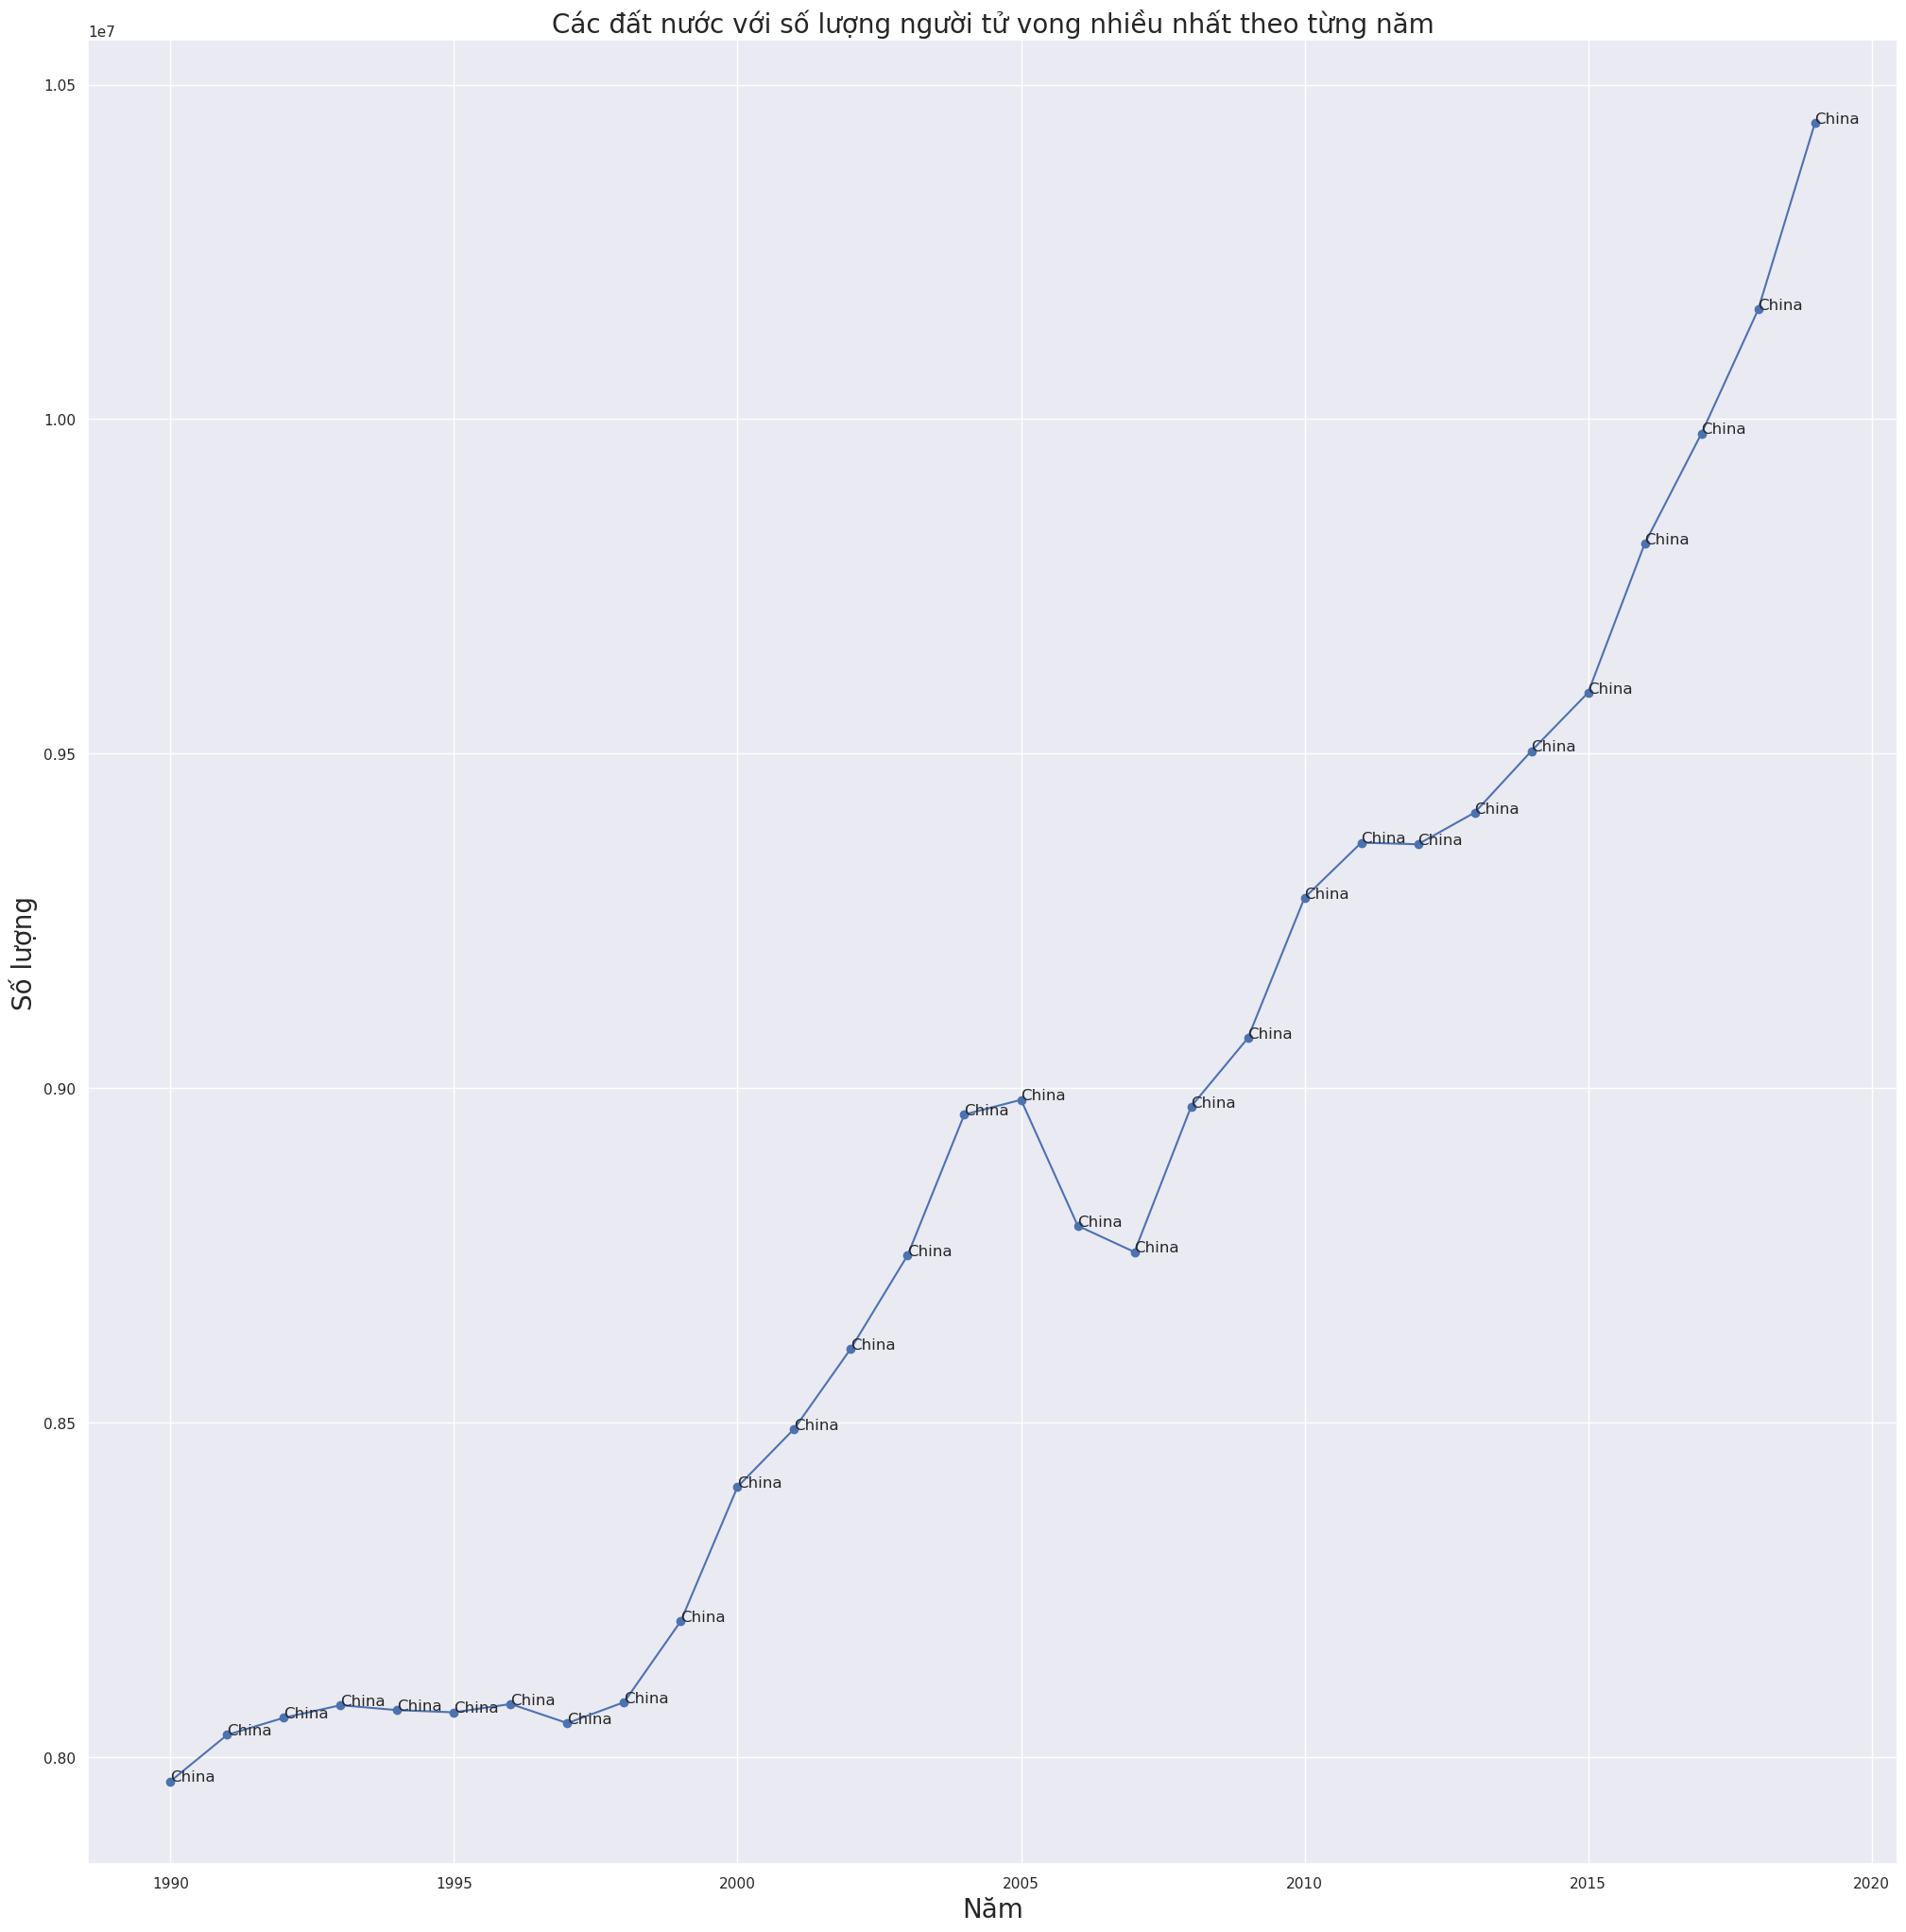

In [30]:
##Visualize dữ liệu

fig, ax = plt.subplots(figsize = (20,20))
fig.tight_layout()
plt.title('Các đất nước với số lượng người tử vong nhiều nhất theo từng năm', fontsize = 20)
plt.xlabel('Năm', fontsize = 20)
plt.ylabel('Số lượng', fontsize = 20)
ax.plot(countries_maxDeath_byYear['Year'],countries_maxDeath_byYear['Total'], marker = 'o')
for i, txt in enumerate(countries_maxDeath_byYear['Country/Territory']):
    ax.annotate(txt, (countries_maxDeath_byYear['Year'][i], countries_maxDeath_byYear['Total'][i]))



**Nhận xét:**

Kết quả đầu ra khá là bất ngờ vì với mỗi năm, đất nước có số lượng người tử vong nhiều nhất chính là **Trung Quốc**. Một số yếu tố có thể ảnh hưởng tới con số này đó chính là dân số của nước đó trong năm đó, chất lượng giáo dục ( yếu tố này ảnh hưởng bởi vì chất lượng giáo dục ảnh hưởng tới việc con người của nước đó có được giáo dục kỹ về sức khỏe hay không? Có biết rằng nên đi khám tổng quát để phát hiện bệnh sớm tránh dẫn tới việc để bệnh quá lâu ) và chất lượng nền y tế của đất nước đó nữa.

Vậy ta nên đặt câu hỏi là: Tại sao Trung Quốc lại luôn là đất nước dẫn đầu về số lượng người tử vong cao nhất trên thế giới ? Và tại sao con số này đang có xu hướng tăng lên ?

Tuy nhiên rằng chúng ta sẽ cùng tới với yếu tố về dân số trước, trước đó rằng ta sẽ cùng khảo sát thêm một thông số là (những) đất nước có số lượng người tử vong ít nhất theo mỗi năm để xem thử rằng những đất nước có lượng người tử vong ít mỗi năm sẽ có dân số như thế nào?

In [31]:
def getMinYear():
    countries_minDeath_byYear = pd.DataFrame()
    for year in years:
        current_df = cause_of_deaths_df[cause_of_deaths_df['Year'] == year]
        current_df = current_df.reset_index().drop(["Code","index"], axis = 1)
        current_df['Total'] = current_df.iloc[:, 2:].sum(axis = 1)
        country_total_df = current_df[['Country/Territory','Year','Total']]
        country_min = country_total_df [ country_total_df['Total'] == country_total_df['Total'].min()]
        if countries_minDeath_byYear.empty:
            countries_minDeath_byYear = country_min
        else:
            ##Việc dùng append sẽ lấy tất cả các dữ liệu nếu bằng nhau
            countries_minDeath_byYear = countries_minDeath_byYear.append(country_min)
    
    countries_minDeath_byYear = countries_minDeath_byYear.reset_index()
    countries_minDeath_byYear = countries_minDeath_byYear.drop(['index'], axis = 1)
    return countries_minDeath_byYear

countries_minDeath_byYear = getMinYear()

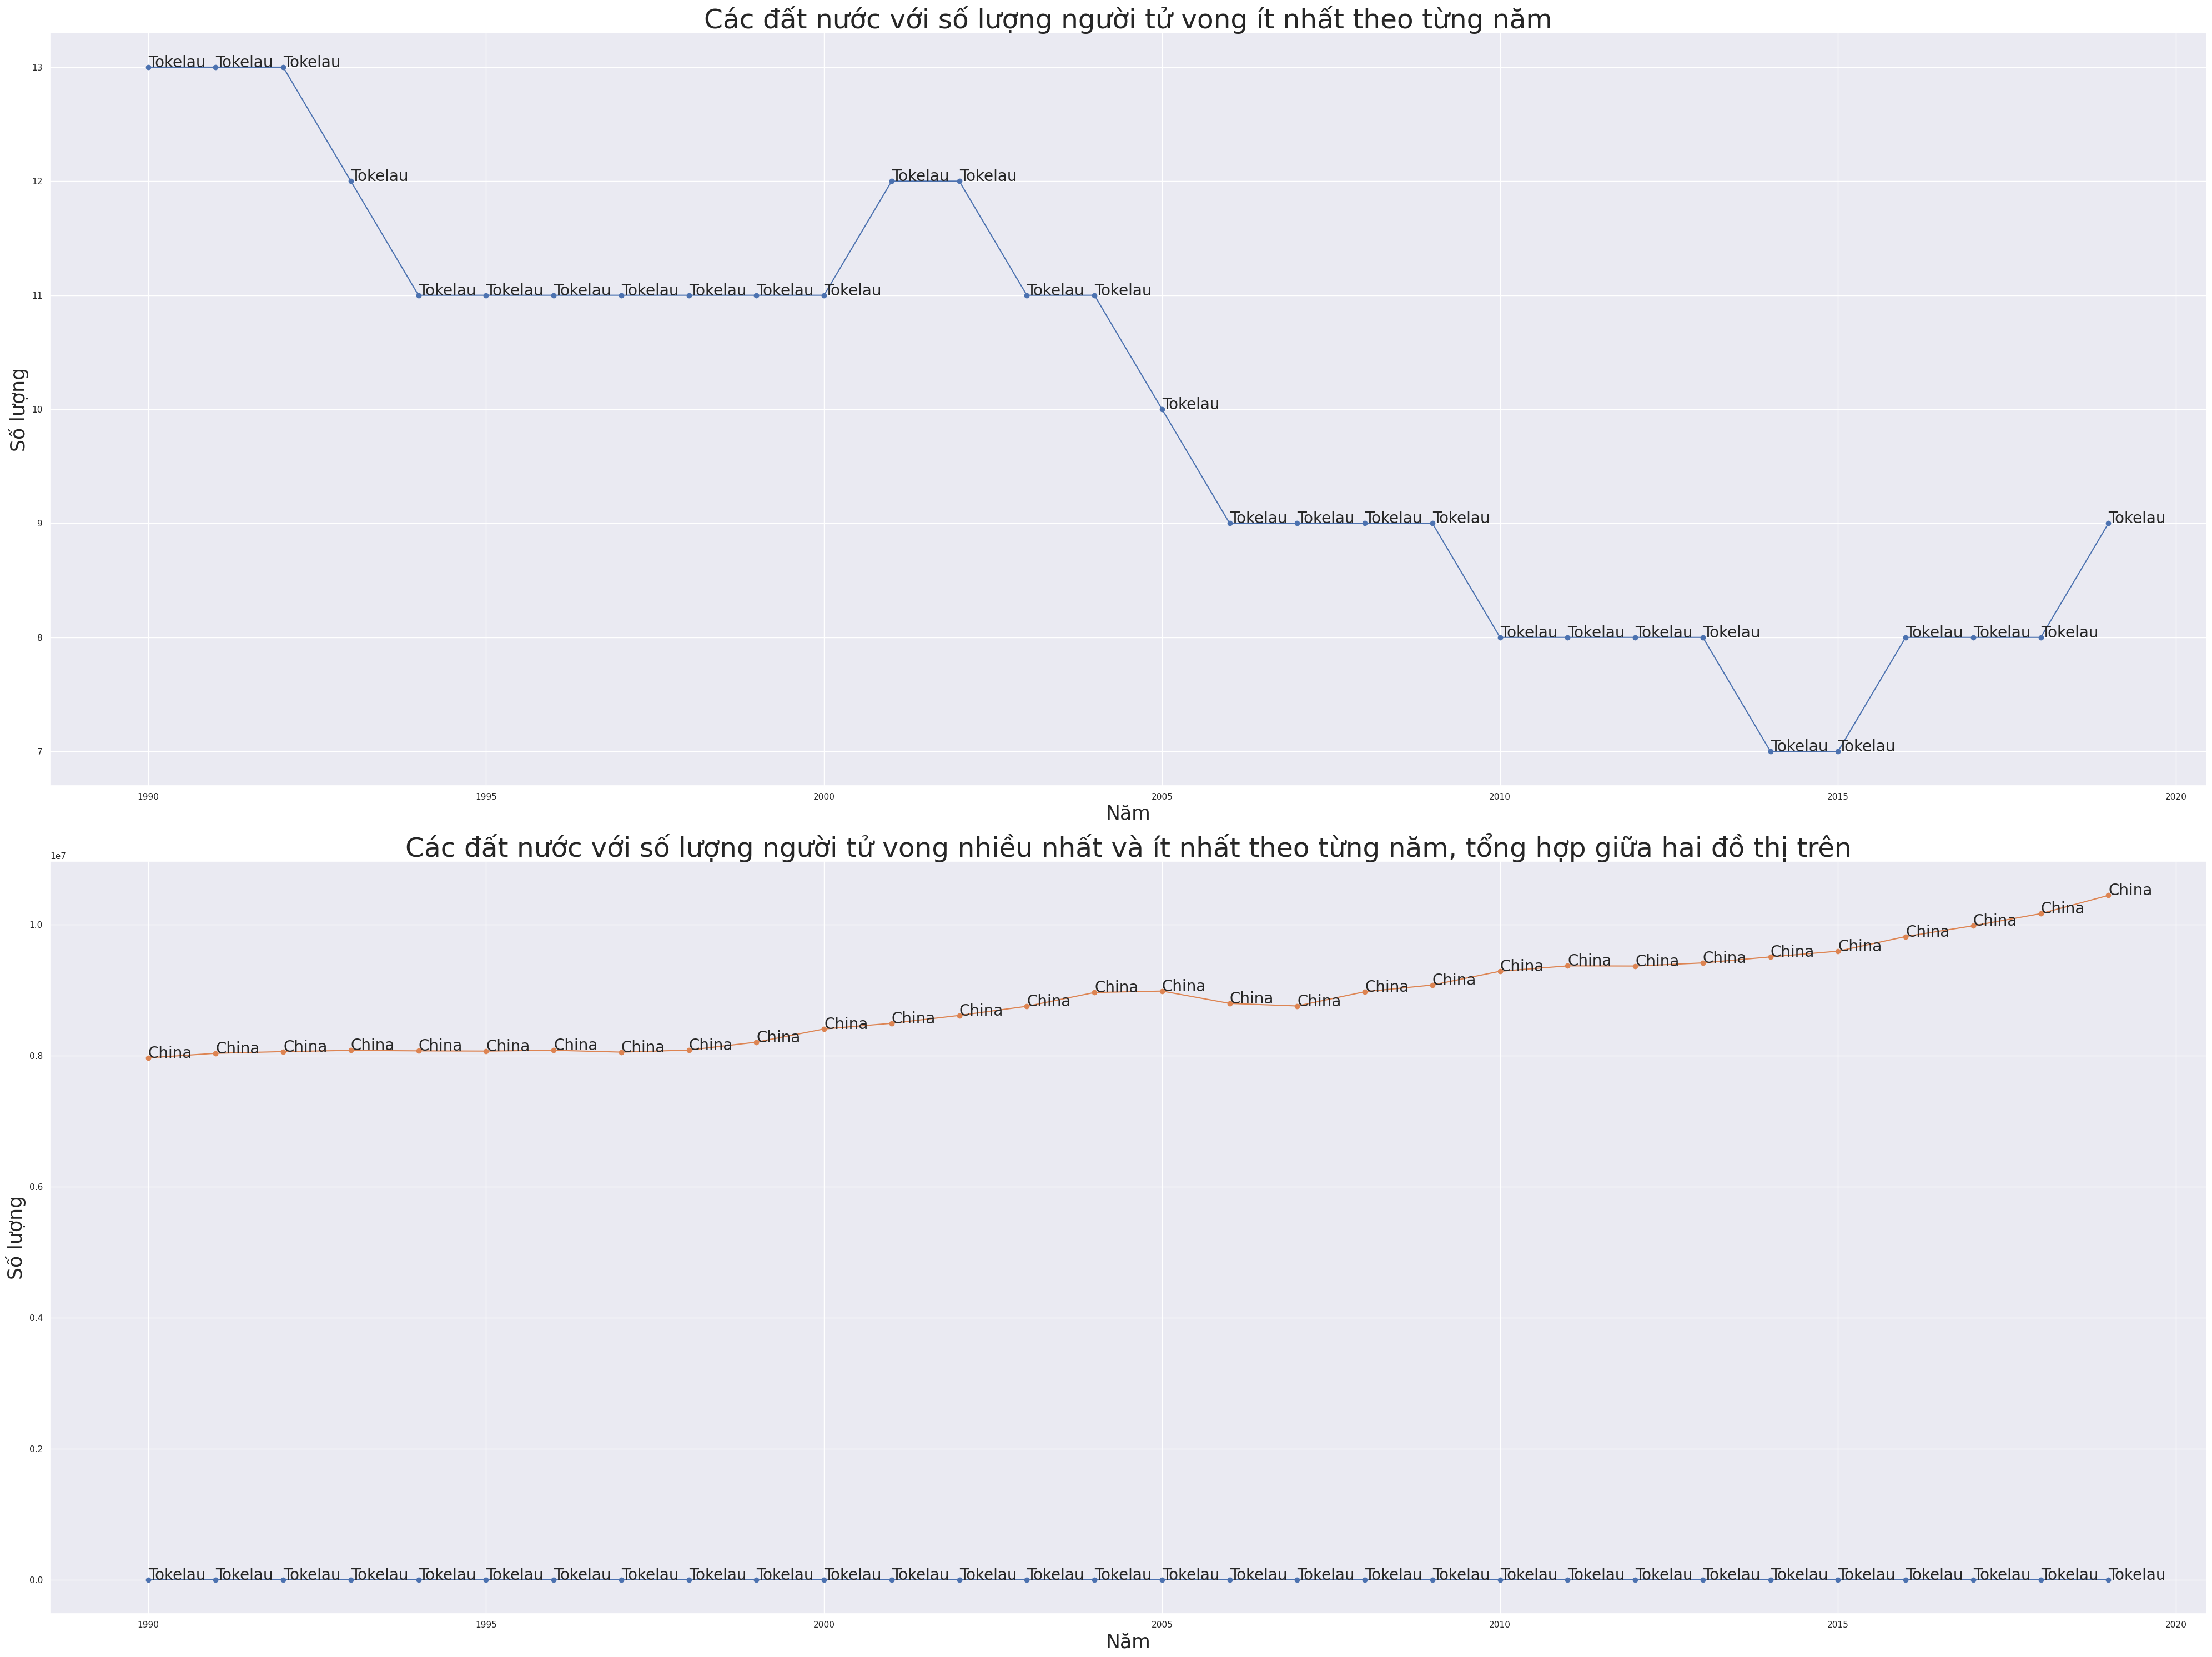

In [32]:
##Visualize dữ liệu

fig, ax = plt.subplots(2, figsize = (40,30))

##ax0: Các đất nước với số lượng người tử vong ít nhất theo từng năm
ax[0].set_title('Các đất nước với số lượng người tử vong ít nhất theo từng năm', fontsize = 35)
ax[0].set_xlabel('Năm', fontsize = 25)
ax[0].set_ylabel('Số lượng', fontsize = 25)
ax[0].plot(countries_minDeath_byYear['Year'],countries_minDeath_byYear['Total'], marker = 'o')
for i, txt in enumerate(countries_minDeath_byYear['Country/Territory']):
    ax[0].annotate(txt, (countries_minDeath_byYear['Year'][i], countries_minDeath_byYear['Total'][i]), fontsize = 20)
    

##ax1: Các đất nước với số lượng người tử vong ít nhất theo từng năm
ax[1].set_title('Các đất nước với số lượng người tử vong nhiều nhất và ít nhất theo từng năm, tổng hợp giữa hai đồ thị trên', fontsize = 35)
ax[1].set_xlabel('Năm', fontsize = 25)
ax[1].set_ylabel('Số lượng', fontsize = 25)
ax[1].plot(countries_minDeath_byYear['Year'],countries_minDeath_byYear['Total'], marker = 'o')
ax[1].plot(countries_maxDeath_byYear['Year'],countries_maxDeath_byYear['Total'], marker = 'o')

for i, txt in enumerate(countries_maxDeath_byYear['Country/Territory']):
    ax[1].annotate(txt, (countries_maxDeath_byYear['Year'][i], countries_maxDeath_byYear['Total'][i]), fontsize = 20)
for i, txt in enumerate(countries_minDeath_byYear['Country/Territory']):
    ax[1].annotate(txt, (countries_minDeath_byYear['Year'][i], countries_minDeath_byYear['Total'][i]),fontsize = 20)
    
fig.tight_layout()


Ở đây, chúng ta có thể thấy rằng, tương tự với lại số lượng ca tử vong nhiều nhất theo năm từ 1990-2019 thì chỉ đều thuộc về Trung Quốc, thì số lượng ca tử vong ít nhất theo năm lại thuộc về đúng một nước là Tokelau, với đỉnh điểm số ca tử vong là dưới 3000 ca một năm ở năm 2019. Vậy thì chúng ta sẽ cùng tìm hiểu dân số giữa hai nước này sẽ như thế nào:
    
    Dân số thế giới theo Google của 2 nước vào năm 2019:
        Tokelau: 1.340
        Trung Quốc: 1,408 tỷ
        
Vậy rằng, ta cũng có thể đưa ra được một kết luận rằng dân số càng ít thì số lượng tử vong cũng càng ít là hoàn toàn có cơ sở.

Nhắc lại câu hỏi trước khi ta phân tích về vấn đề này: ****Tại sao Trung Quốc lại luôn là đất nước dẫn đầu về số lượng người tử vong cao nhất trên thế giới ? Và tại sao con số này đang có xu hướng tăng lên ?****

Có thể trả lời bằng thông tin: dân số thế giới đang tăng lên từng ngày và Trung Quốc hiện đang là đất nước có dân số đông nhất thế giới => dẫn đầu về số lượng người tử vong cao nhất trên thế giới và có xu hướng tăng lên

Tuy nhiên, ta có thể thấy, thông số đã giảm xuống vào khoảng thời gian 2005 -2008 thì số lượng người tử vong của quốc gia này lại có dấu hiệu giảm, tuy nhiên là đã tăng trưởng trở lại ngay sau vài năm sau đó.

### Chúng ta sẽ cùng tìm hiểu sâu hơn về 5 nước có tỷ lệ tử vong nhiều nhất theo từng năm

In [33]:
def getTop5MaxCountry_byYear():
    top_5_countries_maxDeath_byYear = pd.DataFrame()
    for year in years:
        
        current_df = cause_of_deaths_df[cause_of_deaths_df['Year'] == year]
        current_df = current_df.reset_index().drop(["Code","index"], axis = 1)
        current_df['Total'] = current_df.iloc[:, 2:].sum(axis = 1)
        country_total_df = current_df[['Country/Territory','Year','Total']]
        
        country_sort_max = country_total_df.sort_values(by = "Total", ascending=False)
        top_5_country_max_year = country_sort_max.iloc[:5,:]
        
        top_5_country_max_year = top_5_country_max_year.reset_index(drop = True)
        
        if(top_5_countries_maxDeath_byYear.empty):
            top_5_countries_maxDeath_byYear = top_5_country_max_year
        else:
            top_5_countries_maxDeath_byYear = top_5_countries_maxDeath_byYear.append(top_5_country_max_year)
    
    return top_5_countries_maxDeath_byYear.reset_index(drop=True)

top_5_countries_maxDeath_byYear = getTop5MaxCountry_byYear()

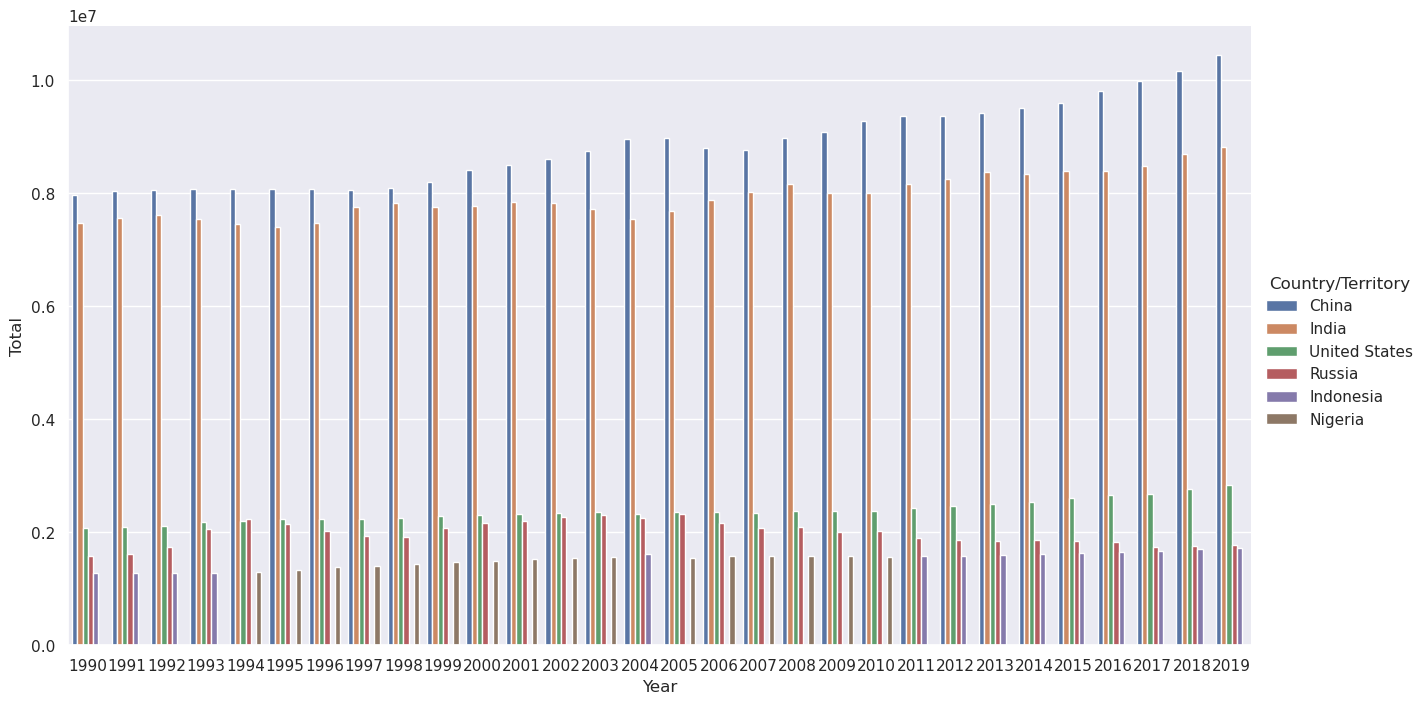

In [34]:
##Data visualization
##Ở đây ta sẽ dùng sự trợ giúp của anh bạn seaborn
import seaborn as sb

sb.set(rc={'figure.figsize':(45,30)})
sb.catplot(x='Year', y='Total', hue='Country/Territory', data=top_5_countries_maxDeath_byYear, kind='bar',height=7, aspect=1.8)



Góp mặt trong top 5 từng năm từ năm 1990 tới năm 2019 có sự xuất hiện của 6 nước: Trung Quốc, Ấn Độ, Mỹ, Nga, Indonesia, Nigeria.

Ta có thể thấy được rằng, "giữ vững" vị trí qua các năm luôn lần lượt là : Trung Quốc, Ấn Độ, Mỹ và Nga. Vị trí top 5 cuối cùng luôn được thay phiên giữa Indonesia và Nigeria, tuy nhiên rằng xu hướng về số lượng ca tử vong ở Indonesia dạo gần đây có vẻ nhiều hơn Nigeria

Có thể giải thích được rằng, Trung Quốc và Ấn Độ luôn ở top 1 và top 2 và cách xa các đất nước còn lại khá nhiều là vì đây là những đất nước đông dân, dân số từ năm 1990 là đã vượt quá sẵn 1 tỷ dân, mà dựa vào các khảo sát về dân số có ảnh hưởng đến số lượng người tử vong trong vòng một năm nói trên thì điều này có thể là dễ hiểu ?

Vậy còn Mỹ và Nga, đây là những nước có dân số không quá cao như 2 nước trên thì tại sao lại luôn nằm ở trong top 5? Có thể giải thích với Mỹ rằng, ngoài các nguyên nhân không liên quan tới "y tế" ra thì Mỹ từ lâu đã là một nước nổi tiếng về việc những bà mẹ có quyền chọn có tiêm vaccine cho con mình hay không, điều này có thể cũng là một nhân tố, đồng thời rằng quãng thời gian này xu hướng các đồ ăn nhanh cũng rất là đình đám cho tới hiện giờ gây ra rất nhiều căn bệnh cho người Mỹ khi họ quá lạm dụng đồ ăn nhanh. Ngoài ra rằng với những nguyên nhân phi y tế như hình sự, tội phạm, khủng bố cũng có thể ảnh hưởng rất nhiều tới Mỹ ( Mỹ là một nước cho phép sử dụng súng một cách hợp pháp và trong khảo sát có một quãng thời gian diễn ra vụ 11-9 và khủng hoảng kinh tế năm 2008)

Đối với Nga, Nga được tách ra từ Liên Xô sau khi Liên Xô tan rã 1991, vì thế sự kiện này cũng có thể ít nhiều ảnh hưởng tới nền kinh tế, y tế của đất nước, khi mà bắt đầu tái thiết lại nước Nga theo hướng Tư Bản, vì thế rằng mặc dù trong các khảo sát các năm 1990-2019, trung bình dân số của Mỹ luôn nhiều hơn của Nga ít nhất là 2.5 lần, nhưng trong quãng thời gian từ 1991 - 2007, số lượng tử vong của Nga luôn bám đuổi Mỹ, thậm chí có đỉnh điểm là xấp xỉ Mỹ, tuy nhiên rằng, sau một quãng thời gian đã đi vào trật tự của nước Nga hiện nay thì con số này đã giảm đi đáng kể cho tới hiện giờ. Ngoài ra Nga cũng là một nước có khí hậu khắc nghiệt hơn so với 5 nước kể trên.

Còn với Indonesia và Nigeria, đây là những nước đang phát triển trên thế giới. Với Indonesia là một nước đông dân ở Đông Nam Á, không quá khó hiểu khi bọn họ là một nước đang phát triển mà vẫn được góp mặt trong danh sách này, ngoài ra Nigeria là một quốc gia thuộc Châu Phi, nơi mà cái nóng Châu Phi cùng những nạn đói cũng là một nguyên nhân dẫn tới sự góp mặt trong danh sách.

### Tương tự, chúng ta sẽ cùng tìm hiểu sâu hơn về 5 nước có tỷ lệ tử vong ít nhất nhất theo từng năm

In [35]:
def getTop5MinCountry_byYear():
    top_5_countries_minDeath_byYear = pd.DataFrame()
    for year in years:
        
        current_df = cause_of_deaths_df[cause_of_deaths_df['Year'] == year]
        current_df = current_df.reset_index().drop(["Code","index"], axis = 1)
        current_df['Total'] = current_df.iloc[:, 2:].sum(axis = 1)
        country_total_df = current_df[['Country/Territory','Year','Total']]
        
        country_sort_min = country_total_df.sort_values(by = "Total", ascending=True)
        top_5_country_min_year = country_sort_min.iloc[:5,:]
        
        top_5_country_min_year = top_5_country_min_year.reset_index(drop = True)
        
        if(top_5_countries_minDeath_byYear.empty):
            top_5_countries_minDeath_byYear = top_5_country_min_year
        else:
            top_5_countries_minDeath_byYear = top_5_countries_minDeath_byYear.append(top_5_country_min_year)
    
    return top_5_countries_minDeath_byYear.reset_index(drop=True)

top_5_countries_minDeath_byYear = getTop5MinCountry_byYear()

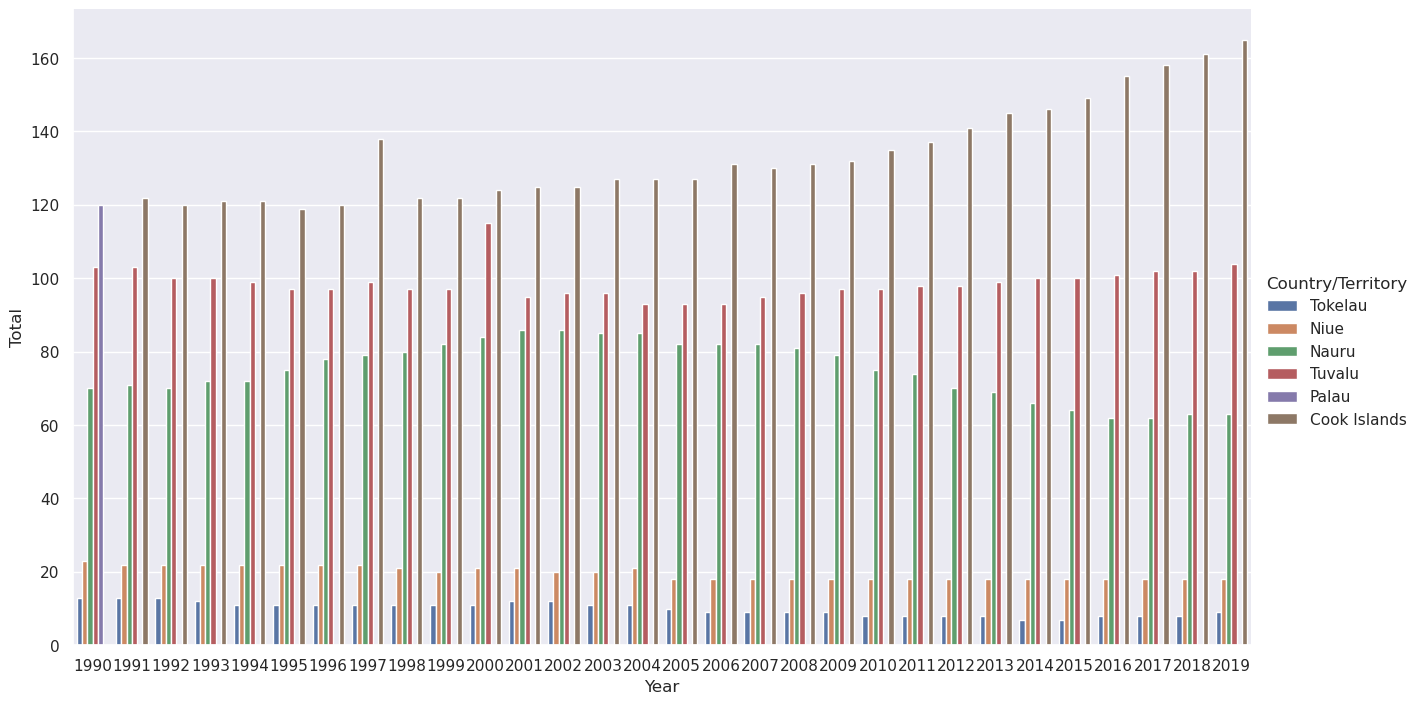

In [36]:
##Data visualization
##Ở đây ta (lại) dùng sự trợ giúp của anh bạn seaborn

sb.set(rc={'figure.figsize':(40,40)})
sb.catplot(x='Year', y='Total', hue='Country/Territory', data=top_5_countries_minDeath_byYear, kind='bar',height=7, aspect=1.8)



Những thông số này khá dễ hiểu khi các nước này thật sự rằng nếu như không nhắc tới thì cũng khá ít người biết tới tên những đất nước này.



# Câu 4:Với từng năm, bệnh nào có tổng số người tử vong nhiều nhất ? Liệt kê ra top 5 mỗi năm

In [37]:
sum_deaths_by_year = cause_of_deaths_df.groupby('Year').sum().reset_index()
dff = sum_deaths_by_year.apply(lambda x: pd.Series(x.nlargest(5).index), axis=1).reset_index(drop=True)
dff.loc[:,'Year'] = sum_deaths_by_year['Year']
dff.rename({0:'1st',1:'2nd',2:'3rd',3:'4th',4:'5th'},axis=1)

1st        2nd                           3rd  \
0   Cardiovascular Diseases  Neoplasms  Lower Respiratory Infections   
1   Cardiovascular Diseases  Neoplasms  Lower Respiratory Infections   
2   Cardiovascular Diseases  Neoplasms  Lower Respiratory Infections   
3   Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
4   Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
5   Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
6   Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
7   Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
8   Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
9   Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
10  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
11  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
12  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
13  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
14  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
15  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
16  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
17  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
18  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
19  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
20  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
21  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
22  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
23  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
24  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
25  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
26  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
27  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
28  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   
29  Cardiovascular Diseases  Neoplasms  Chronic Respiratory Diseases   

                             4th                           5th  Year  
0   Chronic Respiratory Diseases            Neonatal Disorders  1990  
1   Chronic Respiratory Diseases            Neonatal Disorders  1991  
2   Chronic Respiratory Diseases            Neonatal Disorders  1992  
3   Lower Respiratory Infections            Neonatal Disorders  1993  
4   Lower Respiratory Infections            Neonatal Disorders  1994  
5   Lower Respiratory Infections            Neonatal Disorders  1995  
6   Lower Respiratory Infections            Neonatal Disorders  1996  
7   Lower Respiratory Infections            Neonatal Disorders  1997  
8   Lower Respiratory Infections            Neonatal Disorders  1998  
9   Lower Respiratory Infections            Neonatal Disorders  1999  
10  Lower Respiratory Infections            Neonatal Disorders  2000  
11  Lower Respiratory Infections            Neonatal Disorders  2001  
12  Lower Respiratory Infections            Neonatal Disorders  2002  
13  Lower Respiratory Infections            Neonatal Disorders  2003  
14  Lower Respiratory Infections            Neonatal Disorders  2004  
15  Lower Respiratory Infections            Neonatal Disorders  2005  
16  Lower Respiratory Infections            Neonatal Disorders  2006  
17  Lower Respiratory Infections            Neonatal Disorders  2007  
18  Lower Respiratory Infections            Neonatal Disorders  2008  
19  Lower Respiratory Infections            Neonatal Disorders  2009  
20  Lower Respiratory Infections            Neonatal Disorders  2010  
21  Lower Respiratory Infections            Neonatal Disorders  2011  
22  Lower Respiratory Infections            Neonatal Disorders  2012  
23  Lower Respiratory Infections            Digestive Diseases  2013  
24  Lower Respir

Nhận xét:

- Kể từ năm 1990, top 1 và top 2 không thay đổi là bệnh tim mạch và khối u. Bệnh tim mạch luôn là nguyên nhân gây tử vong hàng đầu trên thế giới, nhiều hơn cả bệnh ung thư.
- Bệnh viêm đường hô hấp (Lower Respiratory Infections) đang có xu hướng giảm dần trong những năm gần đây nhưng ta không được chủ quan vì chúng vẫn nằm trong top 5 bệnh gây tử vong trên thế giới.
- Bệnh rối loạn sơ sinh (Neonatal Disorders) kể từ năm 2013 đã không còn nằm trong top 5. Một điều đáng mừng
- Bệnh về đường tiêu hóa (Digestive Diseases) đang có xu hướng chen chân vào top 5 trong những năm gần đây. Ta cần chú ý về loại bệnh này.

# Câu 5: Hãy phân tích về tỉ lệ tử vong của Việt Nam bằng cách trả lời những câu hỏi sau đây:

## 5.1 Tổng số người tử vong ở Việt Nam trong khảo sát này từ năm 1990-2019? Từ đó ta có nhận xét gì?

Đầu tiên lấy tất cả các dòng dữ liệu thuộc nước Việt Nam. 

Sau đó ta tạo thêm cột **Sum Death** ứng với tổng số người tử vong theo từng năm của từng quốc gia.

In [38]:
# Lấy những người tử vong tại Việt Nam
vietnamese_death = cause_of_deaths_df[cause_of_deaths_df['Country/Territory']=='Vietnam'].reset_index(drop=True)

# Tạo thêm cột tổng số người tử vong theo từng năm
vietnamese_death.loc[:,'Sum Death'] = vietnamese_death[names_cause.values].sum(axis=1)
vietnamese_death = vietnamese_death.sort_values('Year')

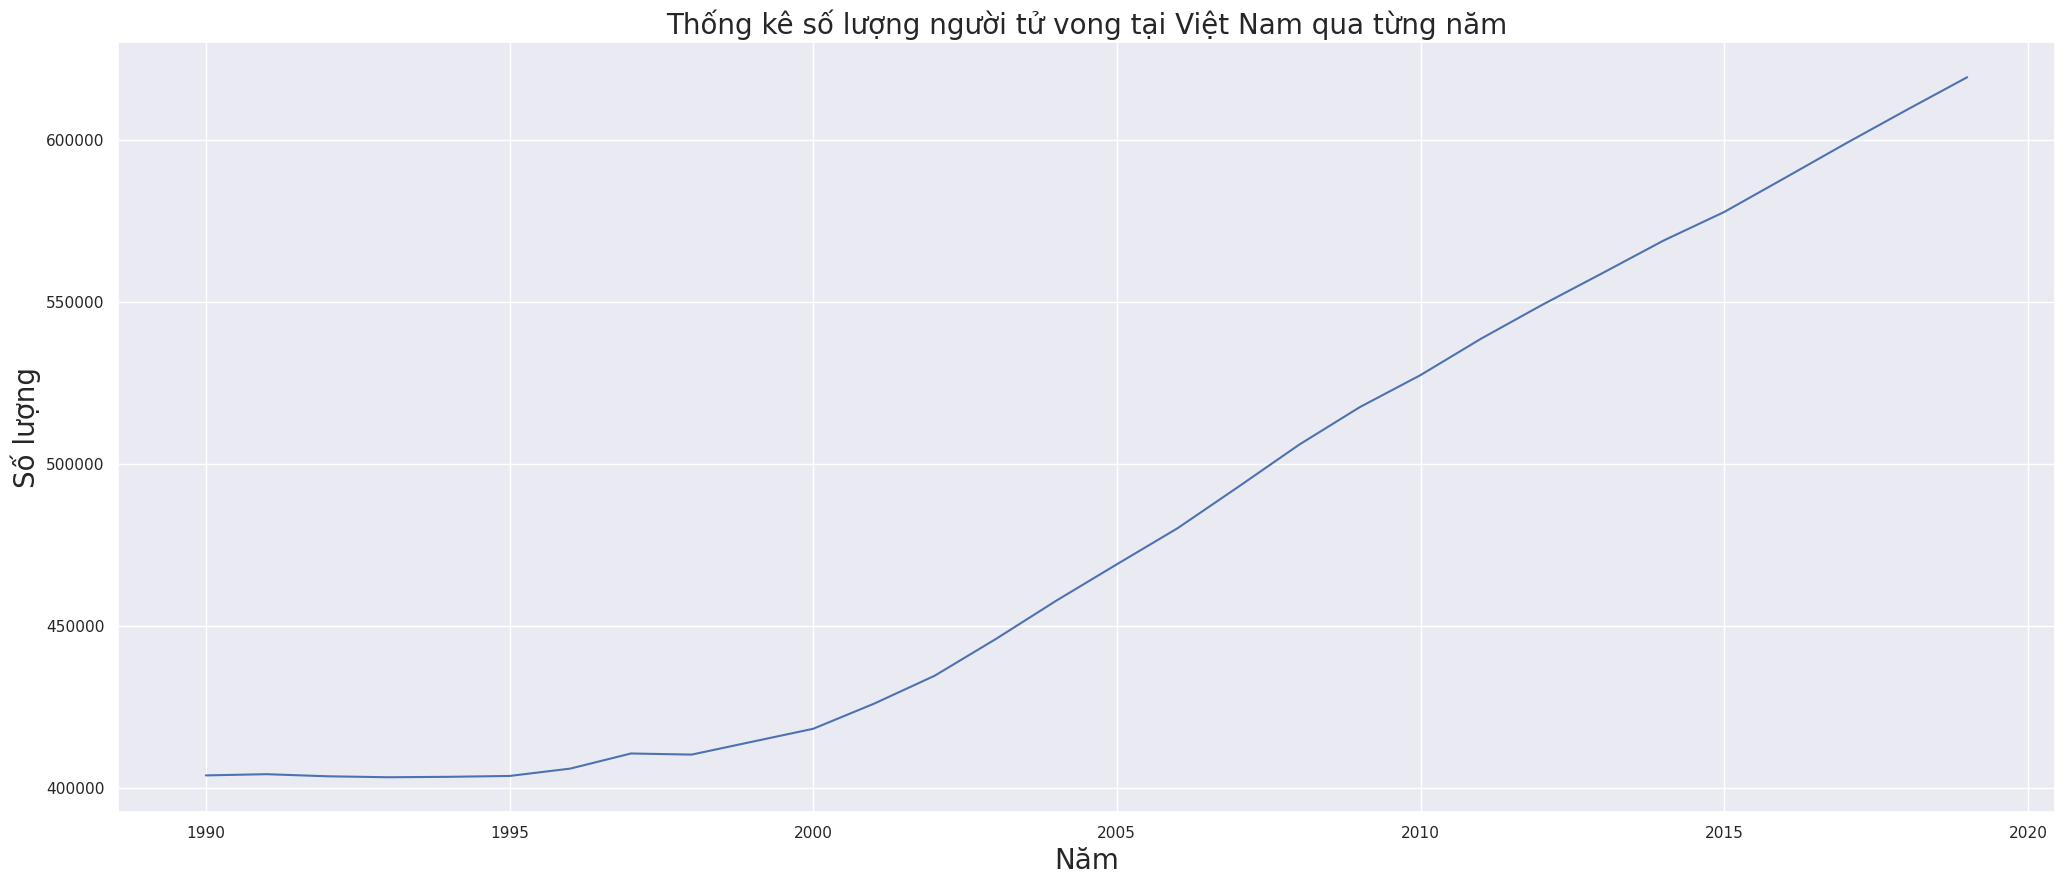

In [39]:
plt.figure(figsize = (25,10))

plt.plot(vietnamese_death['Year'], vietnamese_death['Sum Death'])

#customize chart
plt.title('Thống kê số lượng người tử vong tại Việt Nam qua từng năm', fontsize = 20)
plt.xlabel('Năm', fontsize = 20)
plt.ylabel('Số lượng', fontsize = 20)

plt.show()

Số lượng người tử vong tại Việt Nam có xu hướng tăng dần thậm chí tăng rất nhanh. Có lẽ người dân chưa ý thức được việc bảo vệ sức khoẻ của mình. Trong đồ ăn thức uống bây giờ có rất nhiều chất độc hại không như ngày xưa, đây cũng có thể là một nguyên nhân gây tử vong cao.

## 5.2 Kể tên các nguyên nhân bệnh gây tử vong phổ biến nhất của Việt Nam từ 1990 tới 2019? Nhận xét về các nguyên nhân này?

Chúng ta hãy xem đất nước Việt Nam ta từ năm 1990 tới năm 2019 có những nguyên nhân bệnh gây tử vong phổ biến nào, để từ đó đưa ra các nhận xét về các nguyên nhân tử vong ở nước ta so với thế giới.

Trước hết, hãy tạo ra một dataframe gồm tất cả các dòng dữ liệu thuộc đất nước Việt Nam (Code = 'VNM'), mỗi cột ứng với mỗi loại bệnh, mỗi dòng ứng với mỗi năm (chỉ số dòng để mặc định, bắt đầu từ 0)

In [40]:
# Lấy tất cả các dòng có Code là VNM (bước này đã làm ở câu 5)
vietnamese_death_df = cause_of_deaths_df[cause_of_deaths_df['Country/Territory']=='Vietnam'].reset_index(drop=True)
vietnamese_death_df = vietnamese_death_df.drop(['Country/Territory', 'Code', 'Year'], axis = 1)

Tiếp đến, hãy tính tổng tất cả các cột (tức là số người tử vong do các nguyên nhân khác nhau). Đồng thời, hãy sắp xếp các cột theo hướng có số người tử vong từ cao xuống thấp, lưu vào 1 dataframe đặt tên là sum_by_cause_vn. Dataframe này gồm 2 cột là cause_death và sum_death.

Sau đó, hãy vẽ biểu đồ cột (barplot). Nếu như chiều cao quá lớn, hãy vẽ biểu đồ theo dạng cột ngang (thay vì dạng cột đứng) để dễ quan sát tên bệnh. 

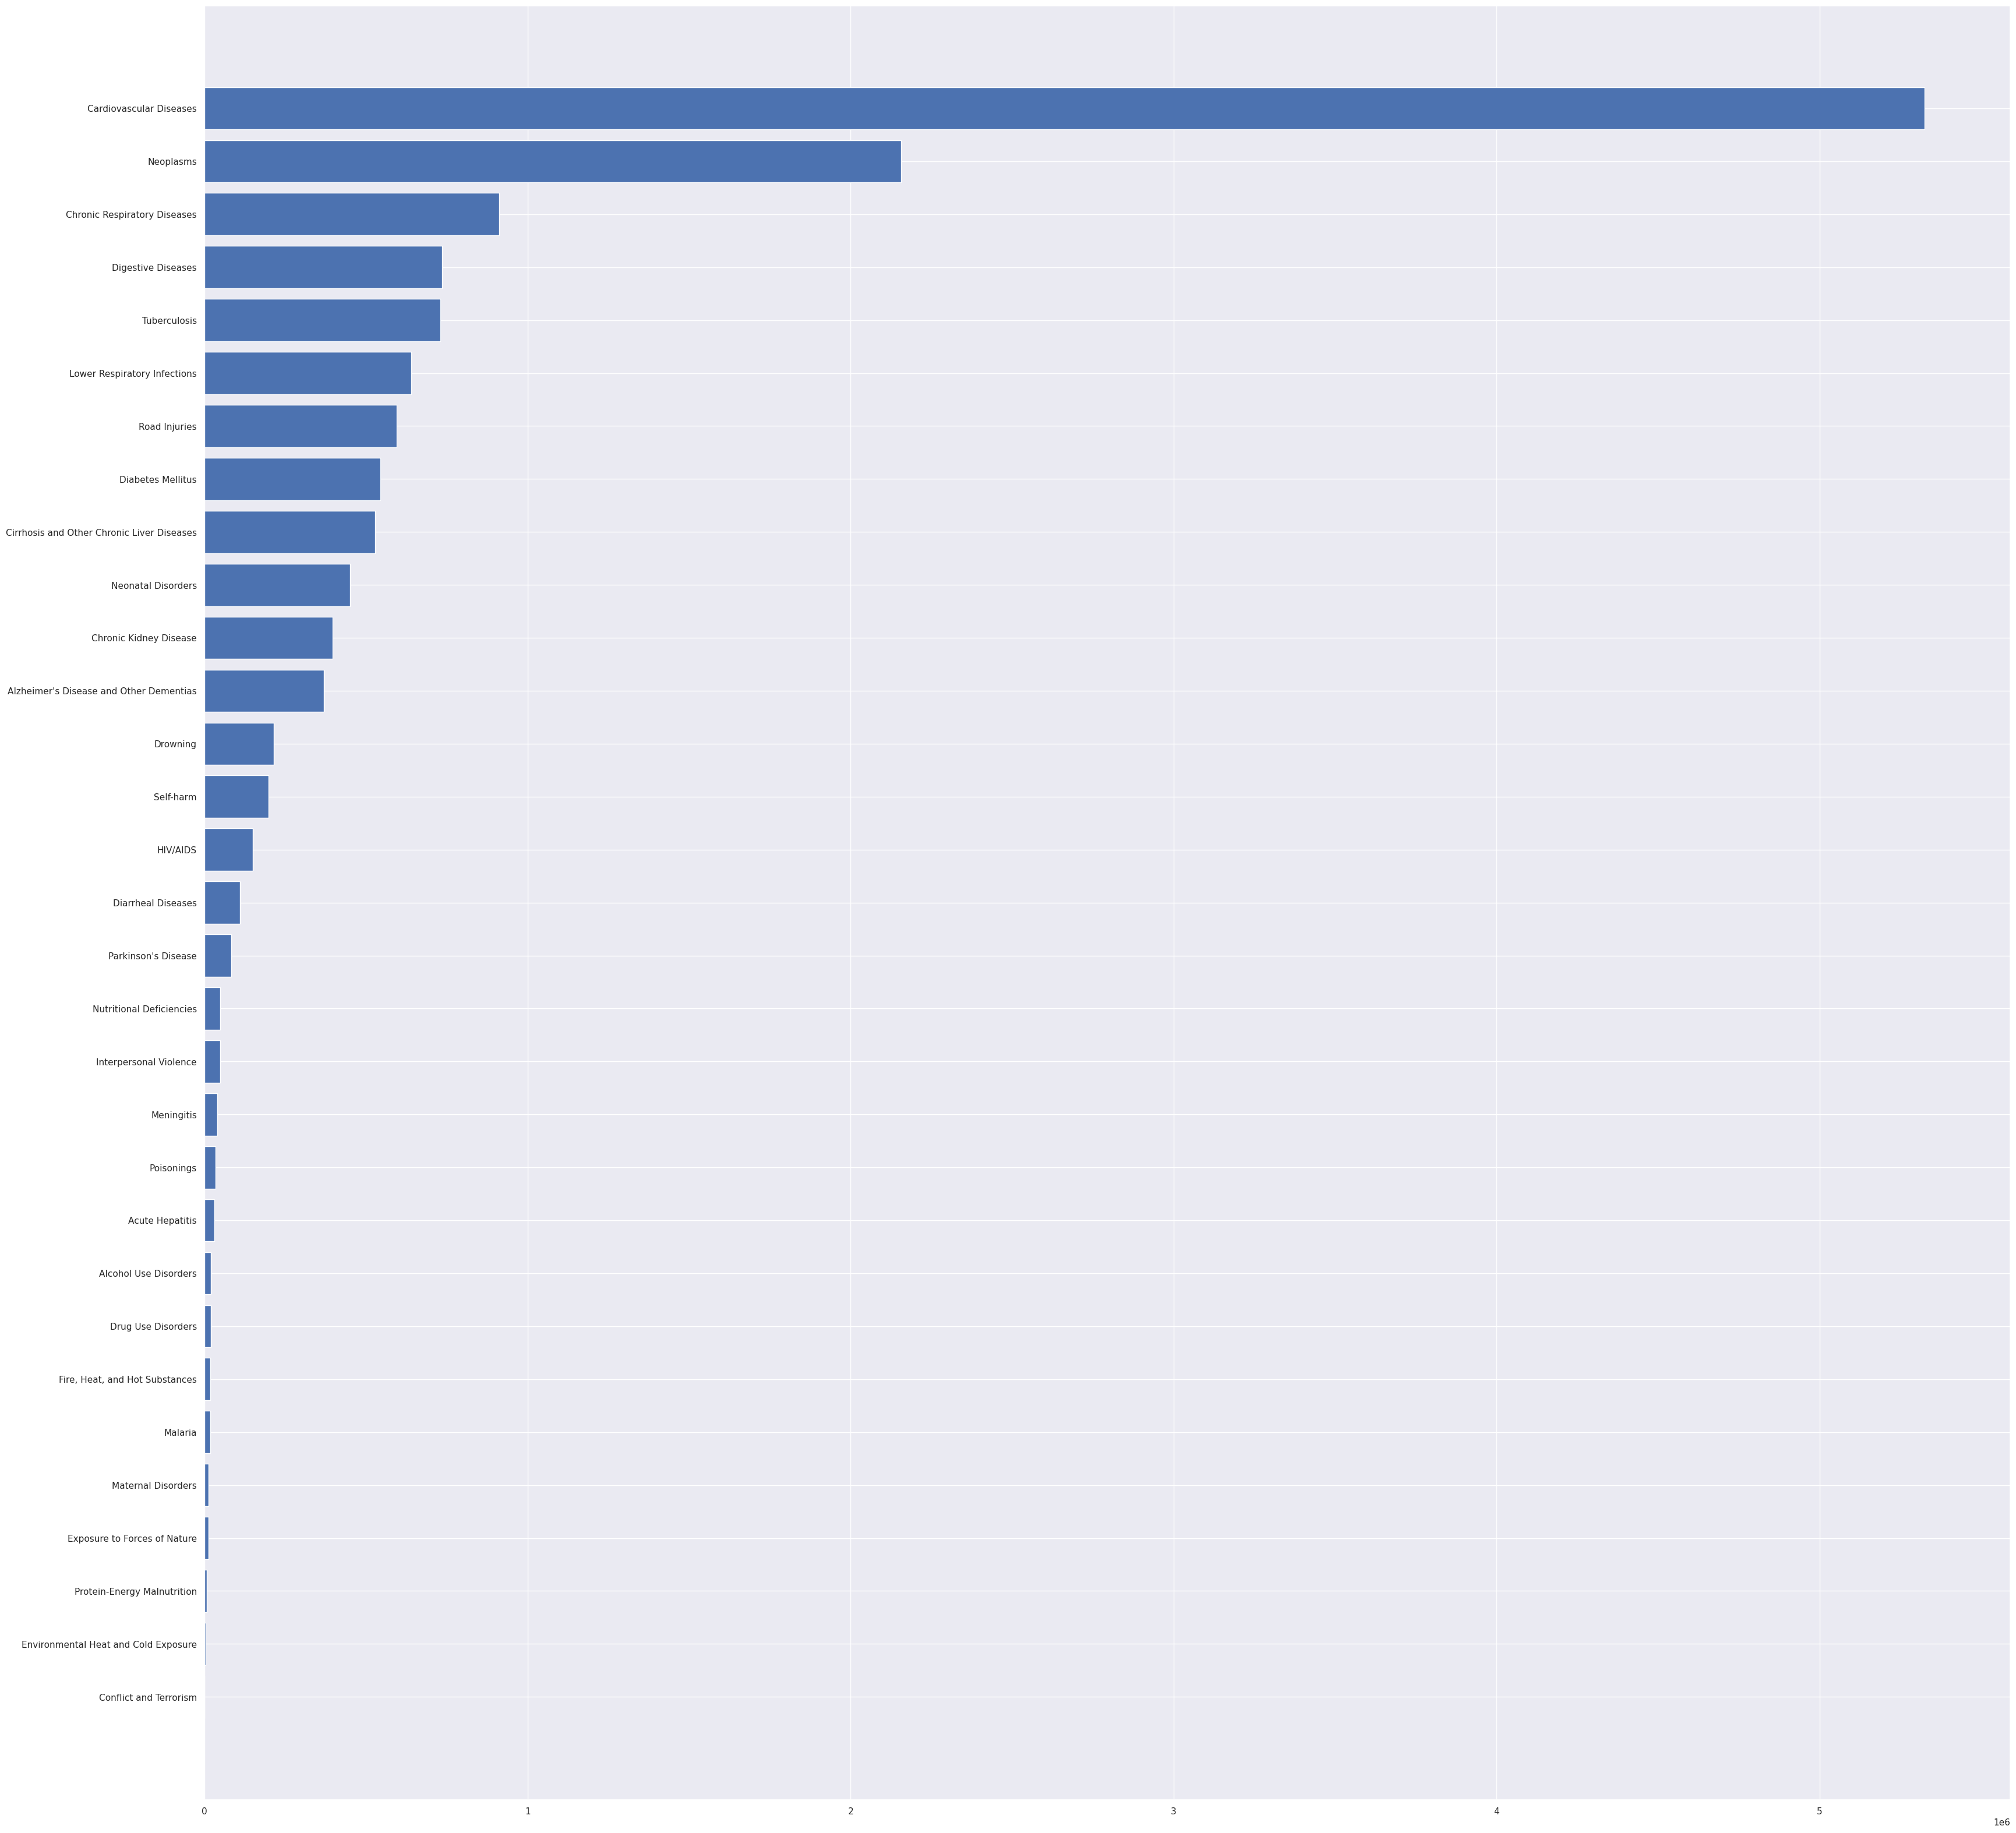

In [41]:
sum_death_vn = vietnamese_death_df.sum(axis = 0)
cause_death_vn = vietnamese_death_df.columns
sum_by_cause_vn = pd.DataFrame({'cause_death': cause_death_vn, 'sum_death': sum_death_vn})
sum_by_cause_vn.sort_values('sum_death',inplace=True, ascending=True)
sum_by_cause_vn = sum_by_cause_vn.reset_index(drop = True)
plt.barh(sum_by_cause_vn['cause_death'], sum_by_cause_vn['sum_death'])
plt.show()

Như vậy, từ biểu đồ, ta thấy có 5 loại nguyên nhân gây tử vong nhiều nhất tại Việt Nam: 
- Bệnh tim mạch (Cardiovascular diseases)
- Khối u (nguyên nhân của ung thư) (Neoplasms)
- Bệnh hô hấp mãn tính (Chnoric Respiratory Diseases)
- Các bệnh về đường tiêu hóa (Digestive Deseases)
- Bệnh lao (Tubeculosis)

Hmm... có vẻ những nguyên nhân này khá hợp lí so với tình hình thực tế ở nước ta.

## 5.3 Tỉ lệ các nguyên nhân tử vong của Việt Nam so với mặt bằng chung thế giới như thế nào ? Visualize biểu đồ so sánh ?

Để trả lời câu hỏi này, ta sẽ vẽ 2 biểu đồ tròn để quan sát tỉ lệ phần trăm các nguyên nhân gây tử vong ở Việt Nam và thể giới, để xem liệu có sự tương đồng (hay khác biệt) nào hay không.

Trước hết, ta sẽ tính tổng ca tử vong do các nguyên nhân khác nhau trên thế giới và lưu vào dataframe đặt tên là sum_by_cause_world. Cách lưu trữ và xử lí tương tự như ở câu 5.2

In [42]:
world_death = cause_of_deaths_df.drop(['Country/Territory', 'Code', 'Year'], axis = 1)
sum_death_world = world_death.sum(axis = 0)
cause_death_world = world_death.columns
sum_by_cause_world = pd.DataFrame({'cause_death': cause_death_world, 'sum_death': sum_death_world})
sum_by_cause_world.sort_values('sum_death',inplace=True, ascending=True)
sum_by_cause_world = sum_by_cause_world.reset_index(drop = True)

Tiếp theo, ta sẽ vẽ 2 biểu đồ tròn để xem tỉ lệ các nguyên nhân tử vong ở Việt Nam và thế giới như thế nào.

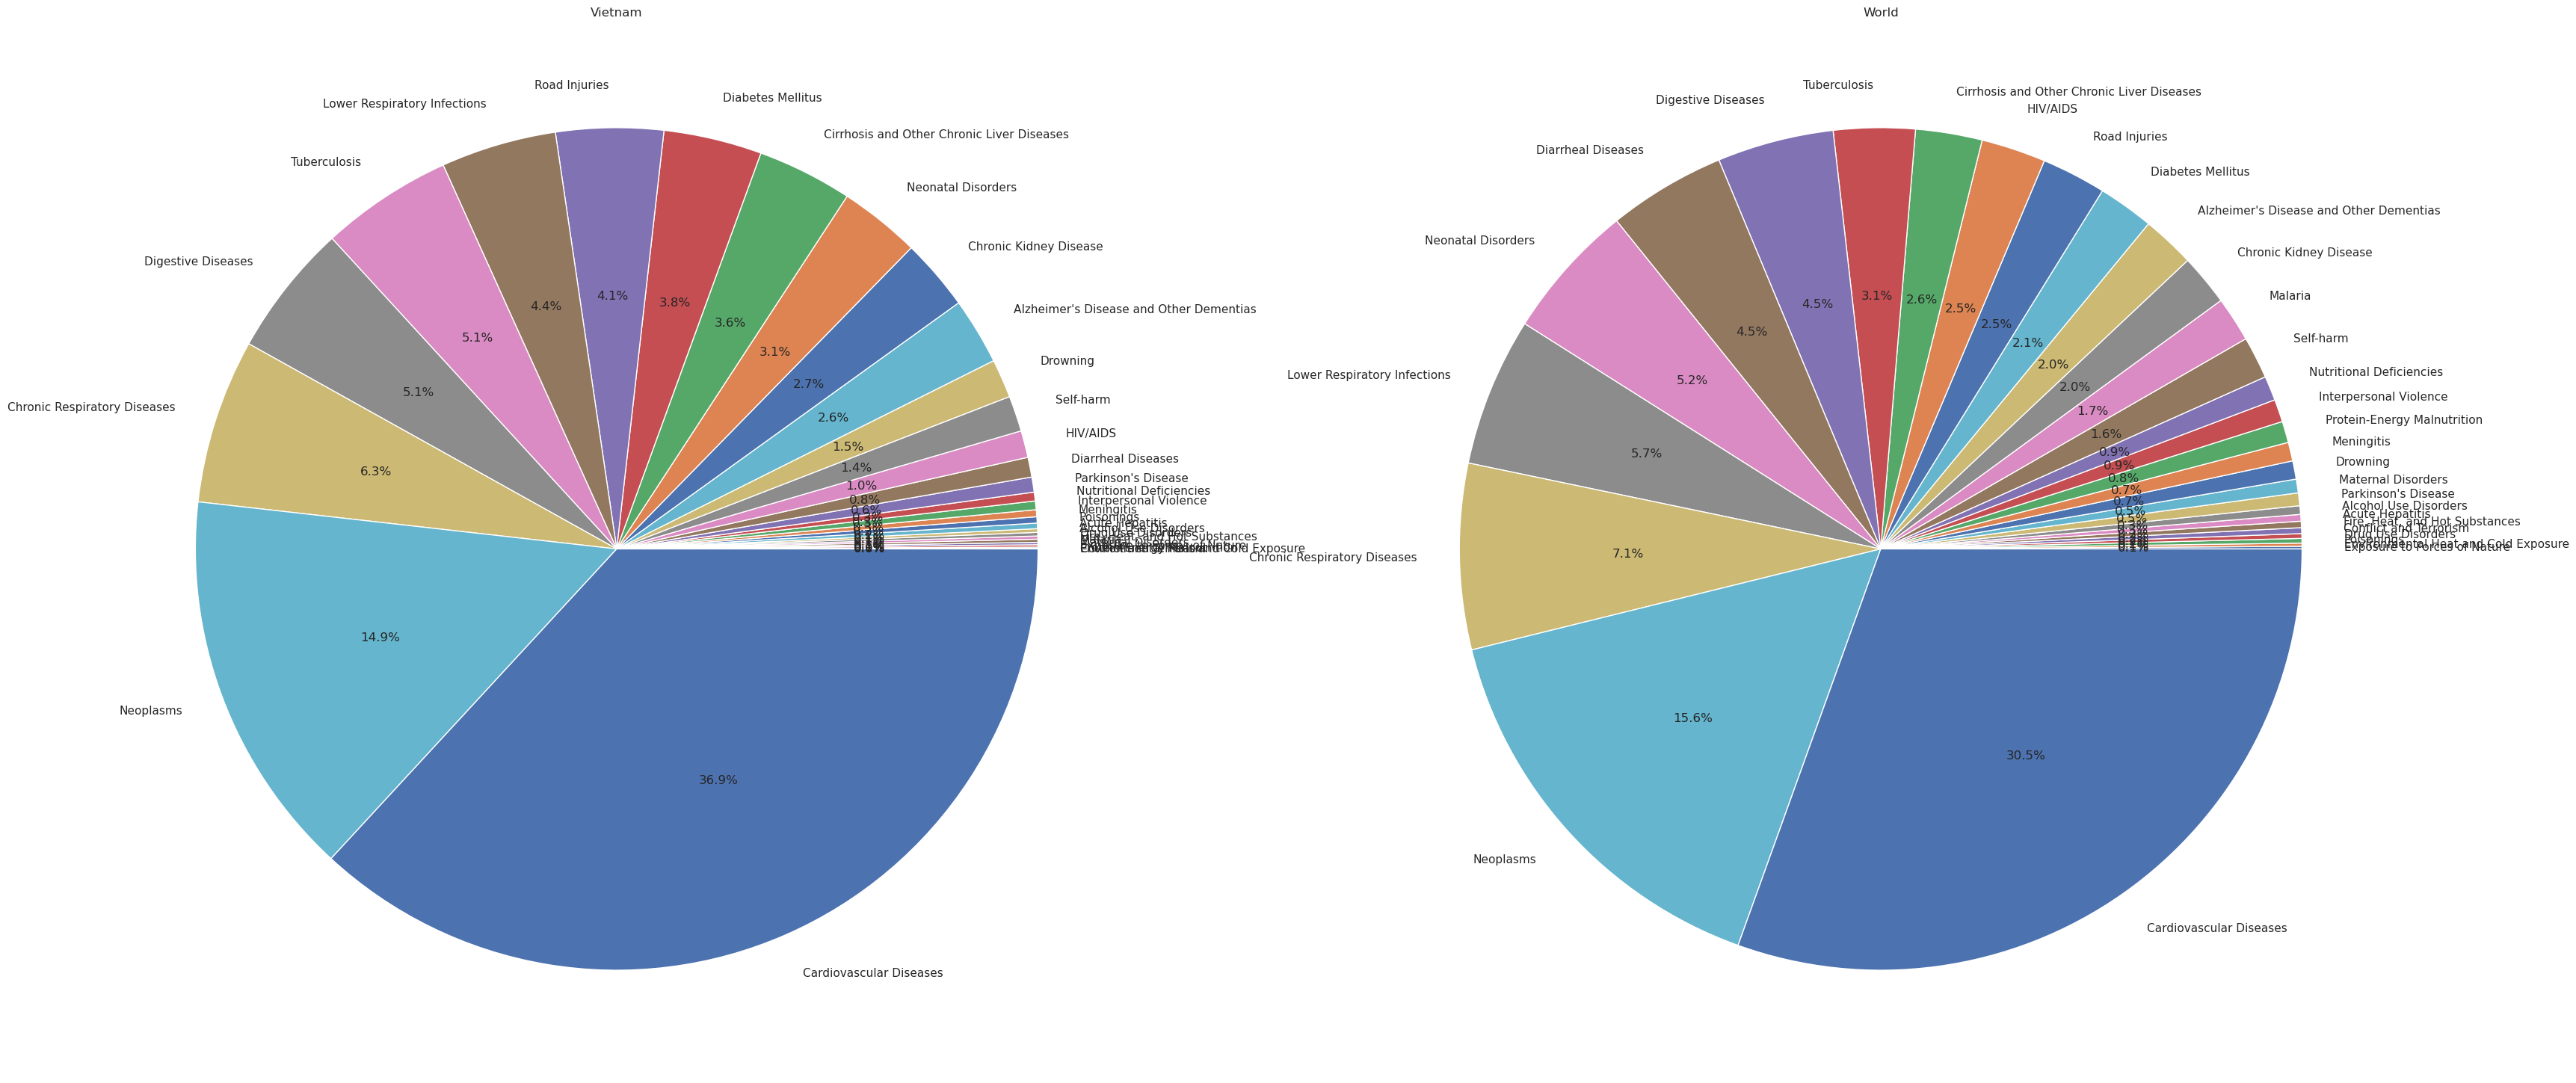

In [43]:
plt.rcParams['figure.figsize'] = [40, 20]
plt.subplot(1, 2, 1)
plt.pie(sum_by_cause_vn['sum_death'], labels = sum_by_cause_vn['cause_death'], autopct = '%1.1f%%')
plt.title("Vietnam")

plt.subplot(1, 2, 2)
plt.pie(sum_by_cause_world['sum_death'], labels = sum_by_cause_world['cause_death'], autopct = '%1.1f%%')
plt.title("World")

plt.show()

**Nhận xét:** 
- Nguyên nhân tử vong của Việt Nam so với thế giới khá giống nhau. 3 nguyên nhân  gây tử vong lớn nhất ở Việt Nam cũng là 3 nguyên nhân gây tử vong lớn nhất trên thế giới (cả 3 nguyên nhân lớn nhất này đã chiếm hơn 50% tỉ lệ tử vong của Việt Nam và thế giới).

- Từ nguyên nhân gây tử vong lớn thứ tư trở đi, Việt Nam đã có sự thay đổi so với thế giới. 
Ở Việt Nam, nguyên nhân gây tử vong lớn thứ tư và thứ năm là Các bệnh về đường tiêu hóa (Digestive Deseases) và Bệnh lao (Tubeculosis), trong khi đó thế giới là Viêm đường hô hấp (Lower Respiratory Infection) và Rối loạn sơ sinh (Neunatal disorders)

- Có vẻ như sự khác nhau này giúp chúng ta suy ra được rằng ở Việt Nam thì các bệnh về đường tiêu hóa và lao xảy ra nhiều hơn so với thế giới vào thời điểm đó. Điều này có lẽ do môi trường sống, hoặc do vấn đề vệ sinh chưa đảm bảo, ...

## Tuy nhiên rằng chúng ta sẽ tính toán con số hiện tại so với trung bình của toàn thế giới

Việc kiểm tra phần trăm, tỉ lệ các loại bệnh so với tổng số thế giới thì khá là tương đương với nhau, tuy nhiên rằng chúng ta cũng nên kiểm tra thử rằng trung bình 30 năm qua cuar Việt Nam so với thế giới thì sẽ như thế nào. Việc keiẻm tra trung bình của Việt Nam so với thế giới cũng sẽ khiến cho góc nhìn khách quan hơn

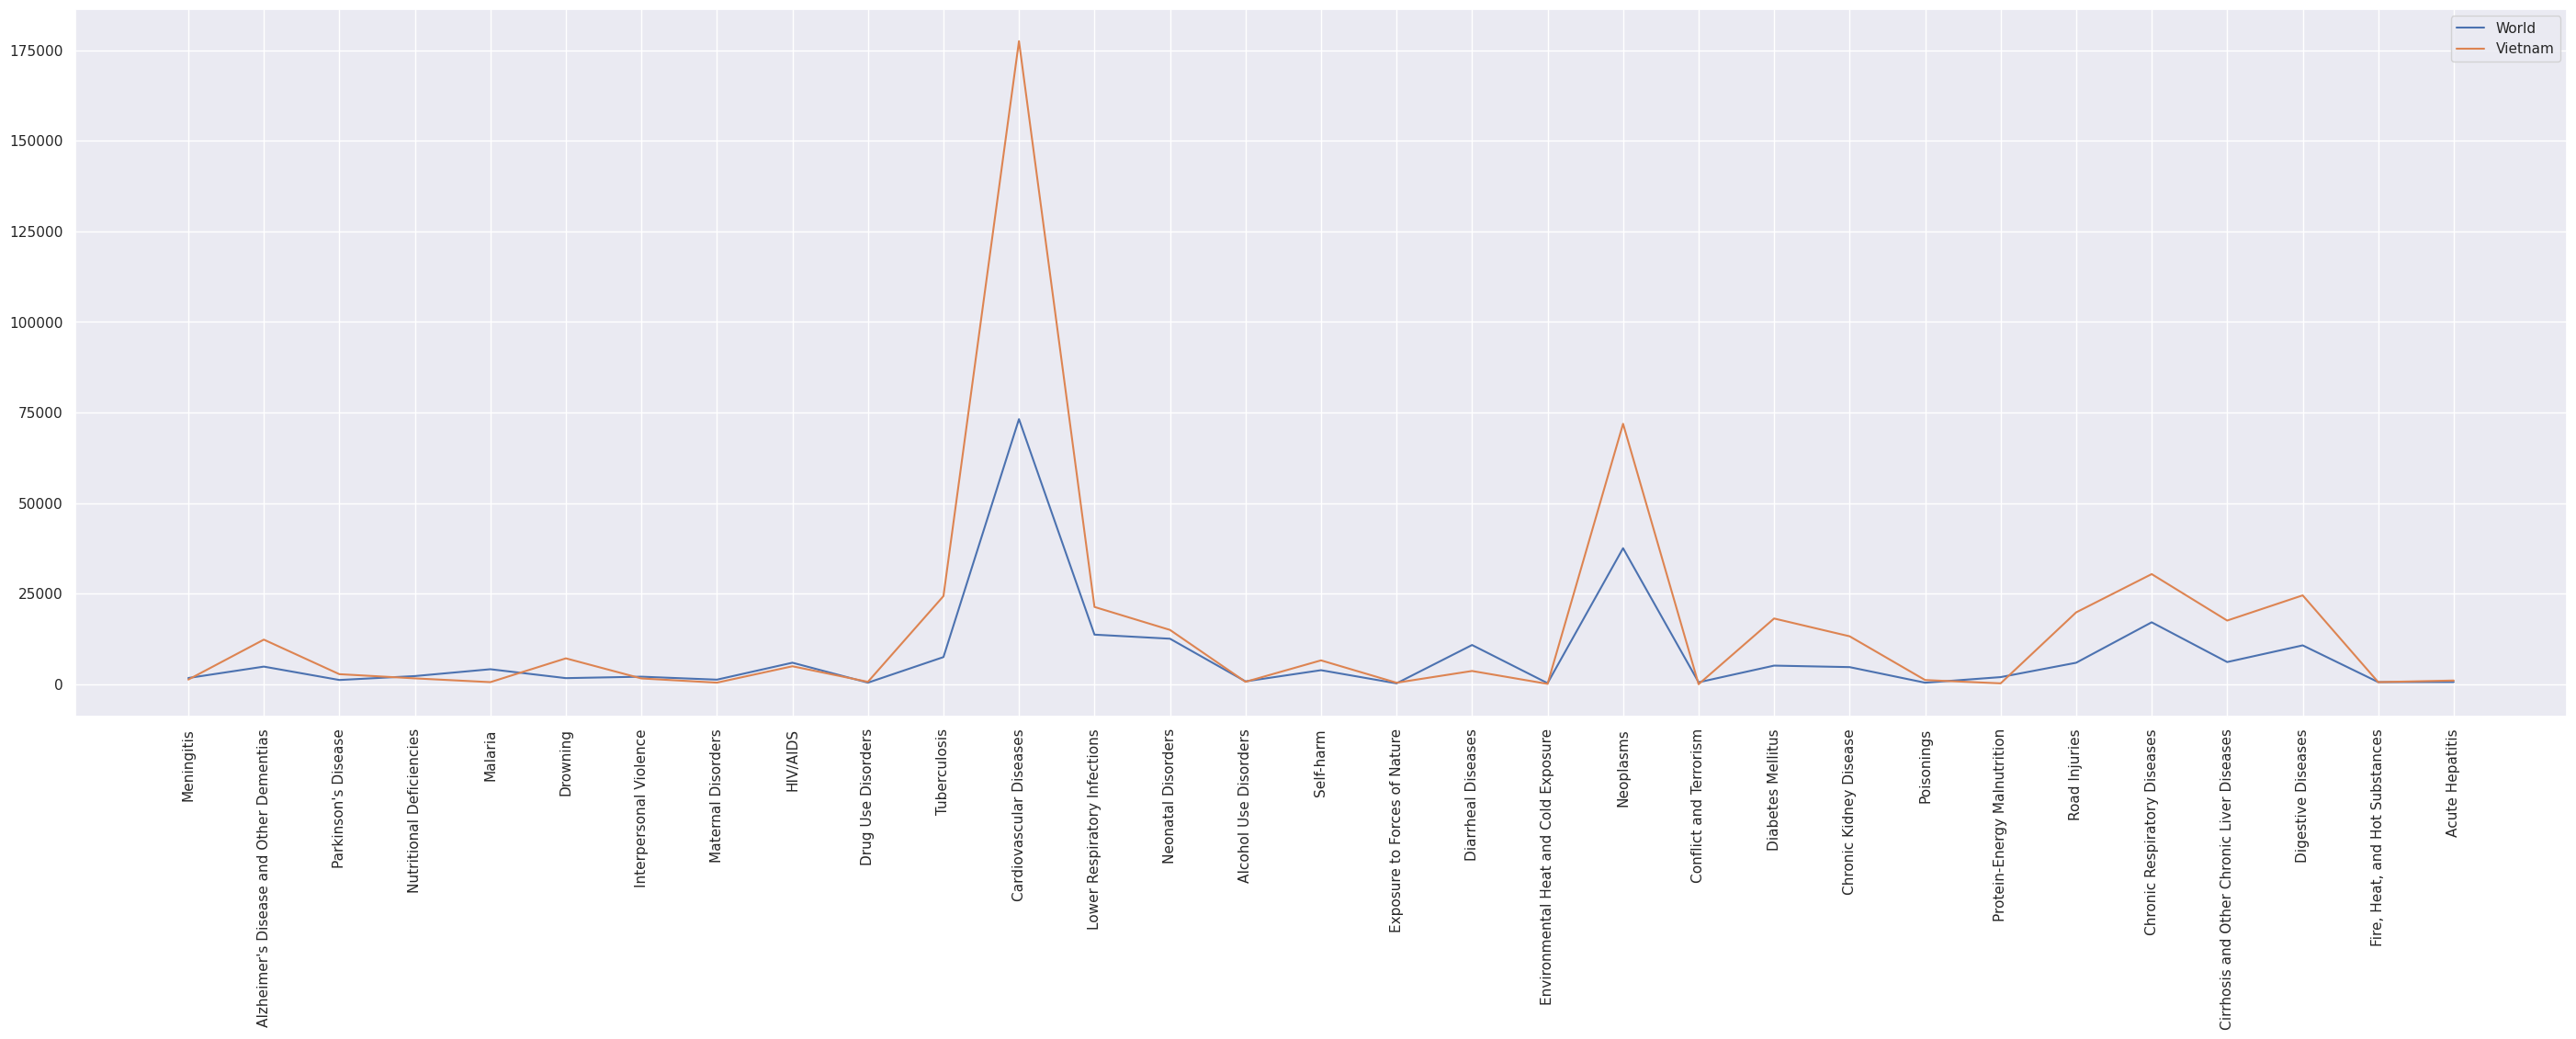

In [44]:
##Tính toán trung bình tử vong các ca trên thế giới

mean_world = cause_of_deaths_df[names_cause].mean()
mean_vietnam = vietnamese_death_df[names_cause].mean()

##Ta sẽ dùng tới sự trợ giúp của anh bạn seaborn
plt.figure(figsize = (35,10))
axs = sns.lineplot(data = mean_world, label = "World")
axs = sns.lineplot(data = mean_vietnam, label = "Vietnam")
xtick = plt.xticks(rotation=90)

Ta có thể thấy được rằng, bệnh tim mạch của Việt Nam đang CAO HƠN RẤT NHIỀU so với mặt bằng chung của thế giới, việc này rất là báo động cho tình trạng sức khỏe, mức sống và chất lượng sống hiện nay của người dân Việt Nam.
Việc bệnh tim mạch cao như vậy có thể là do các thức ăn sử dụng quá nhiều dầu mỡ không có lợi, sự bùng nổ của thức ăn nhanh và lạm dụng chúng, thực phẩm không được sạch, người dân Việt Nam lười ăn rau đi và có thể do văn hóa nhậu nhẹt, rựu chè ở Việt Nam cũng ảnh hưởng rất nhiều tới sức khỏe tim mạch

Ngoài ra rằng cũng có một vài bệnh của Việt Nam cao hơn trung bình của thế giới như là bệnh về khối u, tai nạn giao thông, bệnh hô hấp ( lao ) do khoảng năm 2000 - 2005 bệnh Lao rất bùng nổ ở Việt Nam, cháy nổ do con người Việt Nam chưa phòng cháy chữa cháy tốt,...

Các bệnh còn lại có số lượng khá là khớp so với trung bình thế giới

# Câu 6: Hãy nhận xét về tỉ lệ các bệnh không lây nhiễm và các bệnh lây nhiễm trong thời gian từ 1990 đến 2019. Từ đó hãy đưa ra kết luận.

## Để trả lời câu hỏi này, ta có thể làm như sau:

### B1. Chia các nguyên nhân gây nên tỉ lệ tử vong thành 3 loại chính:

- Bệnh truyền nhiễm (communicable diseases):,Nutritional Deficiencies,Malaria,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Neonatal Disorders,Alcohol Use Disorders,Diarrheal Diseases.

- Bệnh không lây nhiễm (non-communicable diseases): Meningitis,Alzheimer's Disease and Other Dementias, Parkinson's Disease, Cardiovascular Diseases,Lower Respiratory Infections, Acute Hepatitis, Digestive Diseases, Cirrhosis and Other Chronic Liver Diseases, Chronic Respiratory Diseases, Diabetes Mellitus,Chronic Kidney Disease, Neoplasms

- Tai nạn hoặc thương tích (injures): Drowning, Interpersonal Violence, "Fire, Heat, and Hot Substances", Road Injuries, Poisonings,Protein-Energy Malnutrition, Conflict and Terrorism, Self-harm, Exposure to Forces of Nature, Environmental Heat and Cold Exposure.

Ta sẽ chia các nguyên nhân tử vong thành 3 nhóm trên, sau đó tính tổng số ca tử vong bởi các nguyên nhân đó theo các năm.
Lưu trữ chúng vào một dataframe, đặt tên là cause_death_df. Trong đó: mỗi dòng là mỗi năm, mỗi cột là mỗi nhóm nguyên nhân tử vong, và giá trị của mỗi ô là số ca tử vong của nhóm nguyên nhân đó trong một năm nhất định.

In [53]:
# Chia các nguyên nhân tử vong theo 3 nhóm và tạo dataframe tương ứng
# Ở đây, ta vẫn giữ lại cột Year để các bước sau có thể gom 3 nhóm này lại với nhau dựa theo Year.
# (Tuy nhiên làm vậy thì khi tính tổng ta sẽ phải loại bỏ cột Year để tính)
communicable_diseases_df = cause_of_deaths_df[["Year", "Nutritional Deficiencies", "Malaria", "Maternal Disorders", "HIV/AIDS","Drug Use Disorders","Tuberculosis","Neonatal Disorders","Alcohol Use Disorders","Diarrheal Diseases"]]

non_communicable_diseases_df = cause_of_deaths_df[["Year", "Meningitis","Alzheimer's Disease and Other Dementias", "Parkinson's Disease", 
"Cardiovascular Diseases","Lower Respiratory Infections", "Acute Hepatitis", "Digestive Diseases", "Cirrhosis and Other Chronic Liver Diseases", 
"Chronic Respiratory Diseases", "Diabetes Mellitus","Chronic Kidney Disease"]]

injures_df = cause_of_deaths_df[["Year","Drowning", "Interpersonal Violence", "Fire, Heat, and Hot Substances", "Road Injuries", "Poisonings" ,
"Protein-Energy Malnutrition", "Conflict and Terrorism", "Self-harm", "Exposure to Forces of Nature", 
"Environmental Heat and Cold Exposure"]]

# Tính tổng các ca tử vong theo năm bằng cách gom nhóm theo năm.
# Chú ý: Cần phải trừ đi cột Year vì khi tính tổng 1 dòng ta đã tính luôn cả cột Year vào.
communicable_diseases_df = communicable_diseases_df.assign(sumRow = communicable_diseases_df.sum(axis=1)
 - communicable_diseases_df['Year']) 
sum_by_year_communicable_diseases_df = communicable_diseases_df[['Year',
'sumRow']].groupby('Year').sum().reset_index(drop=False)

non_communicable_diseases_df = non_communicable_diseases_df.assign(sumRow = non_communicable_diseases_df.sum(axis=1) 
- non_communicable_diseases_df['Year'])
sum_by_year_non_communicable_diseases_df = non_communicable_diseases_df[['Year',
'sumRow']].groupby('Year').sum().reset_index(drop=False)

injures_df = injures_df.assign(sumRow = injures_df.sum(axis=1) - injures_df['Year']) 
sum_by_year_injures_df = injures_df[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)

# Gom các kết quả của 3 bảng vào thành 1 dataframe duy nhất
sum_by_year_df = sum_by_year_communicable_diseases_df.merge(sum_by_year_non_communicable_diseases_df,
                                                            on='Year').merge(sum_by_year_injures_df,on='Year')

# Đổi tên cột cho phù hợp
sum_by_year_df.rename(columns={'sumRow_x': 'communicable_diseases', 'sumRow_y': 'non_communicable_diseases', 'sumRow': 'injures'}, inplace=True)

# Xuất ra màn hình để kiểm tra
sum_by_year_df

Year  communicable_diseases  non_communicable_diseases  injures
0   1990               10084371                   23908395  3773154
1   1991               10166054                   24177053  3848657
2   1992               10224865                   24534619  3703548
3   1993               10207777                   25050865  3760002
4   1994               10219980                   25374264  4292303
5   1995               10337041                   25547852  3889244
6   1996               10309093                   25702942  3818189
7   1997               10364842                   25921331  3800123
8   1998               10418592                   26114667  3829660
9   1999               10446088                   26458979  3889475
10  2000               10446997                   26796058  3805335
11  2001               10428925                   27108306  3734192
12  2002               10382824                   27564812  3695402
13  2003               10242392                   27875492  3617769
14  2004               10098132                   27929717  3797818
15  2005                9959451                   28352157  3626713
16  2006                9790288                   28396204  3515297
17  2007                9565083                   28614235  3465193
18  2008                9342678                   29080461  3665428
19  2009                9049674                   29275383  3407969
20  2010                8811346                   29674318  3607823
21  2011                8570096                   30016815  3357599
22  2012                8273436                   30371619  3340647
23  2013                8041215                   30824192  3308880
24  2014                7813320                   31224986  3309760
25  2015                7615656                   31829314  3277807
26  2016                7396741                   32365869  3237931
27  2017                7203010                   32861362  3195895
28  2018                6993848                   33581649  3177989
29  2019                6844337                   34319955  3124353

### B2: Đưa số liệu về dạng phần trăm

OK, vậy là chúng ta đã tìm ra được tổng số liệu tử vong của mỗi nhóm. Tuy nhiên, để biểu thị tỉ lệ, chúng ta cần đưa dữ liệu đó về dạng phần trăm để xem chúng chiếm tỉ lệ là bao nhiêu trong mỗi năm, từ đó sẽ dễ dàng để ta trực quan hóa hơn.

In [54]:
total_sum_by_year = sum_by_year_df.sum(axis = 1) - sum_by_year_df['Year']
sum_by_year_df['communicable_diseases'] = (sum_by_year_df['communicable_diseases']*100/total_sum_by_year).round(2)
sum_by_year_df['non_communicable_diseases'] = (sum_by_year_df['non_communicable_diseases']*100/total_sum_by_year).round(2)
sum_by_year_df['injures'] = 100 - sum_by_year_df['communicable_diseases'] - sum_by_year_df['non_communicable_diseases']
sum_by_year_df

Year  communicable_diseases  non_communicable_diseases  injures
0   1990                  26.70                      63.31     9.99
1   1991                  26.62                      63.30    10.08
2   1992                  26.58                      63.79     9.63
3   1993                  26.16                      64.20     9.64
4   1994                  25.62                      63.62    10.76
5   1995                  25.99                      64.23     9.78
6   1996                  25.88                      64.53     9.59
7   1997                  25.86                      64.66     9.48
8   1998                  25.81                      64.70     9.49
9   1999                  25.61                      64.86     9.53
10  2000                  25.45                      65.28     9.27
11  2001                  25.27                      65.68     9.05
12  2002                  24.93                      66.19     8.88
13  2003                  24.54                      66.79     8.67
14  2004                  24.14                      66.78     9.08
15  2005                  23.75                      67.60     8.65
16  2006                  23.48                      68.09     8.43
17  2007                  22.97                      68.71     8.32
18  2008                  22.20                      69.09     8.71
19  2009                  21.68                      70.15     8.17
20  2010                  20.93                      70.50     8.57
21  2011                  20.43                      71.56     8.01
22  2012                  19.71                      72.34     7.95
23  2013                  19.07                      73.09     7.84
24  2014                  18.45                      73.73     7.82
25  2015                  17.83                      74.50     7.67
26  2016                  17.20                      75.27     7.53
27  2017                  16.65                      75.96     7.39
28  2018                  15.98                      76.75     7.27
29  2019                  15.45                      77.49     7.06

### B3: Vẽ biểu đồ

Ta sẽ dùng biểu đồ để biểu diễn sự thay đổi tỉ lệ của các nguyên nhân gây tử vong qua các năm.

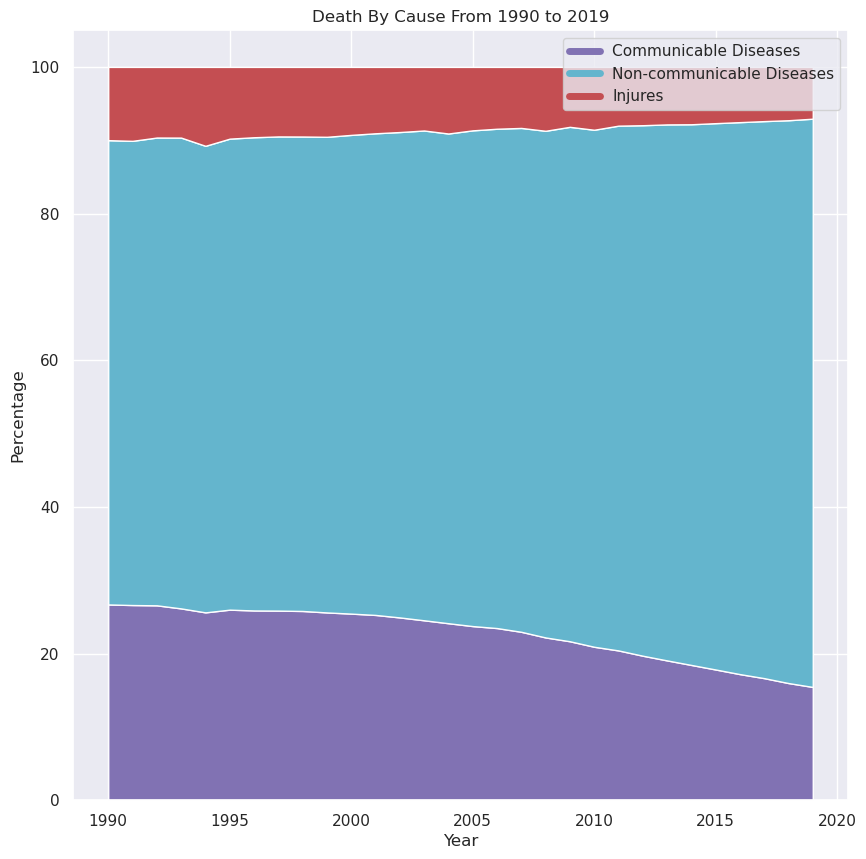

In [55]:
plt.rcParams['figure.figsize'] = [10, 10]
 
# Stackplot

plt.plot([],[],color='m', label='Communicable Diseases', linewidth=5)
plt.plot([],[],color='c', label='Non-communicable Diseases', linewidth=5)
plt.plot([],[],color='r', label='Injures', linewidth=5)

plt.stackplot(sum_by_year_df['Year'],
                sum_by_year_df['communicable_diseases'], 
              sum_by_year_df['non_communicable_diseases'], 
              sum_by_year_df['injures'], 
             colors=['m','c','r'])
 
plt.xlabel('Year')
 
plt.ylabel('Percentage')
 
# Title of Graph
plt.title('Death By Cause From 1990 to 2019')
plt.legend()
# Displaying Graph
plt.show()




**Nhận xét:**
- Từ biểu đồ miền, ta thấy tỉ lệ tử vong do bị thương tích (thiên tai, hỏa hoạn,...)là nhỏ nhất, lớn nhất là tỉ lệ tử vong do các bệnh không lây nhiễm (tim mạch, bệnh đường tiêu hóa, viêm phổi, ung thư, tiểu đường...).

- Về xu hướng: Từ năm 1990 đến năm 2019, ta thấy: Tỉ lệ tử vong các bệnh có khả năng lây nhiễm cao (sốt rét, tiêu chảy, HIV/AIDS, lao phổi,...) đang có xu hướng giảm dần đi nhanh chóng. Tỉ lệ tử vong do các bệnh không lây nhiễm (các bệnh liên quan đến cá nhân) đang tăng lên. Tỉ lệ tử vong do thương tích cũng đang có xu hướng giảm dần.

- Giải thích: 

    + Có lẽ do sự tiến bộ trong y học, con người đã dần chống lại được các bệnh truyền nhiễm nên tỉ lệ các bệnh truyền nhiễm giảm nhanhh chóng.

    + Điều kiện sống và làm việc của con người cũng như khả năng chống lại thiên tai đang dần được nâng cao, do đó tỉ lệ tử vong do thương tích cũng bị giảm đi khá nhiều.

    + Cùng với sự phát triển của xã hội, thì tuổi thọ của con người được kéo dài hơn. Và khi dân số thế giới già đi, tỉ lệ tử vong do các bệnh không lây nhiễm sẽ dần chiếm ưu thế so với 2 nguyên nhân còn lại.

# Câu 7: Hãy phân tích và nhận xét về nguyên nhân tử vong ở các quốc gia có thu nhập thấp nhất. 
Nếu chúng ta trả lời được câu hỏi này, ta sẽ biết được những vấn đề đang tồn tại ở các quốc gia này, từ đó chúng ta có thể lý giải được nguyên nhân và đưa ra các biện pháp khắc phục chúng.

Trước hết, ta cần xác định được những nước nào là những nước có thu nhập thấp nhất. Vì dữ liệu của chúng ta chỉ có mã quốc gia và số người tử vong ở các nguyên nhân khác nhau, nên chúng ta sẽ cần phải tìm các quốc gia có thu nhập thấp từ một nguồn khác (ở đây sẽ dùng Google để tra cứu).

Ở đây, ta đã tìm được 10 nước có thu nhập thấp nhất là:
1. Burundi (BDI)
2. Somalia (SOM)
3. Mozambique (MOZ)
4. Madagascar (MDG)
5. Siera Leone (không tìm thấy trong dataset)
6. Afghanistan (AFG)
7. Eritrea (ERI)
8. Central African Republic (CAF)
9. Liberia (LBR)
10. Niger (NER)

Nguồn: https://worldpopulationreview.com/country-rankings/poorest-countries-in-the-world

Vì không có số liệu tử vong của Siera Leone nên ta tạm thời bỏ qua nước này mà xét 9 nước có thu nhập thấp nhất còn lại.

Tiếp theo, ta sẽ cùng phân tích dữ liệu thông qua các bước dưới đây.

**Bước 1**. Lấy ra các dòng dữ liệu thuộc 9 quốc gia này, sau đó tính tổng số ca tử vong theo từng nguyên nhân. Ta dùng dataframe về tổng số ca tử vong của thế giới theo từng nguyên nhân (đã làm ở câu 6), cùng với dataframe này và vẽ lại biểu đồ để so sánh.

In [56]:
# Liệt kê ra các quốc gia thuộc nhóm có thu nhập thấp (có "Code" ở phía trên)
low_income_countries = ['BDI', 'SOM', 'MOZ', 'MDG', 'AFG', 'ERI', 'CAF', 'LBR', 'NER']

# ở đây vì số quốc gia chỉ có 9 nên ta có thể sử dụng for để lặp qua 
li_countries = cause_of_deaths_df[cause_of_deaths_df['Code'].isin(low_income_countries)].reset_index(drop=True)
li_countries = li_countries.drop(['Country/Territory', 'Code', 'Year'], axis = 1)

# Tính tổng số ca tử vong, lưu vào dataframe
sum_death_li_countries = li_countries.sum(axis = 0)
cause_death_li_countries = li_countries.columns
sum_by_cause_li_countries = pd.DataFrame({'cause_death': cause_death_li_countries, 'sum_death': sum_death_li_countries})
sum_by_cause_li_countries.sort_values('sum_death',inplace=True, ascending=True)
sum_by_cause_li_countries = sum_by_cause_li_countries.reset_index(drop = True)
sum_by_cause_li_countries


cause_death  sum_death
0                           Drug Use Disorders      11314
1                        Alcohol Use Disorders      21723
2         Environmental Heat and Cold Exposure      23621
3                 Exposure to Forces of Nature      25378
4                          Parkinson's Disease      38491
5                                   Poisonings      83610
6               Fire, Heat, and Hot Substances      92332
7      Alzheimer's Disease and Other Dementias     139351
8                                     Drowning     166202
9                              Acute Hepatitis     174387
10                                   Self-harm     214325
11                      Interpersonal Violence     279040
12                      Chronic Kidney Disease     385450
13                           Diabetes Mellitus     427690
14                          Maternal Disorders     516637
15  Cirrhosis and Other Chronic Liver Diseases     552055
16                      Conflict and Terrorism     584679
17                               Road Injuries     689088
18                Chronic Respiratory Diseases     756664
19                                  Meningitis     827012
20                          Digestive Diseases     987194
21                 Protein-Energy Malnutrition    1092120
22                    Nutritional Deficiencies    1123016
23                                   Neoplasms    1549575
24                                Tuberculosis    2401830
25                                    HIV/AIDS    2446721
26                                     Malaria    2461926
27                          Neonatal Disorders    3376463
28                          Diarrheal Diseases    3744797
29                Lower Respiratory Infections    3766186
30                     Cardiovascular Diseases    4413147

Text(0.5, 1.0, 'Sum Death In The World')

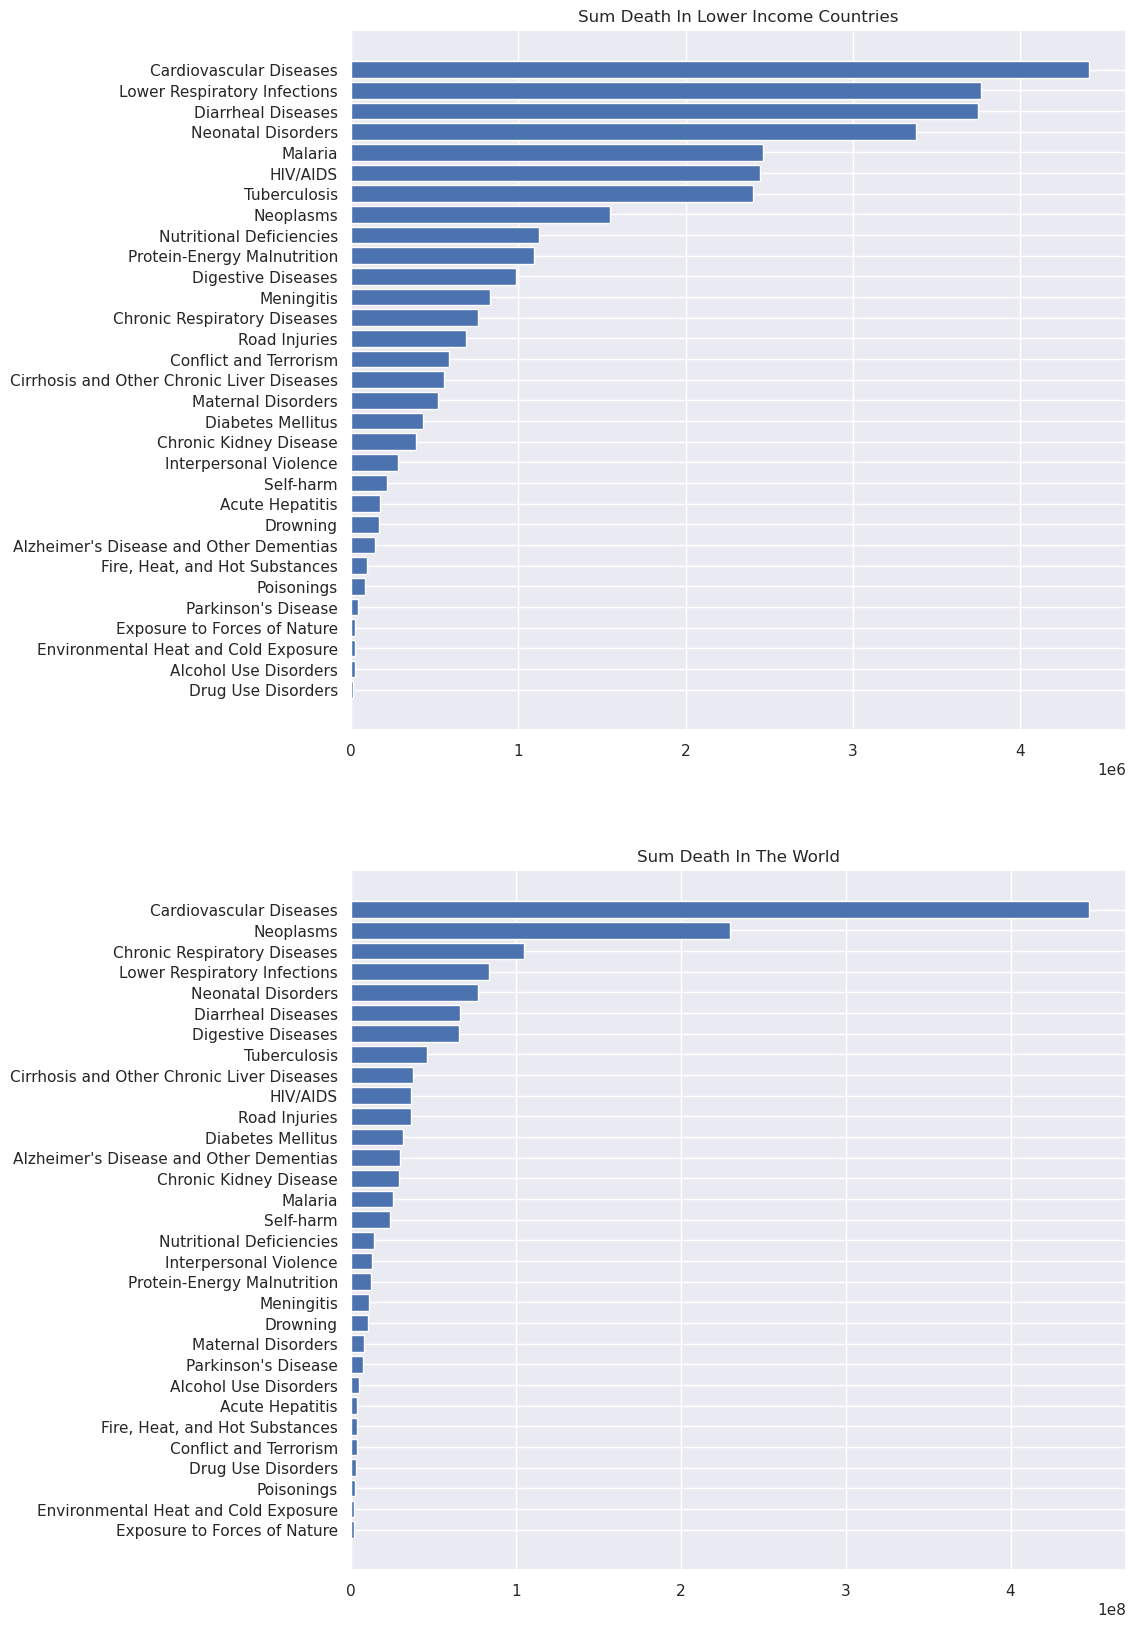

In [57]:
# Vẽ biểu đồ cột
# Vẽ biểu đồ
plt.rcParams['figure.figsize'] = [10,20]
fig, (ax1, ax2) = plt.subplots(2)
ax1.barh(sum_by_cause_li_countries['cause_death'], sum_by_cause_li_countries['sum_death'])
ax1.set_title('Sum Death In Lower Income Countries')
ax2.barh(sum_by_cause_world['cause_death'], sum_by_cause_world['sum_death'])
ax2.set_title('Sum Death In The World')

**Nhận xét**: 

Có vẻ như bệnh tim mạch vẫn là nguyên nhân gây tử vong nhiều nhất ở các nước có thu nhập thấp, nhưng không còn có sự chênh lệch quá lớn so với các nguyên nhân khác. 

Ta có thể liệt kê ra một số nguyên nhân gây tử vong lớn ở các quốc gia này (trừ bệnh tim mạch, ta đã nói ở trên):

2. Lower Respiratory Infections (nhiễm trùng đường hô hấp)
3. Diarrheal Diseases (bệnh tiêu chảy)
4. Neonatal Disorders (rối loạn sơ sinh)
5. Malaria (bệnh sốt rét)
6. HIV/AIDS (hội chứng suy giảm miễn dịch)

Có đến 4/5 loại nguyên nhân thuộc loại bệnh truyền nhiễm (communicable diseases) (ta đã phân tích ở câu 6). Có vẻ như tình trạng tử vong do các bệnh truyền nhiễm ở các quốc gia thu nhập thấp lớn hơn so với thế giới nói chung. Có lẽ do thu nhập thấp nên dẫn đến cơ sở hạ tầng yếu kém và đội ngũ nhân viên y tế thiếu trình độ, từ đó dẫn đến số người tử vong vì các bệnh truyền nhiễm lại lớn như vậy.

**Bước 2**: 

Ta sẽ tiếp tục xét 4 nguyên nhân tử vong do bệnh truyền nhiễm trên là Diarrheal Diseases, Neunatal Disorders, Malaria và HIV/AIDS. Ta sẽ vẽ biểu đồ biểu diễn số lượng tử vong của 4 nguyên nhân này từ năm 1990 đến 2019, để xem số lượng đang tăng lên hay giảm xuống, từ đó đánh giá tình trạng và đưa ra giải pháp để cải thiện tình hình.

In [58]:
# Xử lí lại dữ liệu để lấy ra 'Year'
low_income_countries = ['BDI', 'SOM', 'MOZ', 'MDG', 'AFG', 'ERI', 'CAF', 'LBR', 'NER']
li_countries = cause_of_deaths_df[cause_of_deaths_df['Code'].isin(low_income_countries)].reset_index(drop=True)
li_countries = li_countries.drop(['Country/Territory', 'Code'], axis = 1)

# Lấy ra số lượng tử vong của 4 nguyên nhân tử vong
communicable_diseases_lc_countries_df = li_countries[['Year', 'Diarrheal Diseases', 'Neonatal Disorders', 'Malaria', 'HIV/AIDS']]

# Gom nhóm và tính số lượng tử vong theo từng năm
sum_by_year_communicable_diseases_lc_countries_df = communicable_diseases_lc_countries_df.groupby('Year').sum().reset_index(drop=False)

# Xuất số liệu
sum_by_year_communicable_diseases_lc_countries_df

Year  Diarrheal Diseases  Neonatal Disorders  Malaria  HIV/AIDS
0   1990              129743               86275    77940     11547
1   1991              130160               87892    77864     16637
2   1992              132881               92122    79023     22674
3   1993              137042               97122    79071     29421
4   1994              139943              100594    80909     36942
5   1995              142181              103100    81762     45142
6   1996              142153              105230    82402     53454
7   1997              142841              107837    83746     61802
8   1998              142087              109496    86002     70160
9   1999              141389              110374    87292     78452
10  2000              137932              111183    87275     86430
11  2001              134728              112586    90398     93878
12  2002              132347              114172    89608    100889
13  2003              131127              116160    88660    107122
14  2004              128040              117135    83996    112131
15  2005              129408              118292    83828    115502
16  2006              127896              117946    84748    112885
17  2007              125941              118578    84943    107025
18  2008              121633              118725    80561    103463
19  2009              118126              119125    83371    103051
20  2010              113540              119765    84369    104594
21  2011              112255              120351    85012    106140
22  2012              109709              120974    83957    108734
23  2013              109387              121327    84018    108066
24  2014              108256              121359    81948    102379
25  2015              106859              121261    79033     96608
26  2016              106707              121474    76956     92318
27  2017              106363              121511    72802     88882
28  2018              102805              122161    69287     86005
29  2019              101318              122336    71145     84388

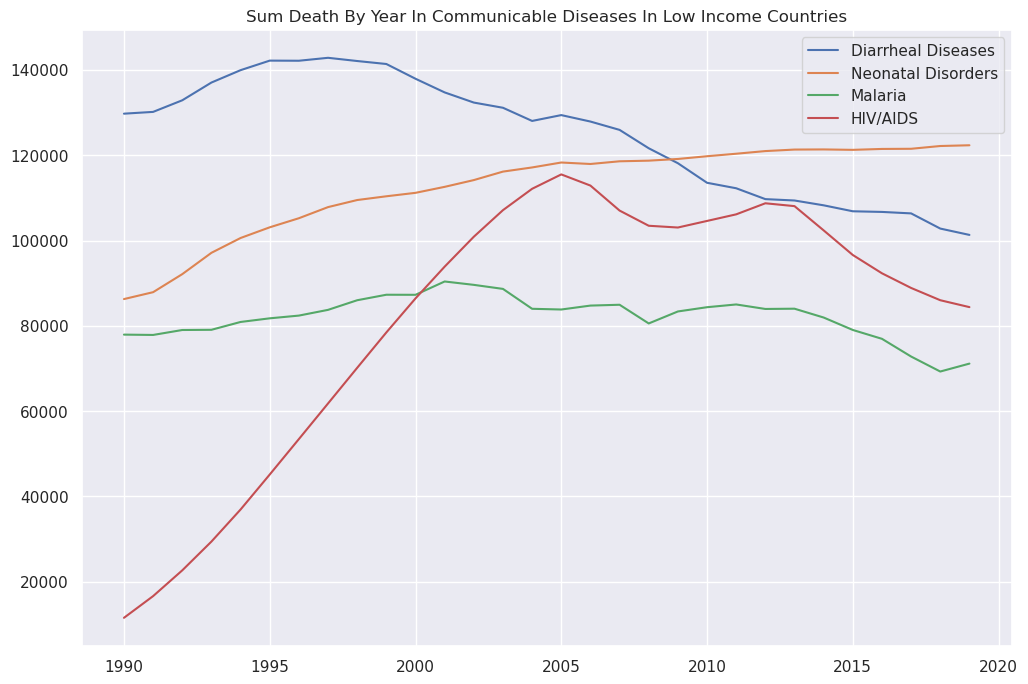

In [59]:
# Vẽ biểu đồ đường
plt.rcParams['figure.figsize'] = [12, 8]
x1 = x2 = x3 = x4 = sum_by_year_communicable_diseases_lc_countries_df['Year']
y1 = sum_by_year_communicable_diseases_lc_countries_df['Diarrheal Diseases']
y2 = sum_by_year_communicable_diseases_lc_countries_df['Neonatal Disorders']
y3 = sum_by_year_communicable_diseases_lc_countries_df['Malaria']
y4 = sum_by_year_communicable_diseases_lc_countries_df['HIV/AIDS']
plt.plot(x1, y1, x2, y2, x3, y3, x4, y4)
plt.legend(['Diarrheal Diseases', 'Neonatal Disorders', 'Malaria', 'HIV/AIDS'])
plt.title('Sum Death By Year In Communicable Diseases In Low Income Countries')
plt.show()

**Nhận xét**:

- Như biểu đồ ta thấy được nhìn chung, số ca tử vong do 4 bệnh truyền nhiễm ở các quốc gia có thu nhập thấp đang có xu hướng giảm dần, giống với xu hướng chung của thế giới. Đặt biệt, số ca tử vong do tiêu chảy giảm rất nhanh chóng. Đây là điều đáng mừng vì nó cho thấy tình trạng các quốc gia này đang được cải thiện theo chiều hướng tốt theo thời gian.
- Tuy nhiên, số ca tử vong do rối loạn sơ sinh (Neonatal Diseases) lại đang có xu hướng tăng lên. Điều này chứng tỏ rằng trẻ em (đặc biệt là trẻ sơ sinh) và phụ nữ mang thai ở những quốc gia này chưa được chăm sóc và bảo vệ đúng cách. Thế giới cần có những giải pháp hỗ trợ để tỉ lệ tử vong do rối loạn sơ sinh giảm xuống ở các quốc gia này.

# Câu 8: Liệu rằng chúng ta có thể xây dựng một mô hình dự đoán nào với bộ dữ liệu này hay không

Ý tưởng của nhóm chúng em rằng ta sẽ xây dựng mô hình dự đoán ca tử vong của một loại bệnh ở Việt Nam trong 5 năm sắp tới, với mỗi loại bệnh chúng ta sẽ xây dựng một mô hình dự đoán riêng, bỏ vào dictionary dạng "Tên bệnh" -> "Object dự đoán"

Mô hình dự đoán cơ bản nhất có lẽ sẽ là hồi quy tuyến tính ( Linear Regression )

### Tiền xử lý dữ liệu

Đầu tiên rằng ta sẽ cần phải tách X,Y ra, thực chất rằng X ở đây chính là số năm trải dài từ 1990 - 2019

In [60]:
##Chúng ta sẽ lấy lại dataframe nguyên nhân gây tử vong của đất nước Việt Nam
vietnamese_death_df = cause_of_deaths_df[cause_of_deaths_df['Country/Territory']=='Vietnam'].reset_index(drop=True)
##Ở đây y sẽ luôn là cột tương ứng trong dataframe

### Xây dựng mô hình hồi quy tuyến tính với các loại bệnh tương ứng

Ta đã có biến names_cause chứa tên các loại bệnh, ta sẽ tái sử dụng biến này để duyệt qua từng loại bệnh

Trước tiên ta cần phải import thư viện tương ứng vào

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [62]:

def getPredictObject_linearRegression(X_train, Y_train):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,Y_train)
    return lin_reg

linear_regression_vietnam = {}

#Chuẩn hóa lại cột X, tương ứng với 1990 -> 0, 1991 ->1 và tương ứng
min_year = 1990
linear_regression_x = vietnamese_death_df[['Year']]
linear_regression_x = linear_regression_x - min_year
##Lưu Y_valid
Y_valid_dict = {}
#Lưu X_valid
X_valid_dict = {}

for name in names_cause:
    Y = vietnamese_death_df[[name]]
    X_train, X_valid, Y_train, Y_valid = train_test_split(linear_regression_x,Y,train_size = 0.8,test_size = 0.2, random_state = 0)
    predict_object = getPredictObject_linearRegression(X_train,Y_train)
    linear_regression_vietnam[name] = predict_object
    Y_valid_dict[name] = Y_valid
    X_valid_dict[name] = X_valid
    

    

In [63]:
##Bây giờ chúng ta sẽ làm thêm một dictionary để tạo dataframe so sánh các predict với bộ dữ liệu hiện tại
##Mục đích là để so sánh
predict_df_dict = {}
def normalizeYear(year):
    return year - min_year
def denormalizeYear(year):
    return year+min_year


for name in names_cause:
    ##Lấy Y_valid đã lưu
    Y_valid = Y_valid_dict[name]
    X_valid = X_valid_dict[name]
    model = linear_regression_vietnam[name]
    Y_predict = np.array(model.predict(X_valid)).flatten()
    Year_valid = denormalizeYear(X_valid)
    Year_valid = np.array(Year_valid).flatten()
    Y_valid = np.array(Y_valid).flatten()
    data_dict = {"Real Total Death":Y_valid,"Predict Total Death":Y_predict}
    predict_df = pd.DataFrame(data_dict, index = Year_valid)
    predict_df_dict[name] = predict_df
    

/home/sky/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 10000x10000 with 0 Axes>

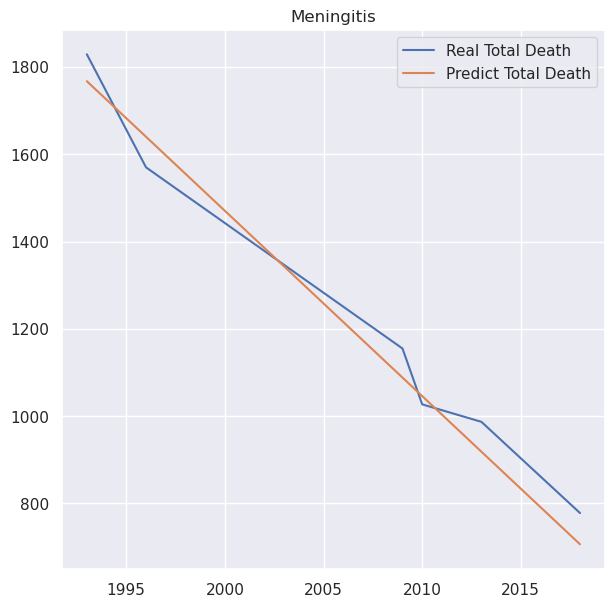

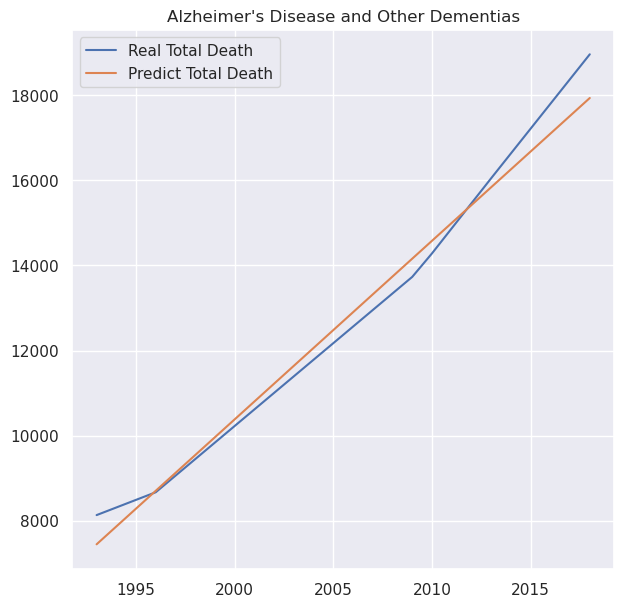

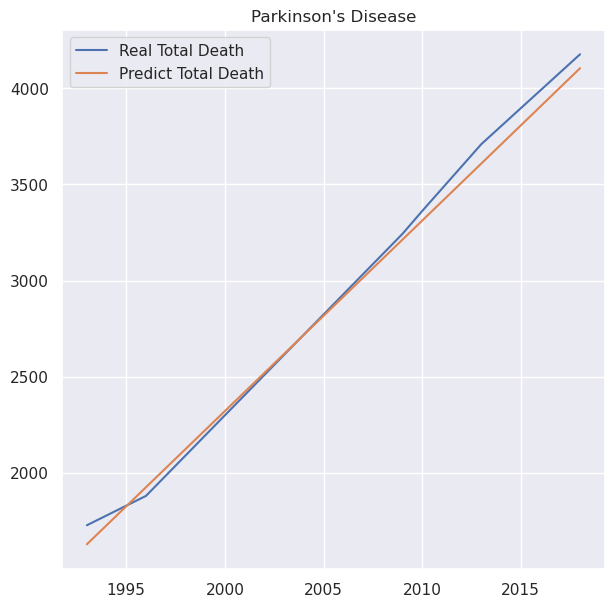

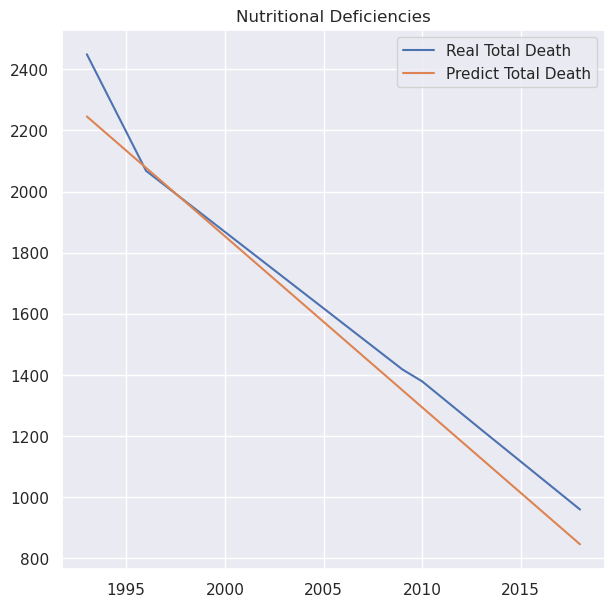

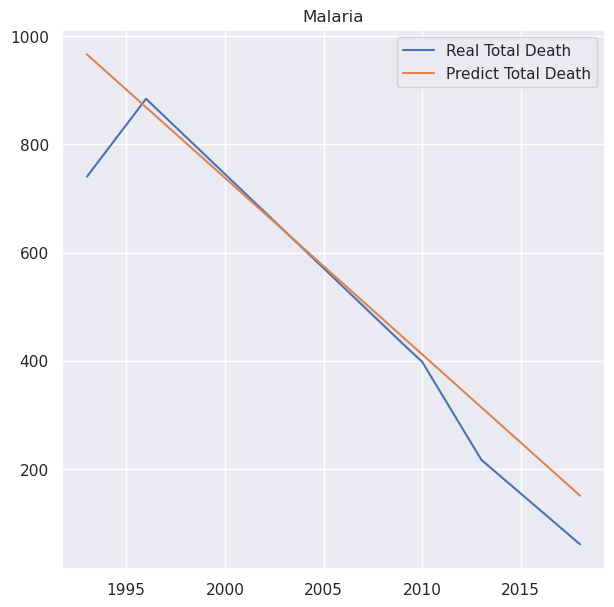

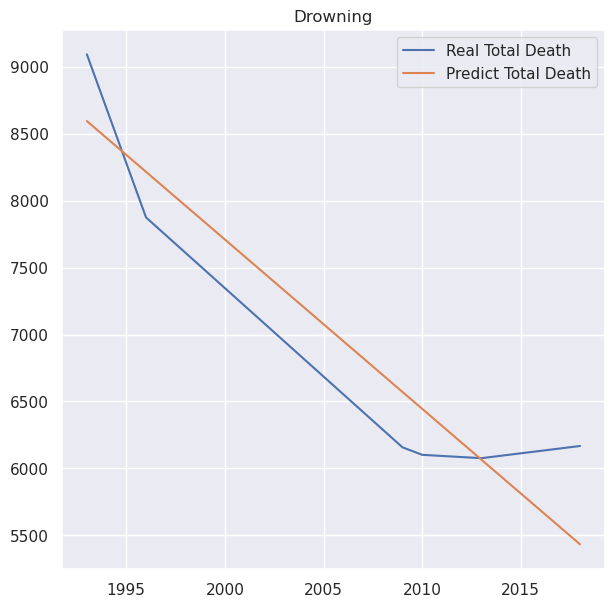

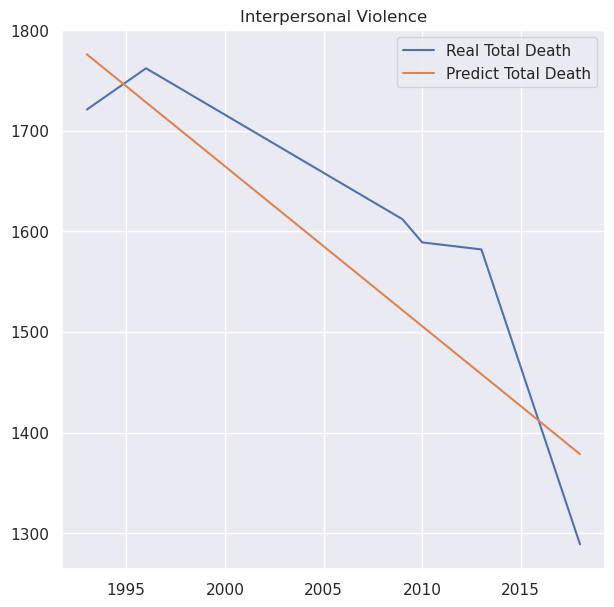

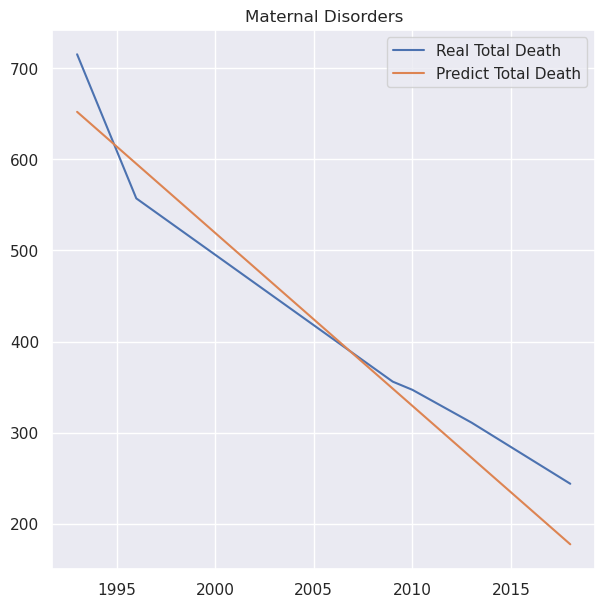

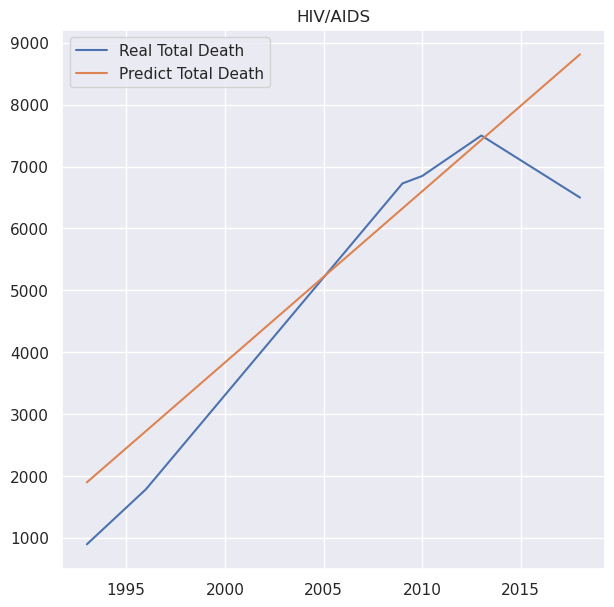

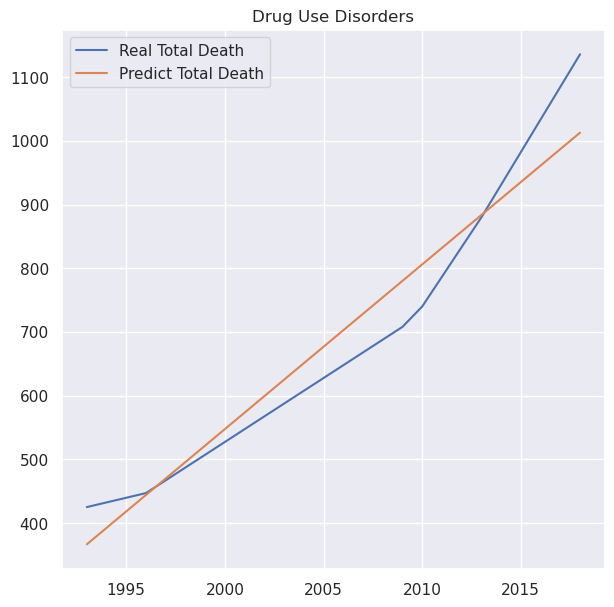

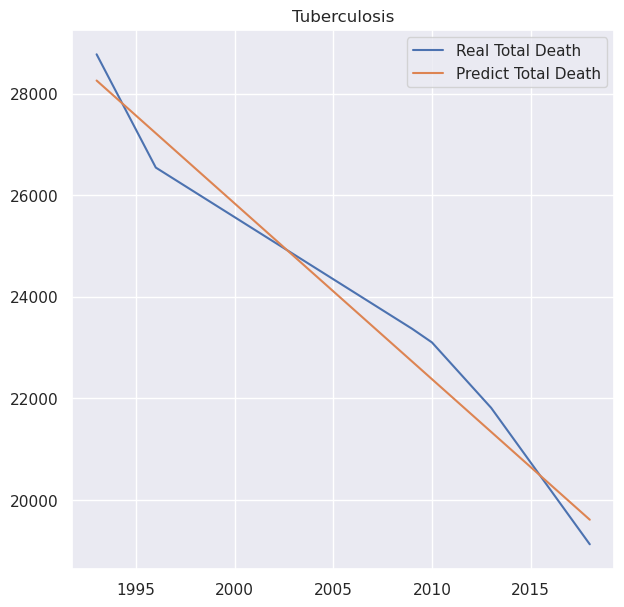

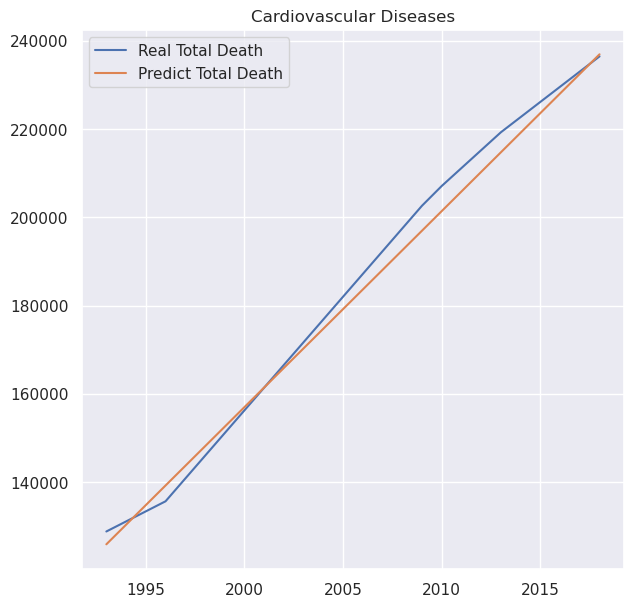

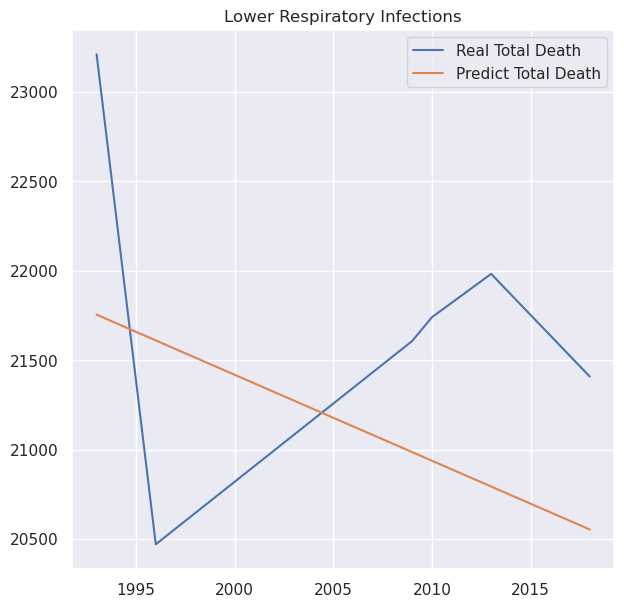

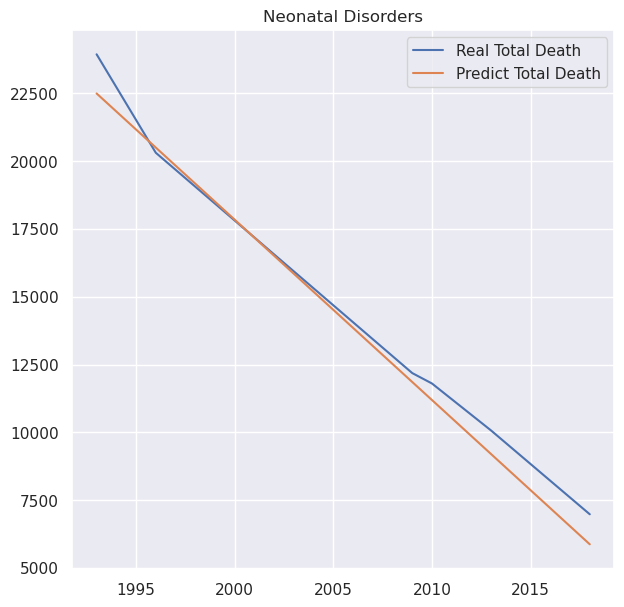

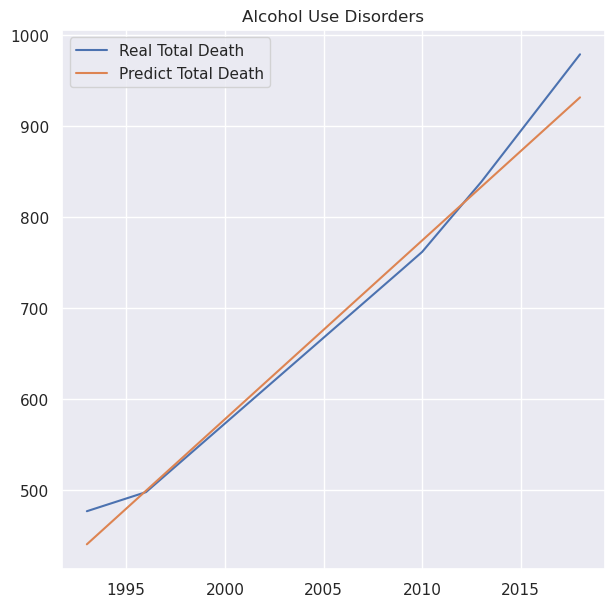

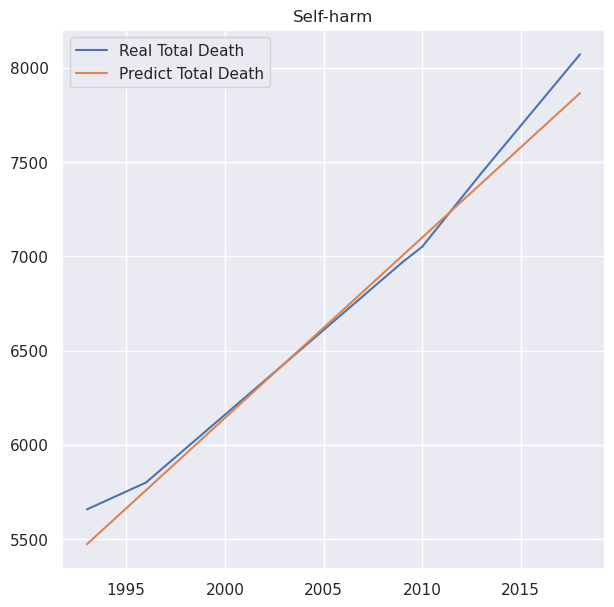

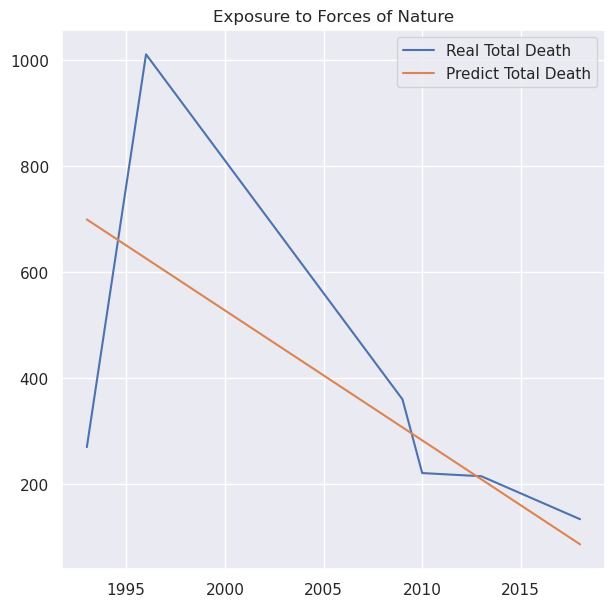

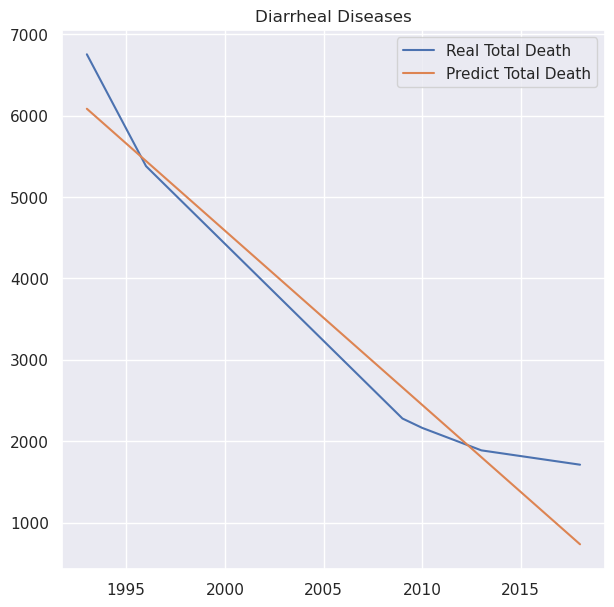

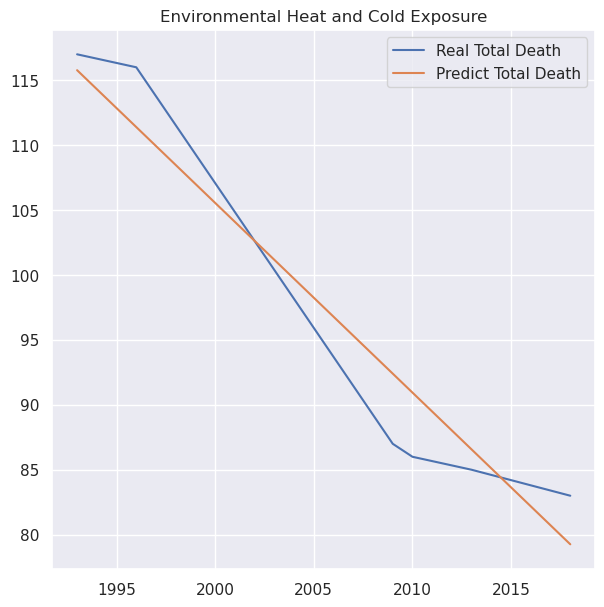

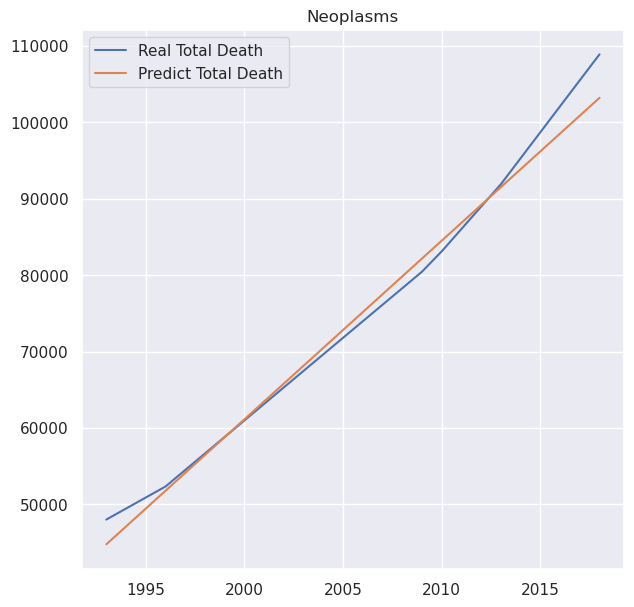

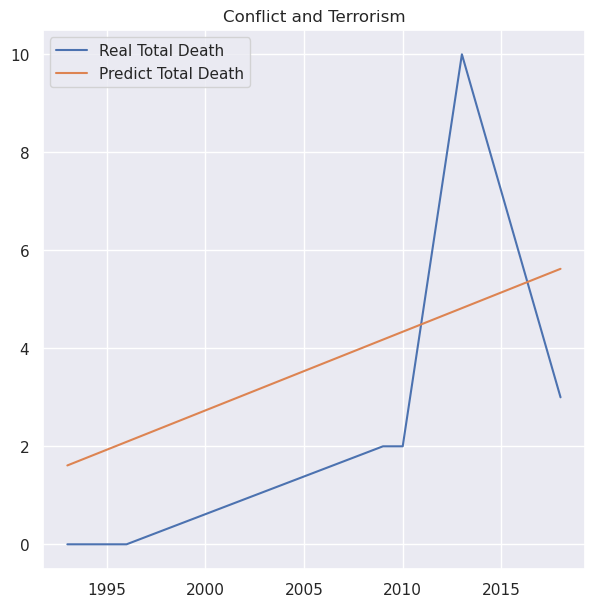

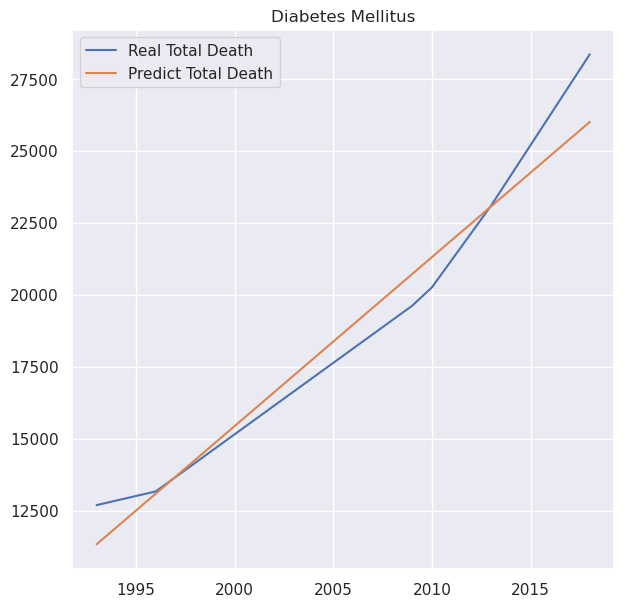

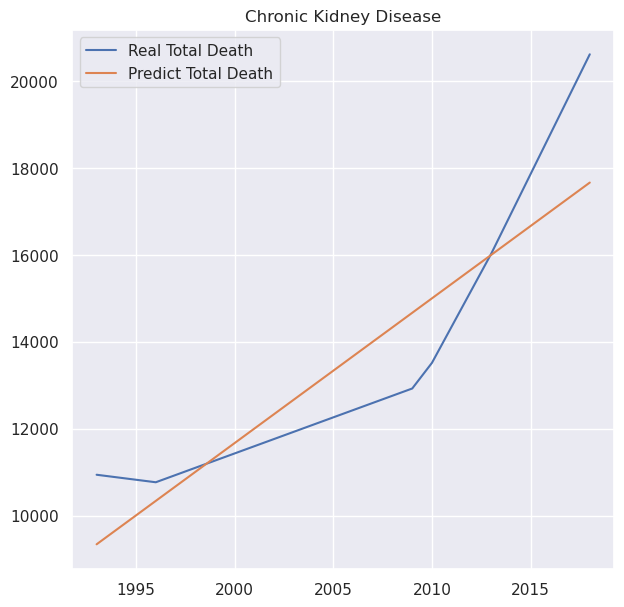

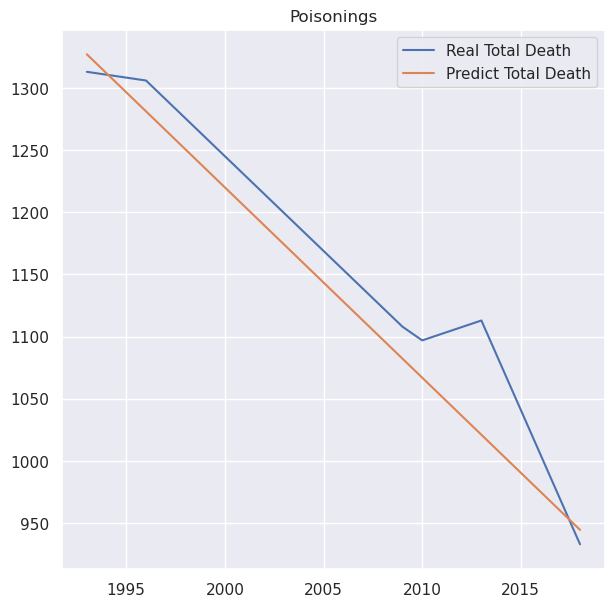

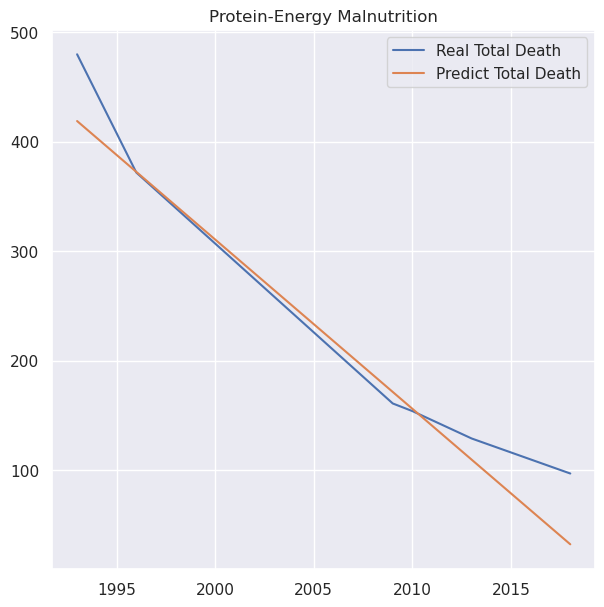

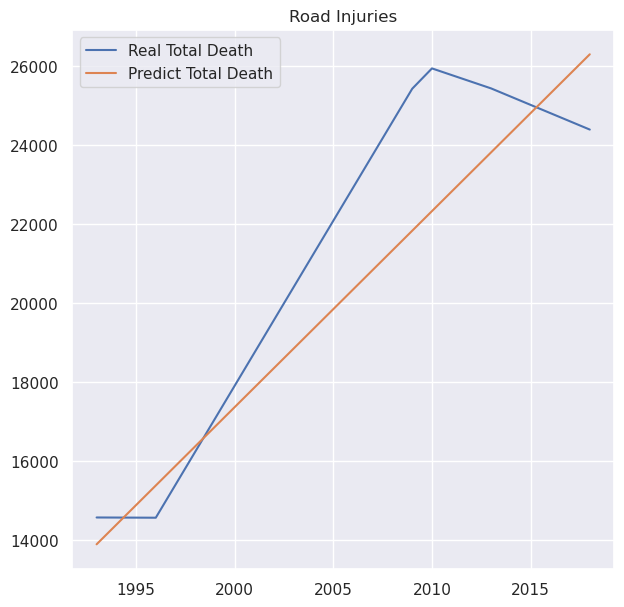

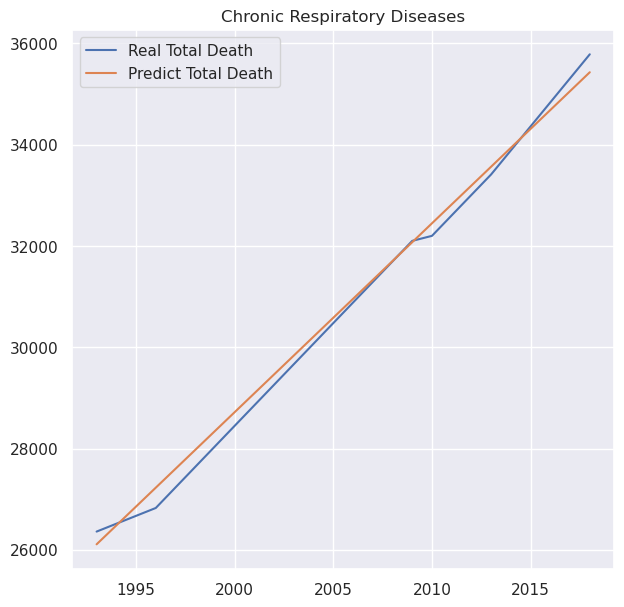

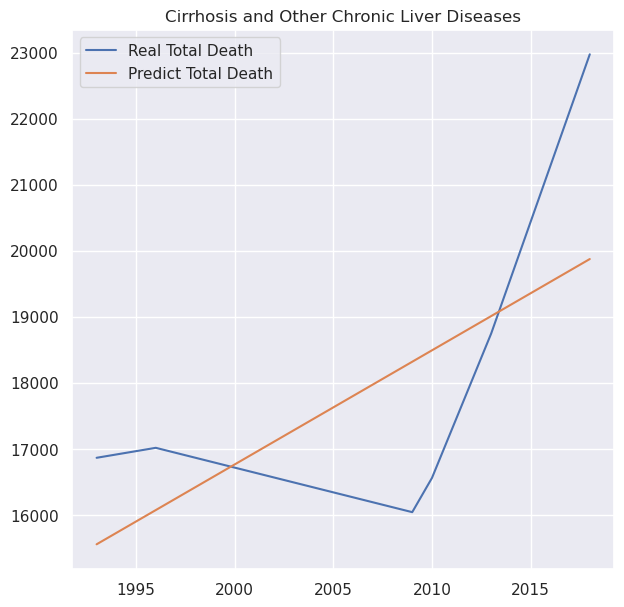

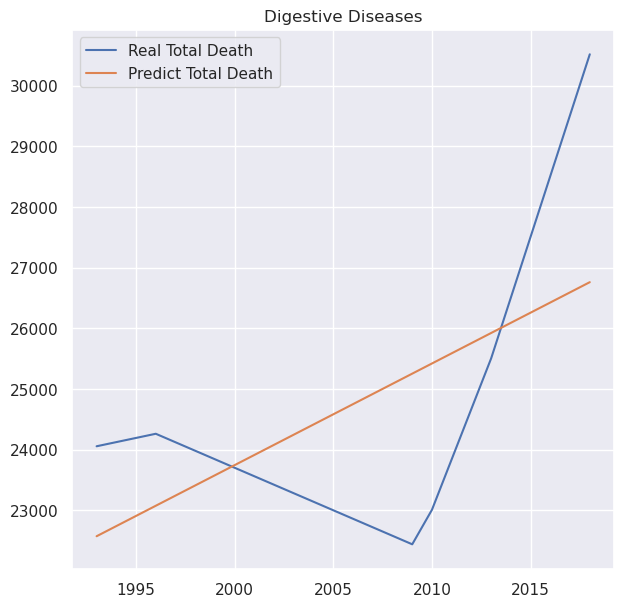

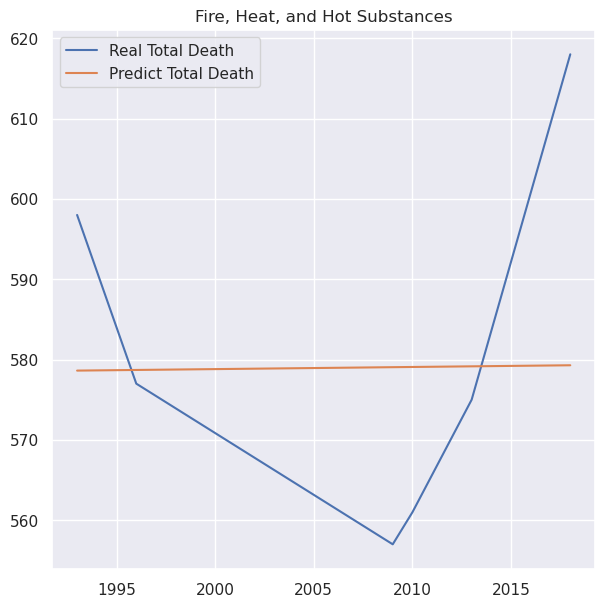

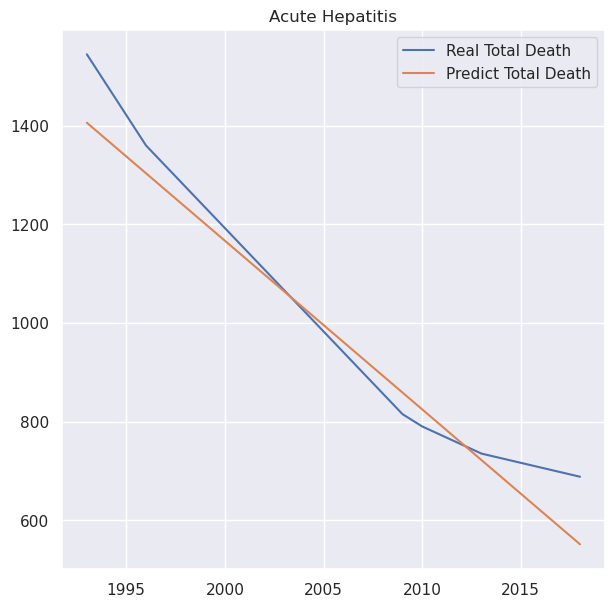

In [64]:
##Visualize 

all_df = pd.DataFrame()
fig = plt.figure(figsize= (100,100))

for name in names_cause:
    predict_df_dict[name].sort_index().plot(figsize = (7,7), title = name)

In [65]:
## Dự đoán số lượng các loại bệnh trong 5 năm sắp tới tính từ năm 2022

year_next = np.array([[2023],[2024],[2025],[2026],[2027]])
#boardcasting để
year_next = year_next - min_year

##Tạo dataFrame với index là các năm và số lượng dự đoán

predict_future_df = {}
for name in names_cause:
    model = linear_regression_vietnam[name]
    Y_predict = model.predict(year_next)
    ##Chuan hoa Y_predict
    Y_predict = np.array(Y_predict).flatten()
    year_next_normalize = np.array(year_next).flatten() + min_year
    df = {"Predict" : Y_predict}
    predict_future_df[name] = pd.DataFrame(df, index = year_next_normalize)
    
##Bây giờ chúng ta sẽ gắn các df này vào các df dữ liệu thực tế gốc để so sánh rằng liệu các bệnh dự đoán được có hợp lý hay không

for name in names_cause:
    ##Giả sử dữ liệu từ trước là predict ( dùng tà thuật đổi tên cột ) nhưng gán vào một df khác
    predict_df_dict_fake = (predict_df_dict[name][['Real Total Death']]).rename(columns = {'Real Total Death' : 'Predict'
                                                                                          })    
    
    predict_future_df[name] = predict_future_df[name].append(predict_df_dict_fake)

    
##Kiểm tra với lại một nguyên nhân nào đó
predict_future_df['Neoplasms']

Predict
2023  114896.742975
2024  117234.442167
2025  119572.141359
2026  121909.840550
2027  124247.539742
2009   80447.000000
2018  108902.000000
1996   52334.000000
1993   48007.000000
2013   91901.000000
2010   83110.000000

/home/sky/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


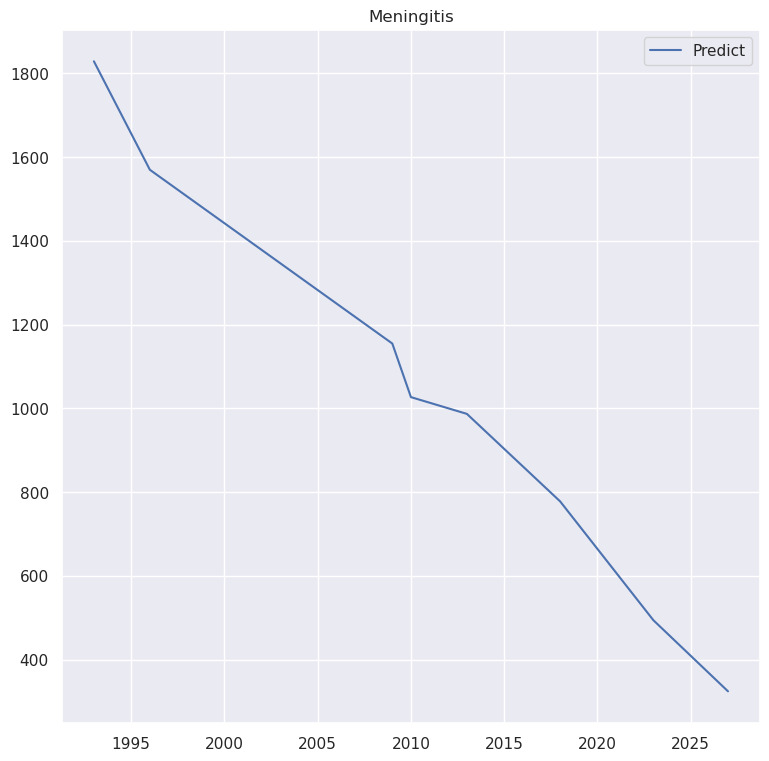

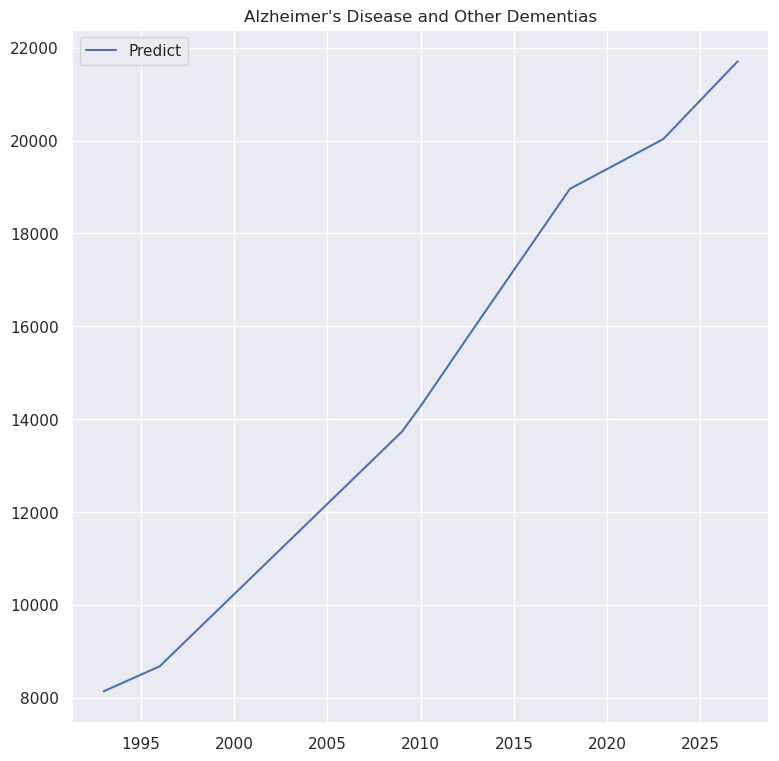

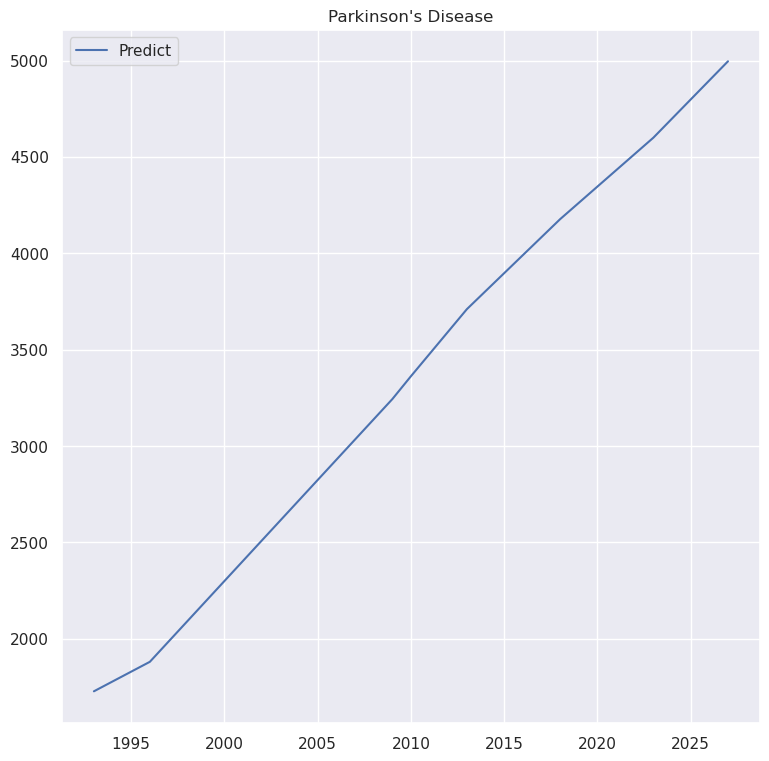

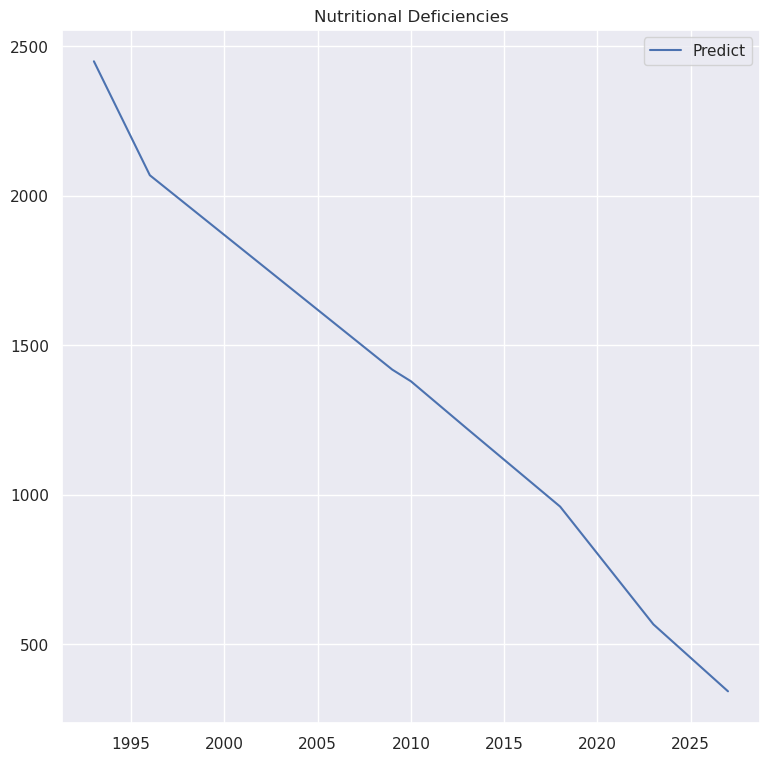

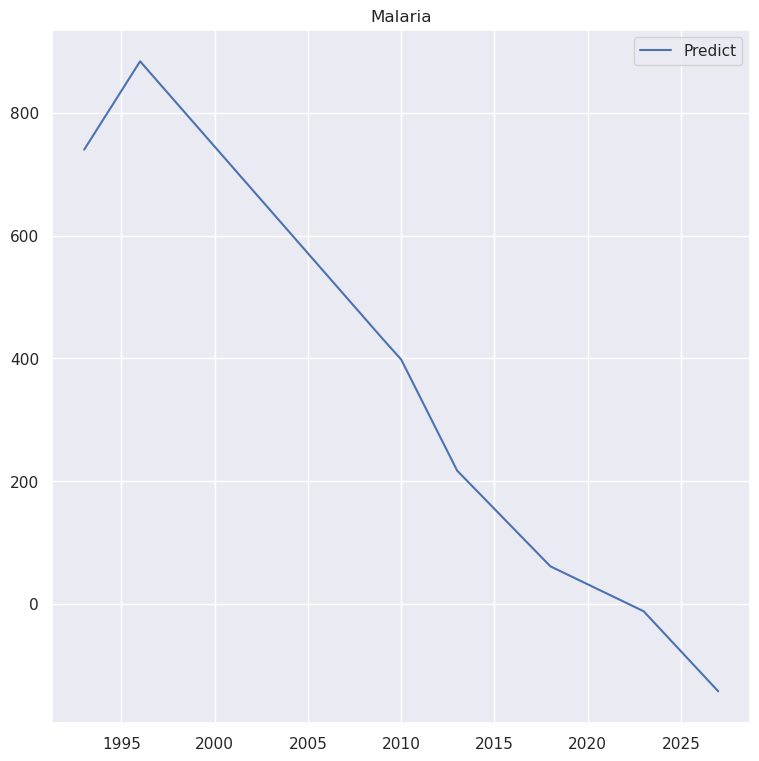

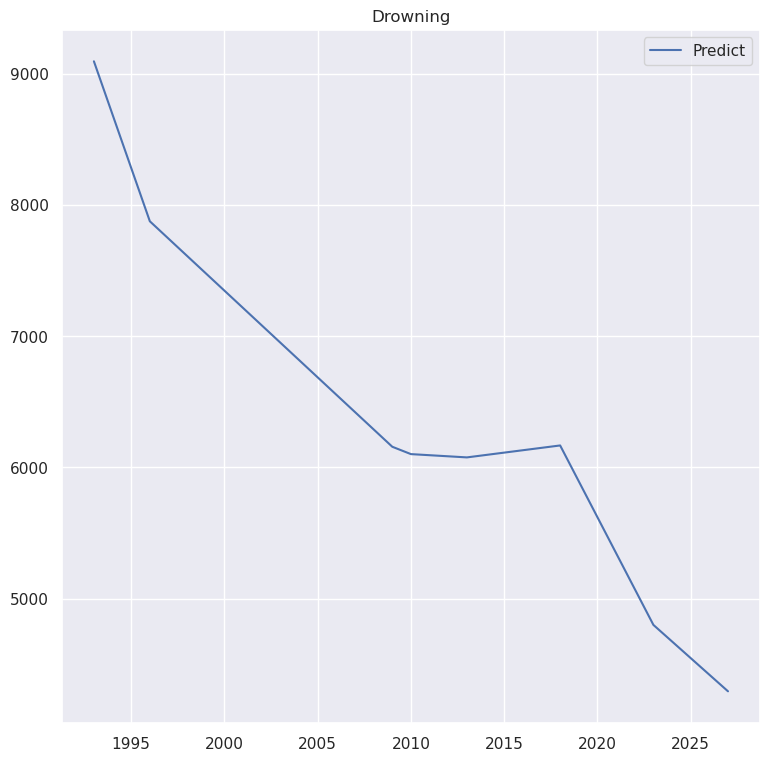

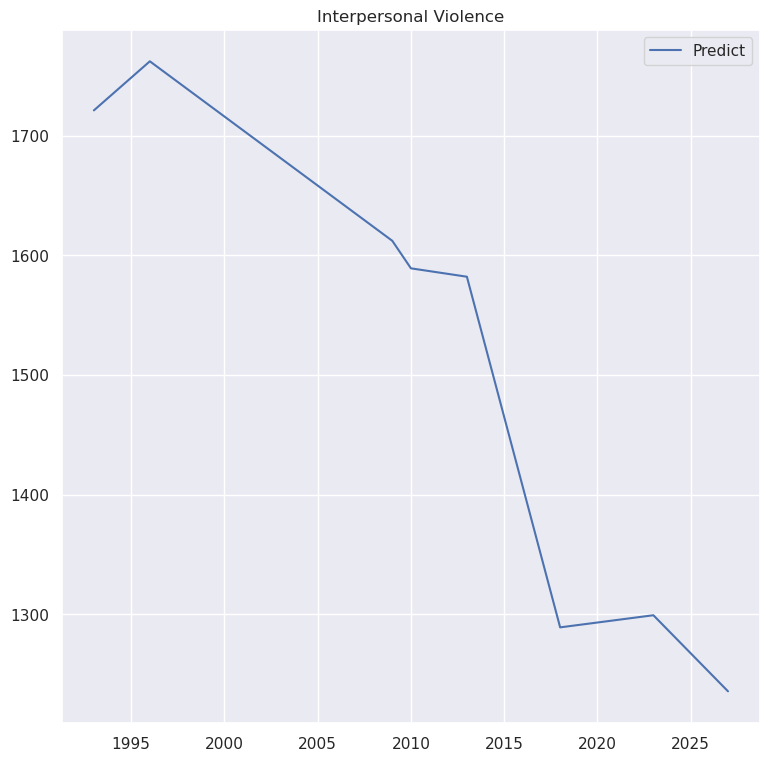

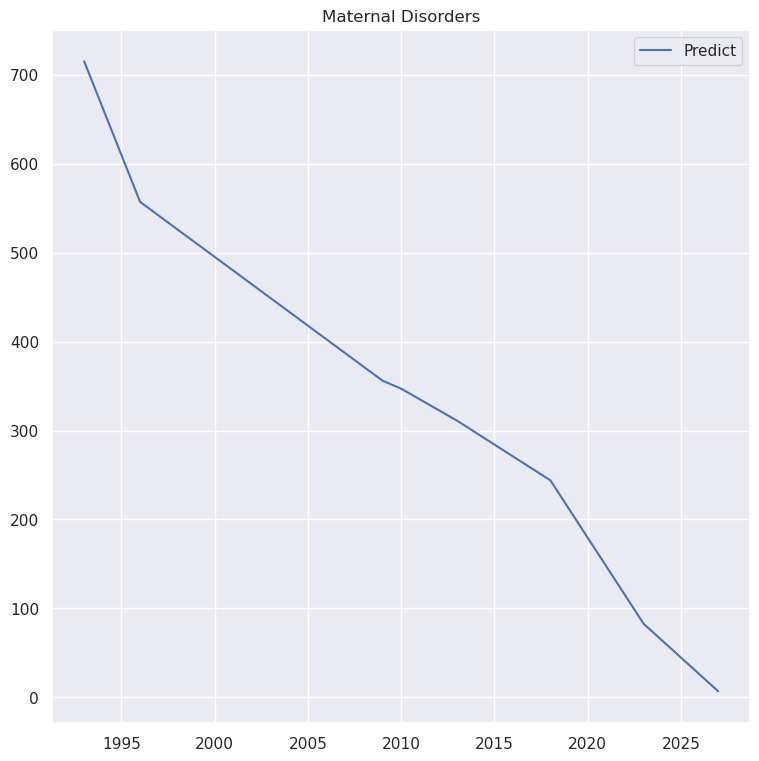

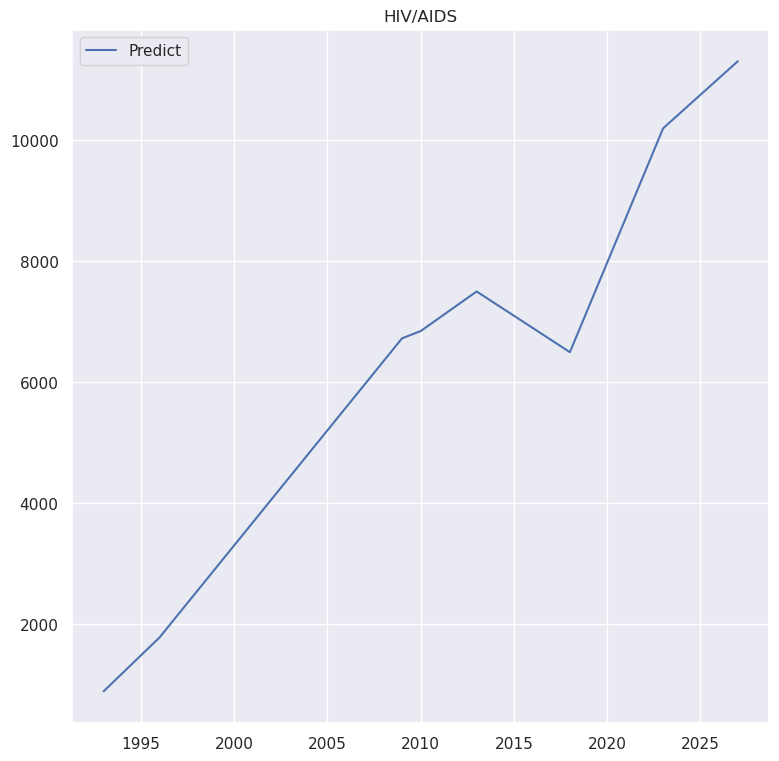

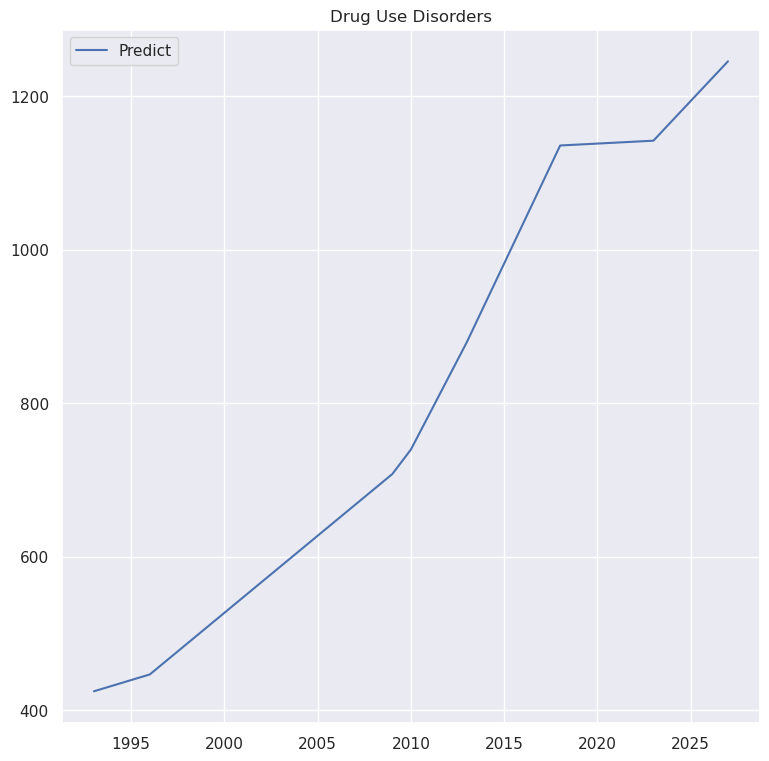

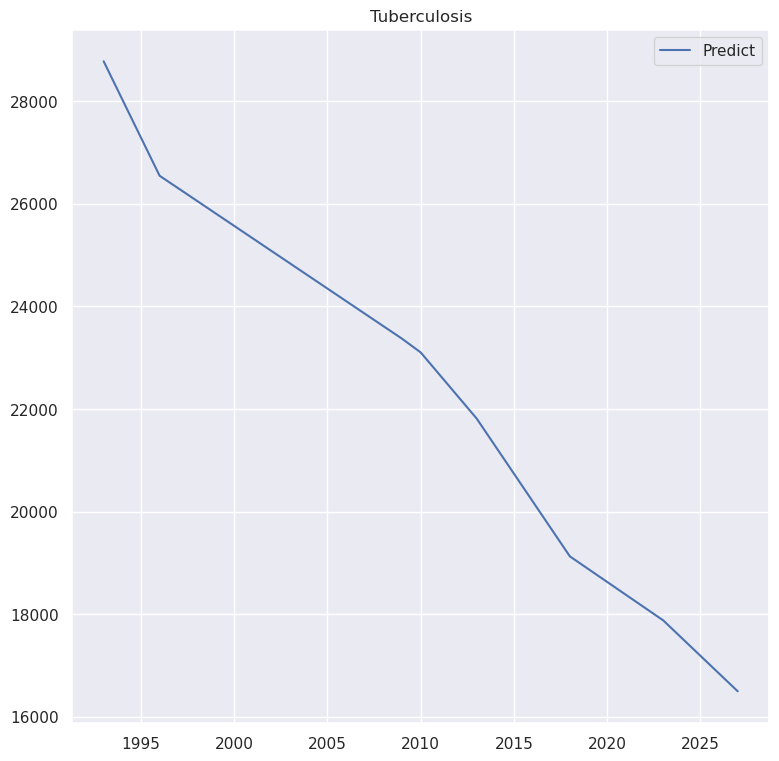

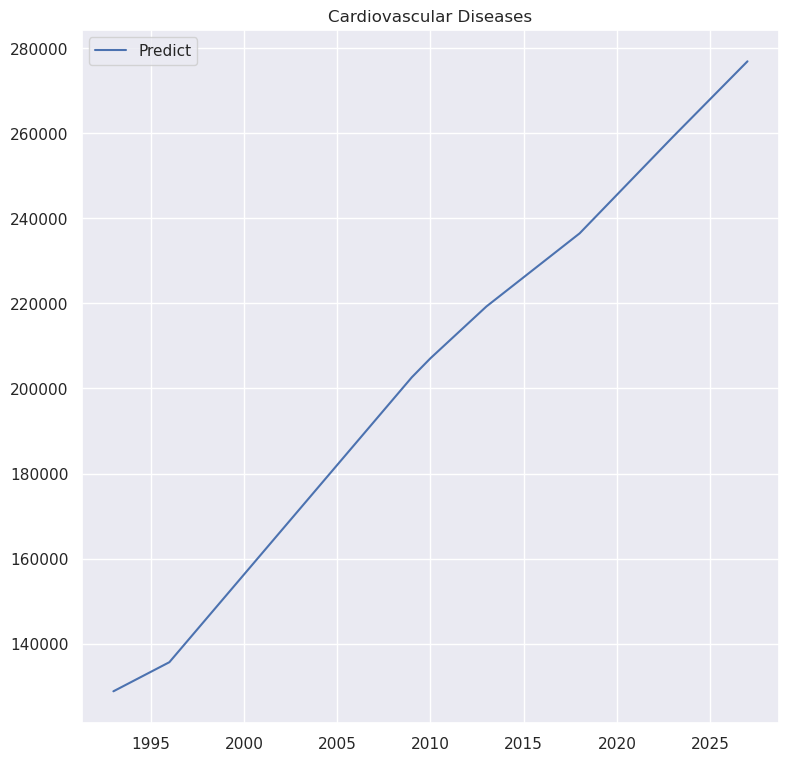

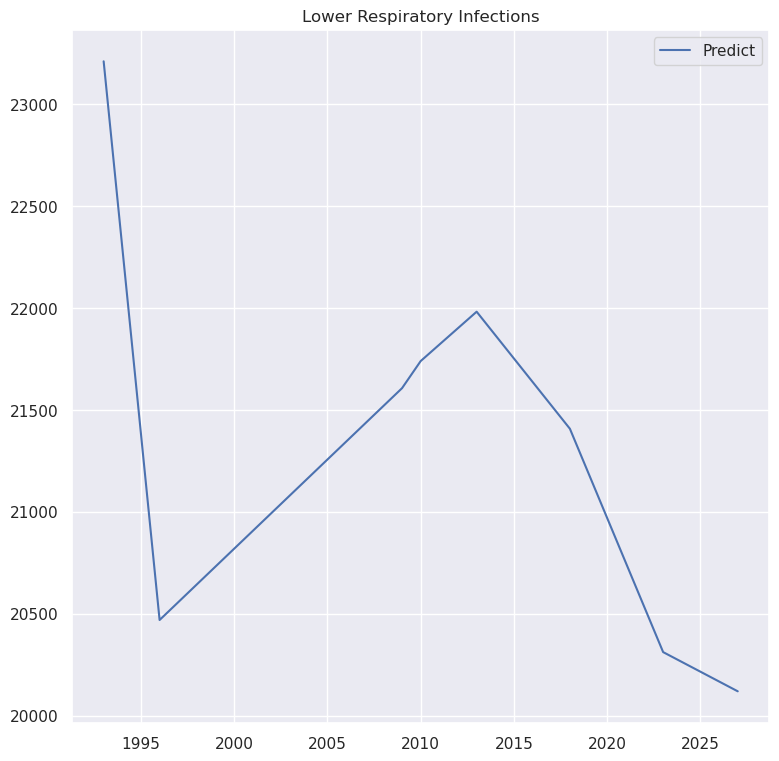

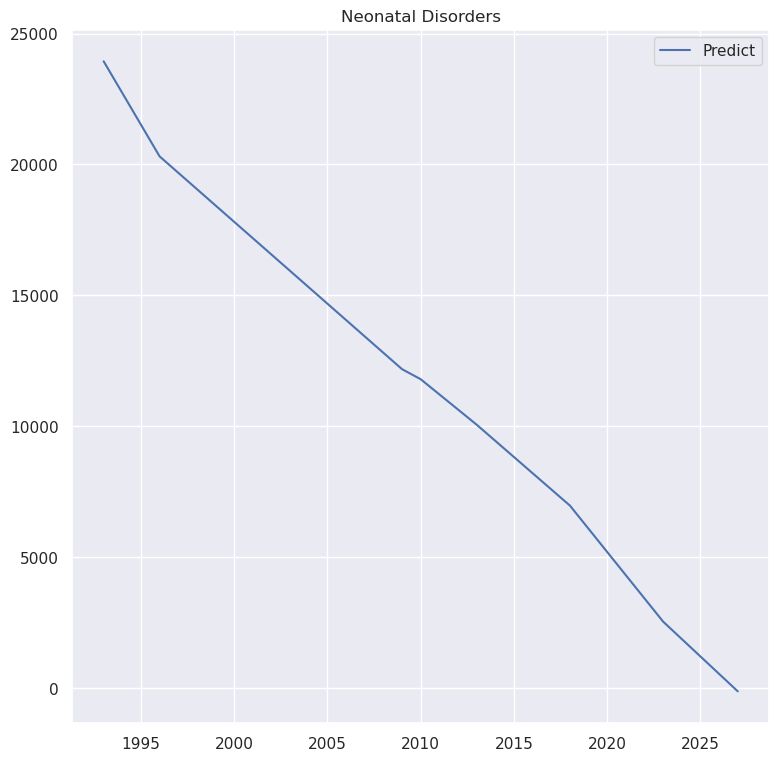

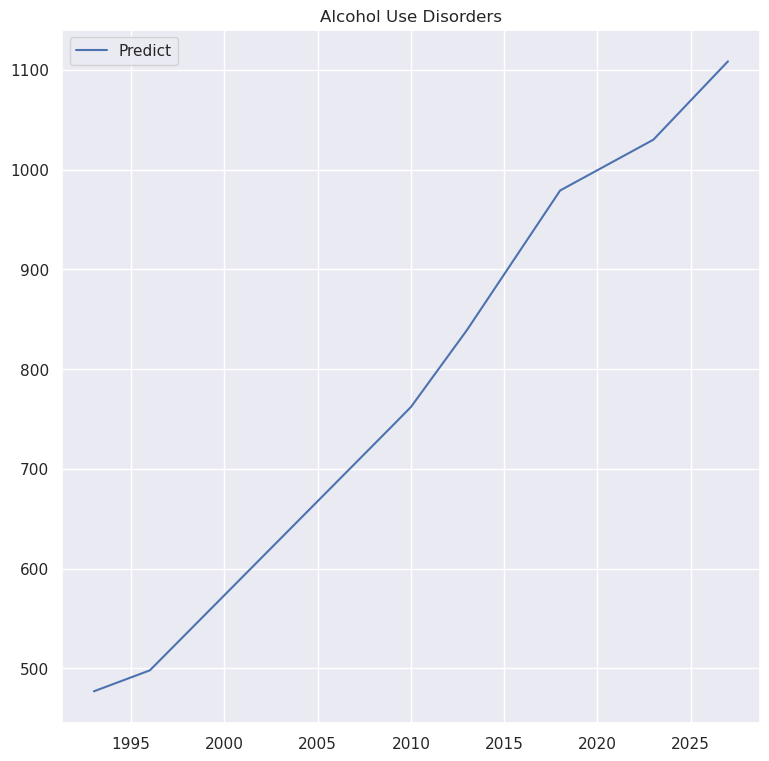

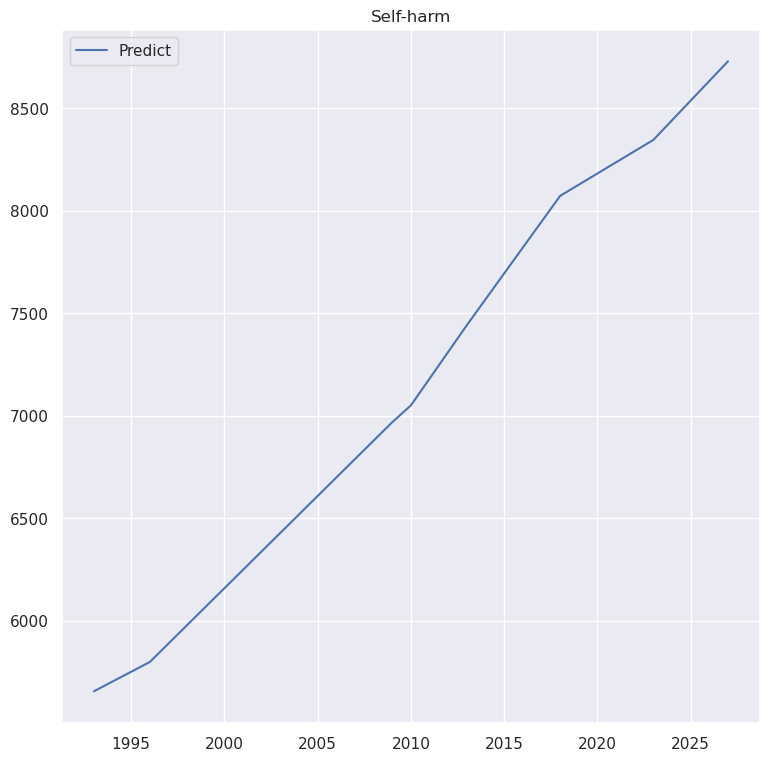

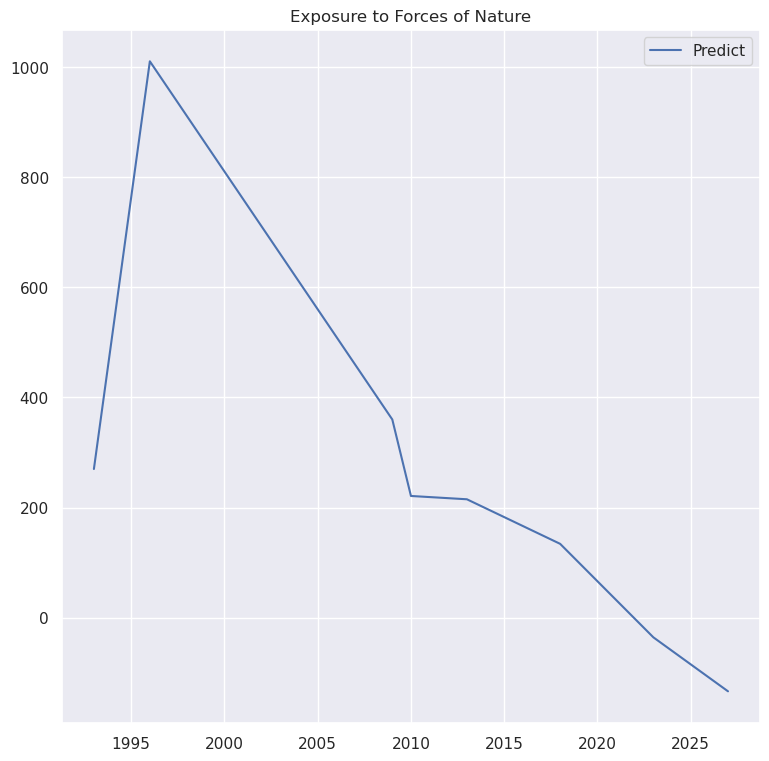

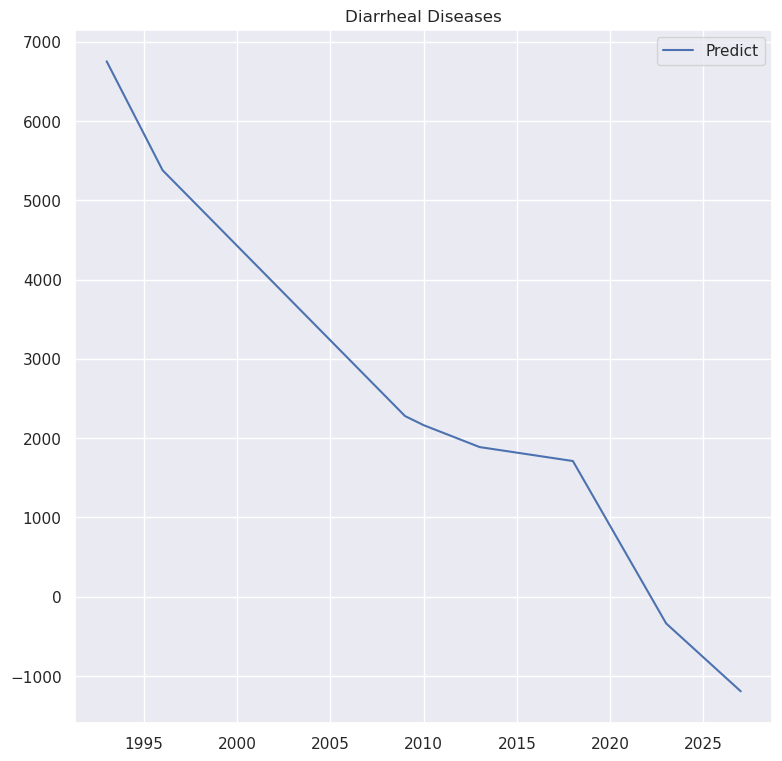

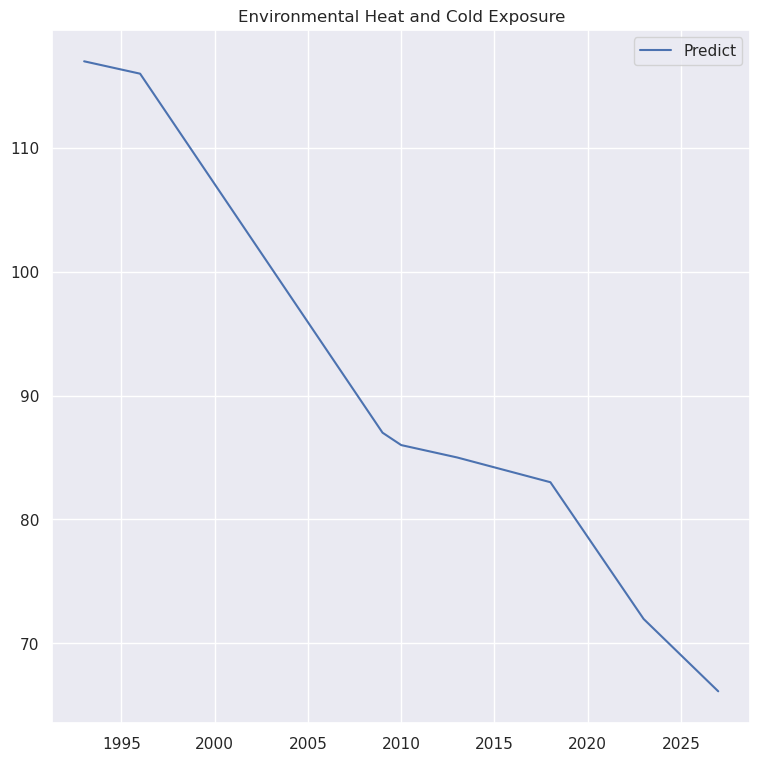

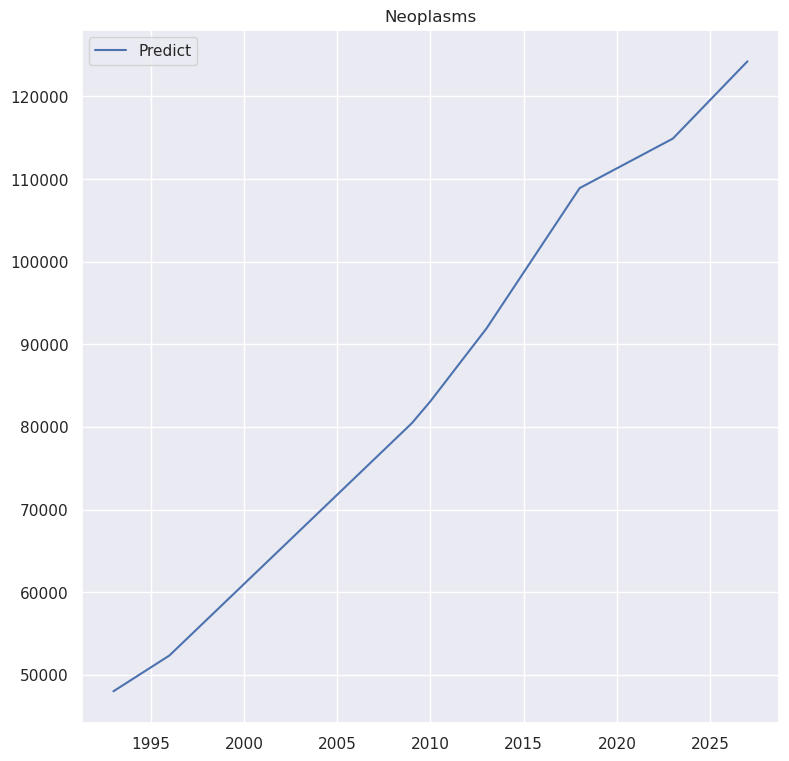

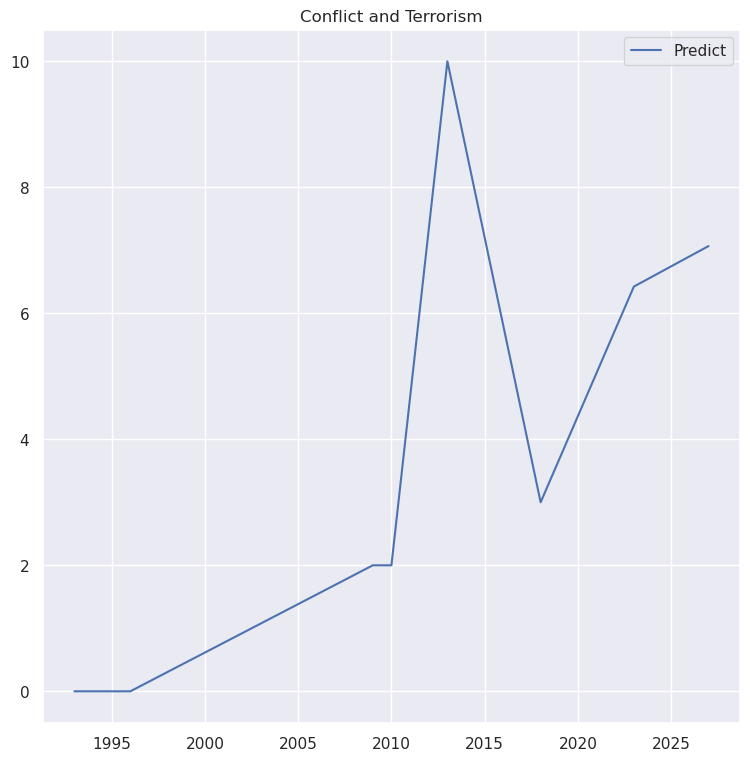

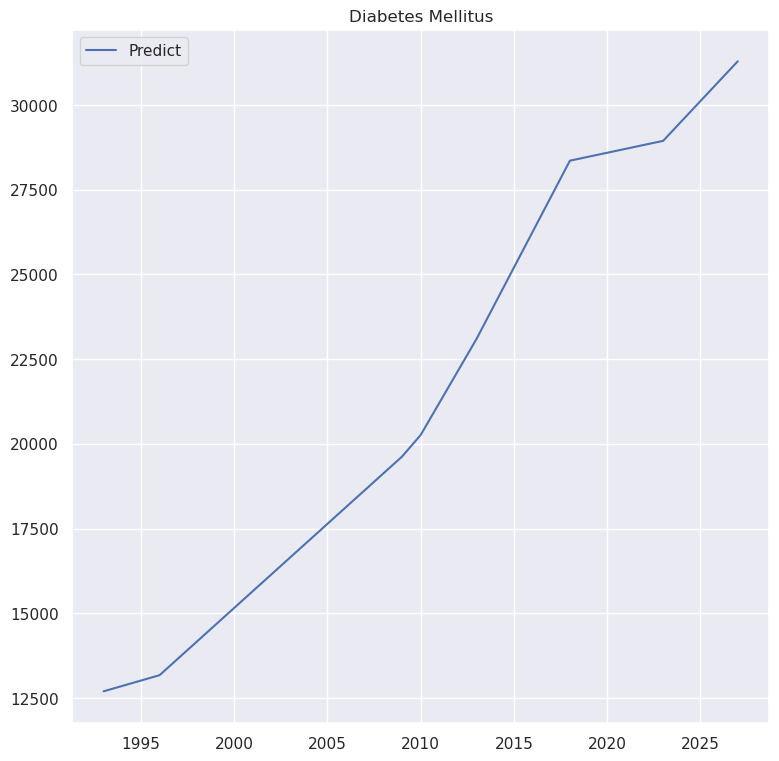

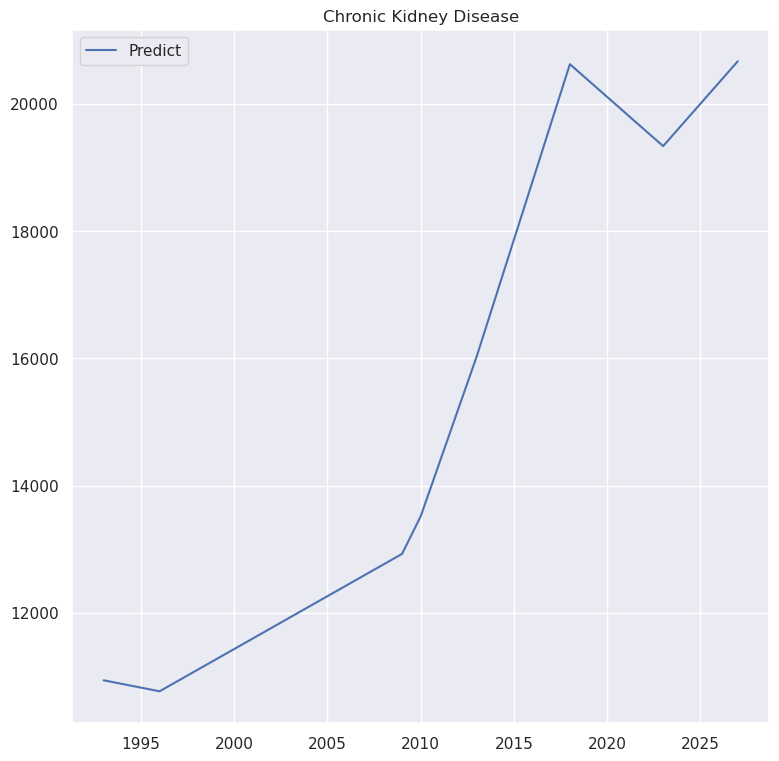

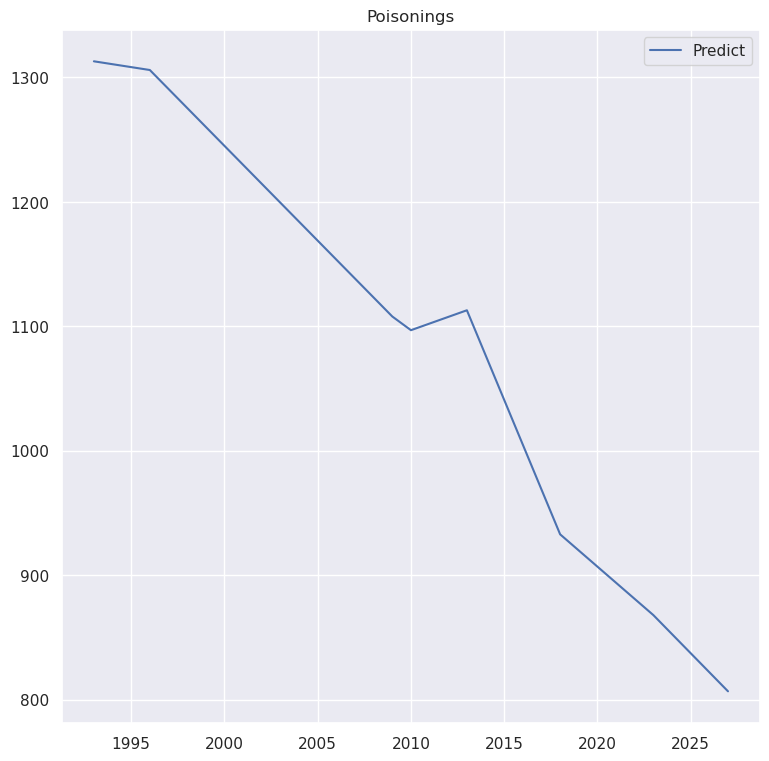

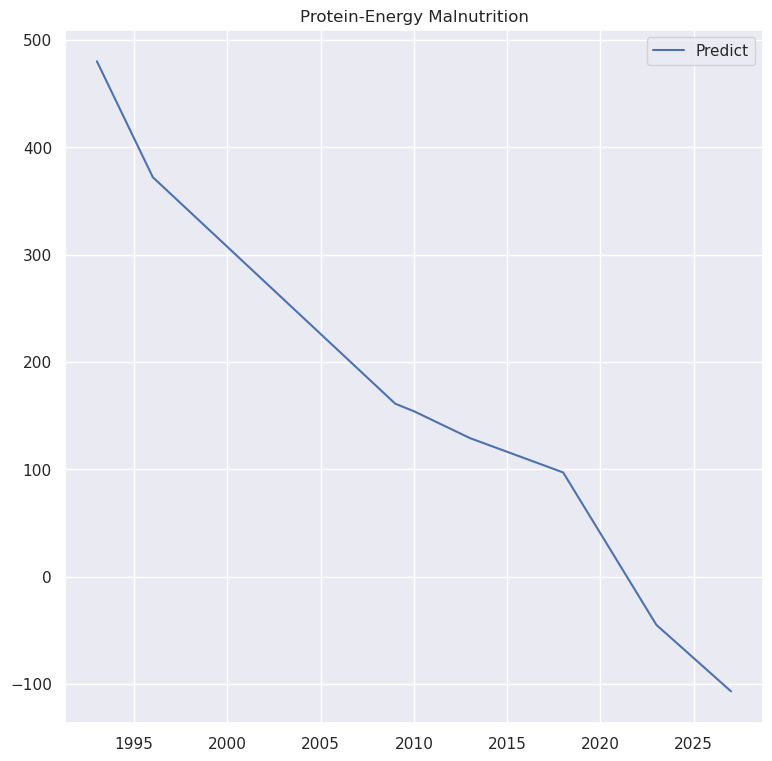

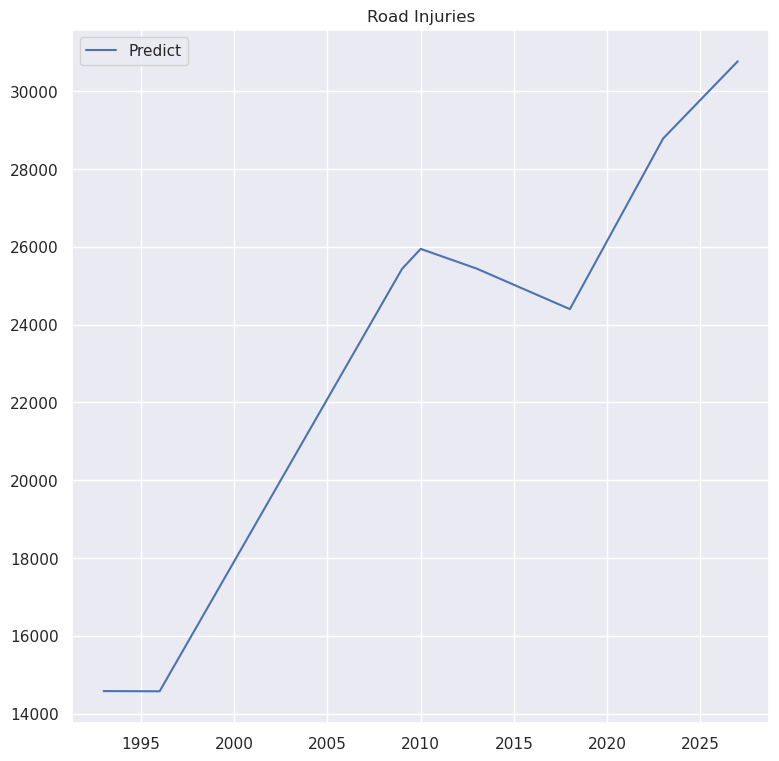

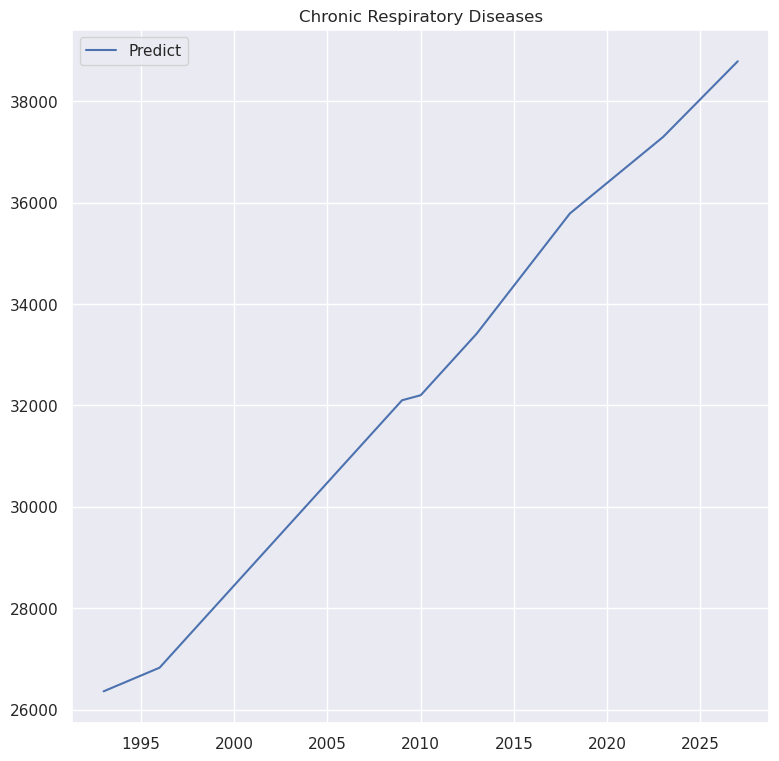

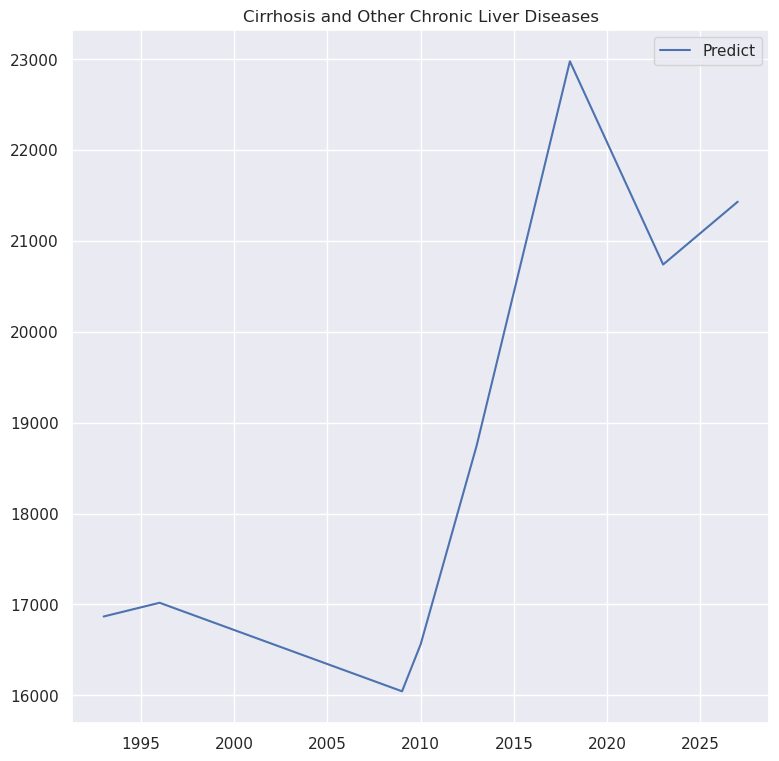

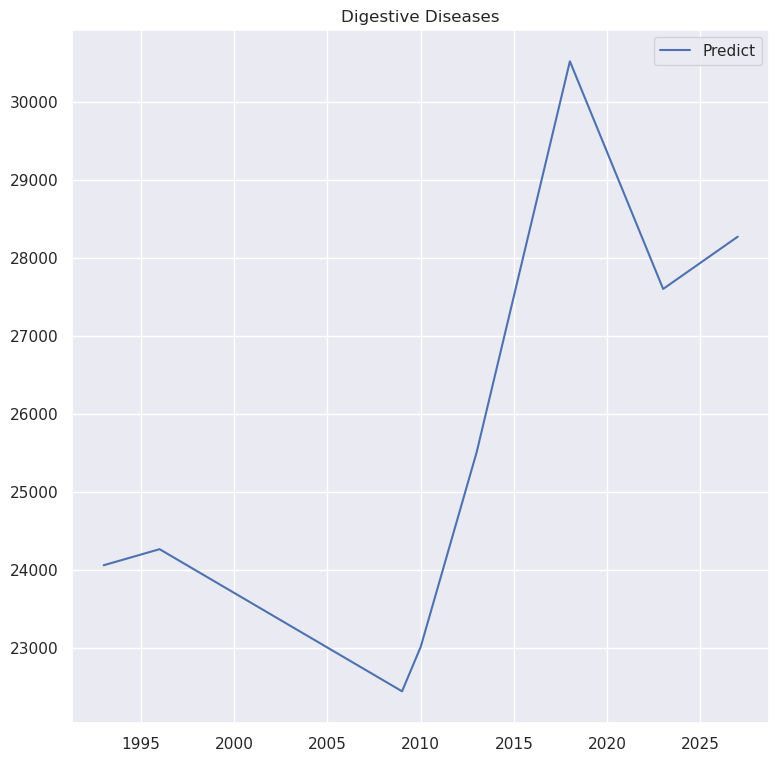

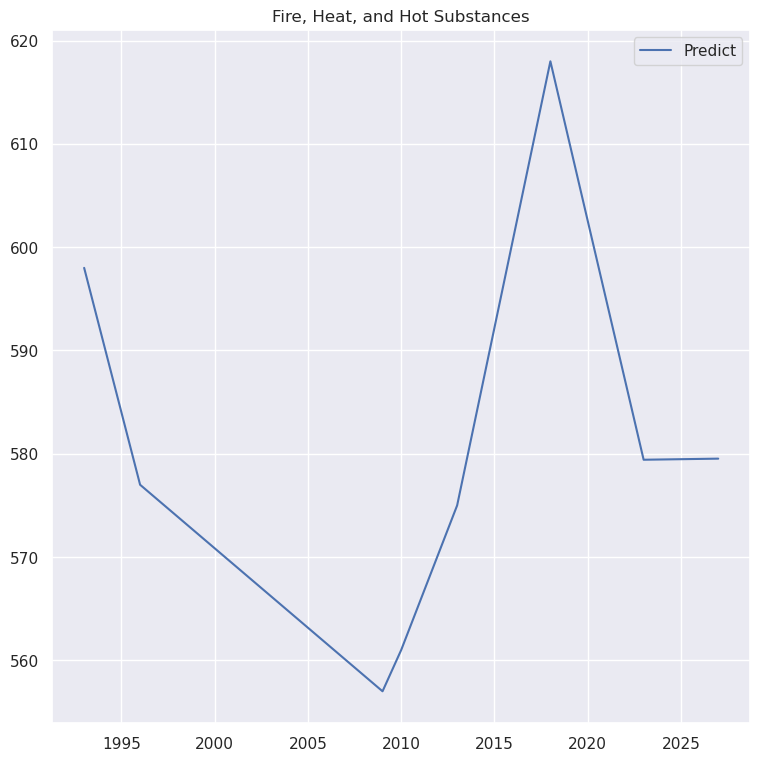

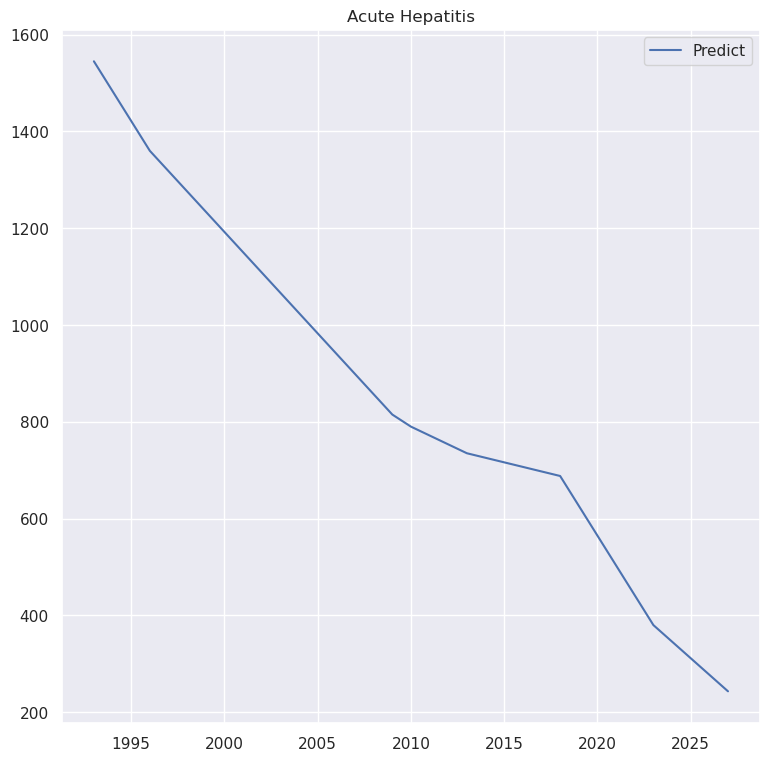

In [66]:
##Data visualize xem dự đoán có hợp lý không ?

for name in names_cause:
    predict_future_df[name].sort_index().plot(figsize = (9,9), title = name)

Sau khi mà chúng ta ghép dữ liệu từ trước với lại dữ liệu dự đoán ( ta tạm coi dữ liệu thực tế ở trong cột Predict là từ năm 2019 trở xuống, vì nhóm chúng em đổi tên để dễ xử lý) thì các hàm số luôn có xu hướng đi đúng với dự đoán của nó, tuy nhiên rằng phương pháp hồi quy tuyến tính sử dụng giải thuật Bình Phương Tối Tiểu, vì thế rằng các dự đoán từ sau trở đi chỉ đi theo một xu hướng nhất định ( Phương pháp này luôn cho ra một hàm số theo một hàm tuyến tính y = ax + b). Vì thế rằng việc sử dụng phương pháp này để dự đoán thì sẽ không cho ra kết quả quá là thực tế ( tức là các điểm sẽ nằm rộng hơn) Vì thế rằng ta sẽ sử dụng một model có phổ rộng hơn, đó là Decision Tree

## Decision Tree

Sau khi đã phân tích dự đoán bằng mô hình hồi quy tuyến tính theo bình phương tối tiểu, ta sẽ thử với một thuật toán, mô hình khác hơn đó là Cây Quyết Định Hồi Quy

Ta cần import thư viện vô

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
##Với mỗi loại nguyên nhân ta cần một model tương ứng



decisionTree_regression_vietnam = {}
#Chuẩn hóa lại cột X, tương ứng với 1990 -> 0, 1991 ->1 và tương ứng
min_year = 1990
decisionTree_regression_x = vietnamese_death_df[['Year']]
decisionTree_regression_x = decisionTree_regression_x - min_year
##Lưu Y_valid
Y_valid_dict = {}
#Lưu X_valid
X_valid_dict = {}


for name in names_cause:
    Y = vietnamese_death_df[[name]]
    X_train,X_valid, Y_train, Y_valid = train_test_split(decisionTree_regression_x,Y,train_size = 0.8,test_size = 0.2,random_state = 0)
    model = DecisionTreeRegressor(random_state = 0)
    model.fit(X_train,Y_train)
    decisionTree_regression_vietnam[name] = model
    X_valid_dict[name] = X_valid
    Y_valid_dict[name] = Y_valid

/home/sky/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


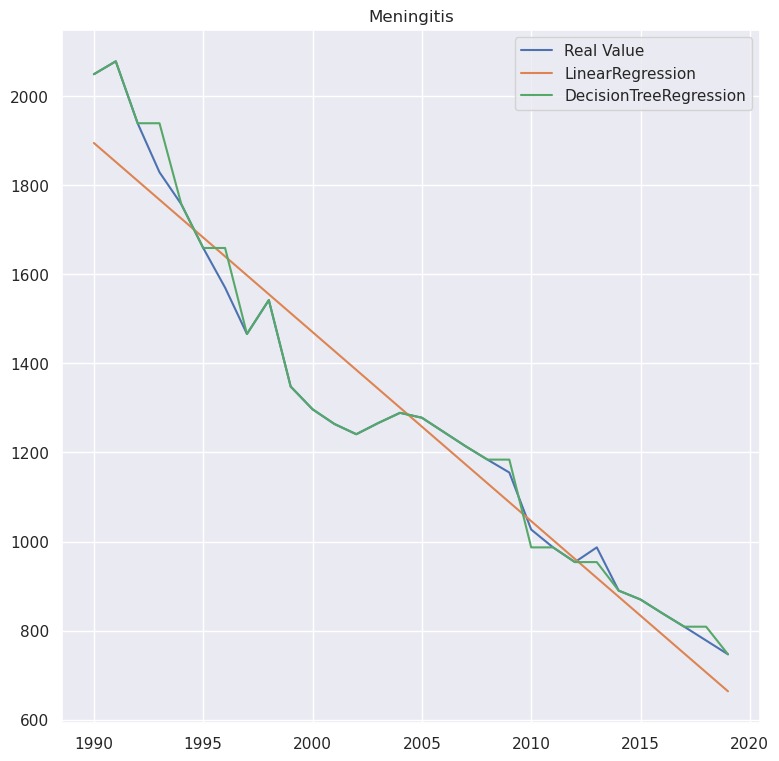

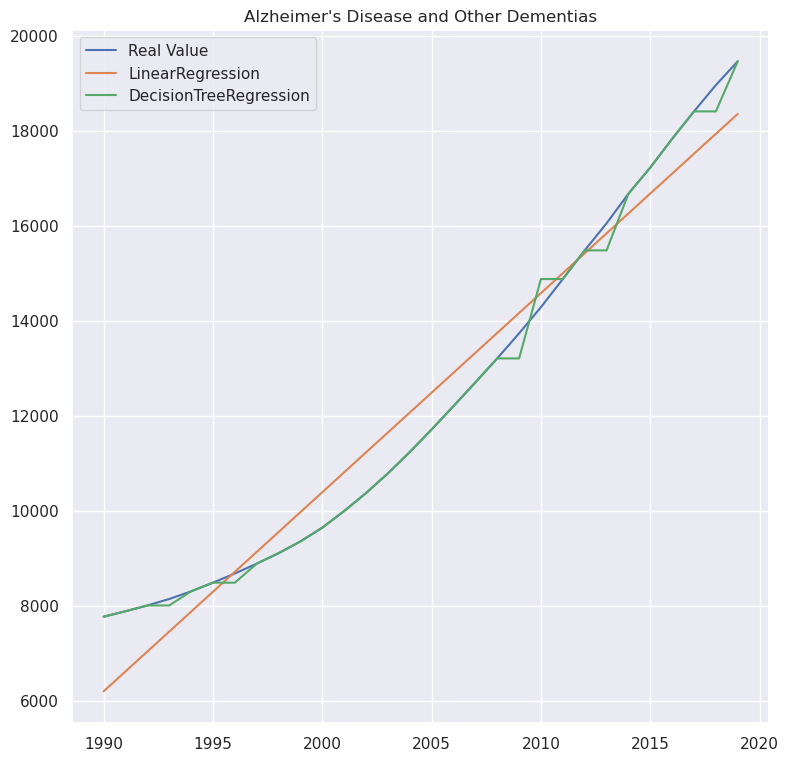

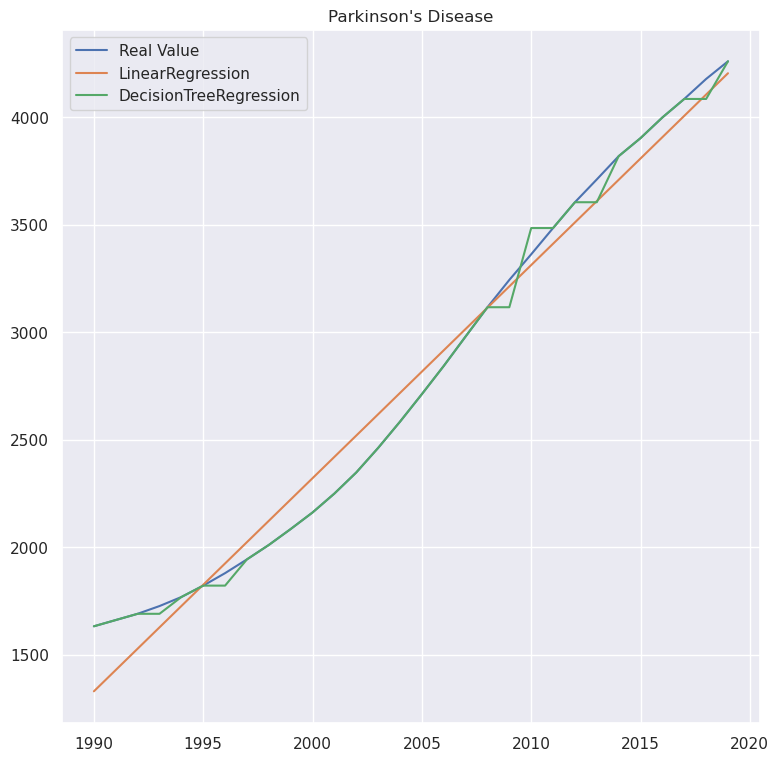

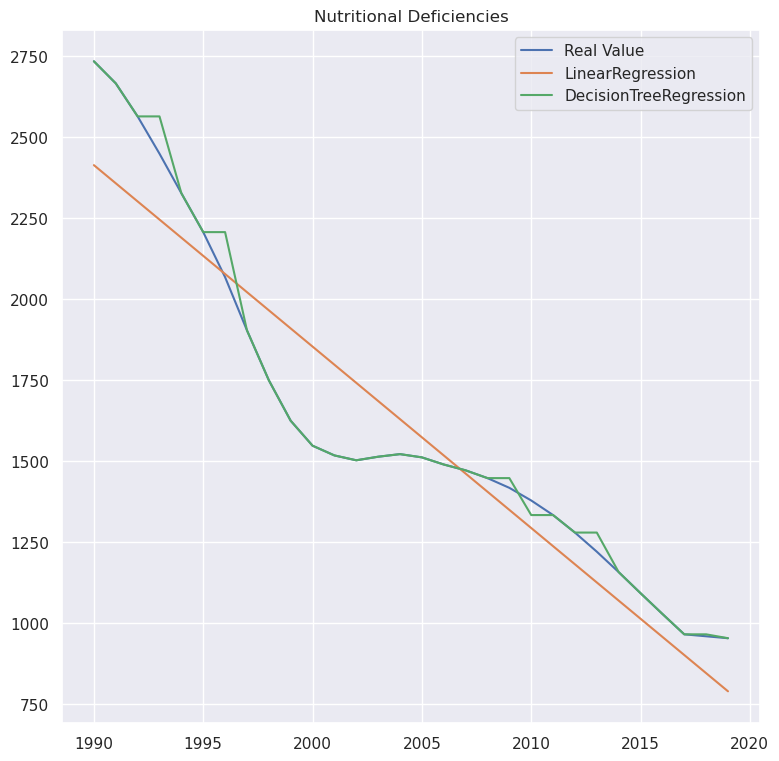

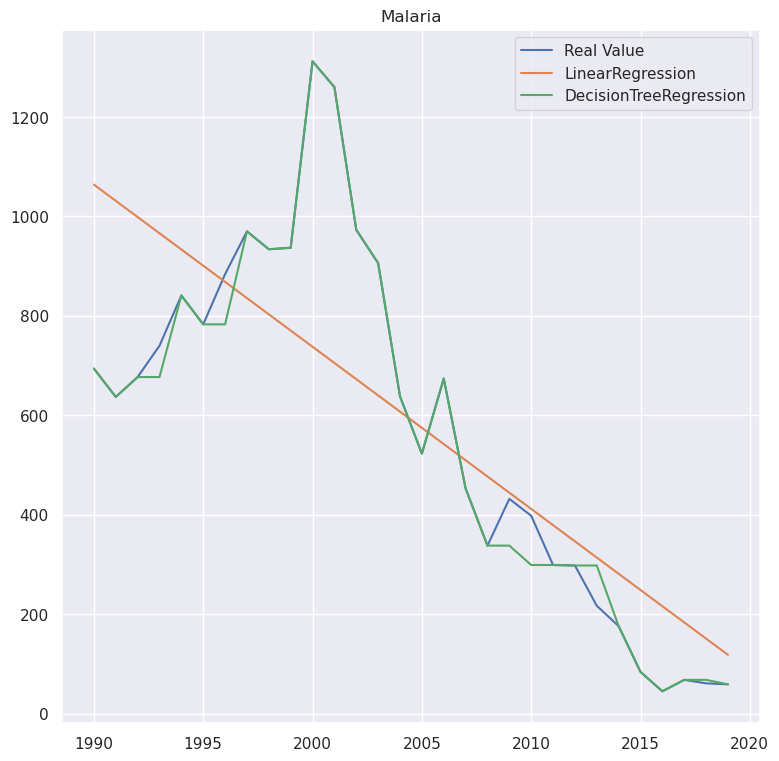

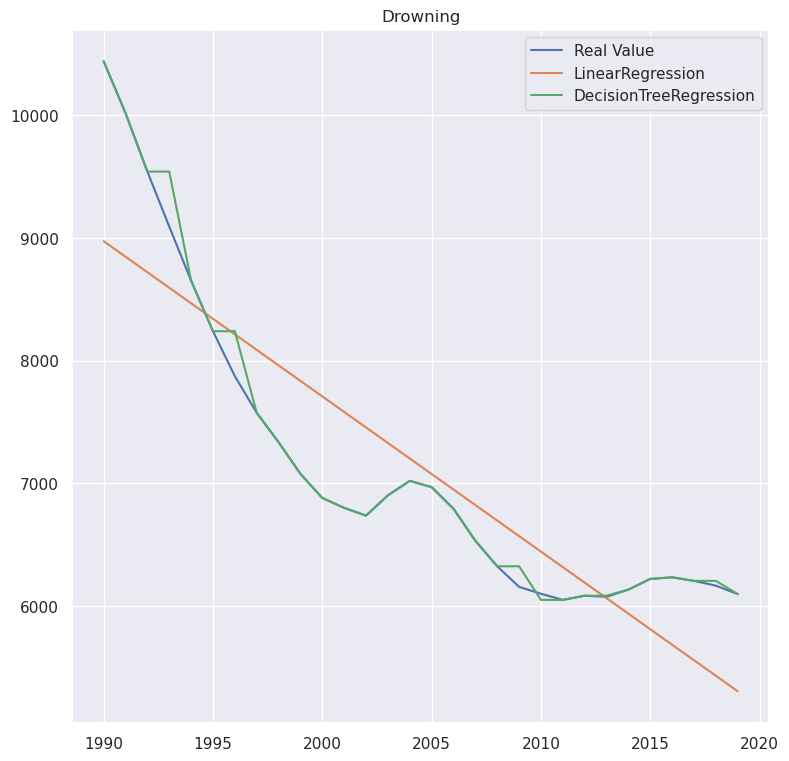

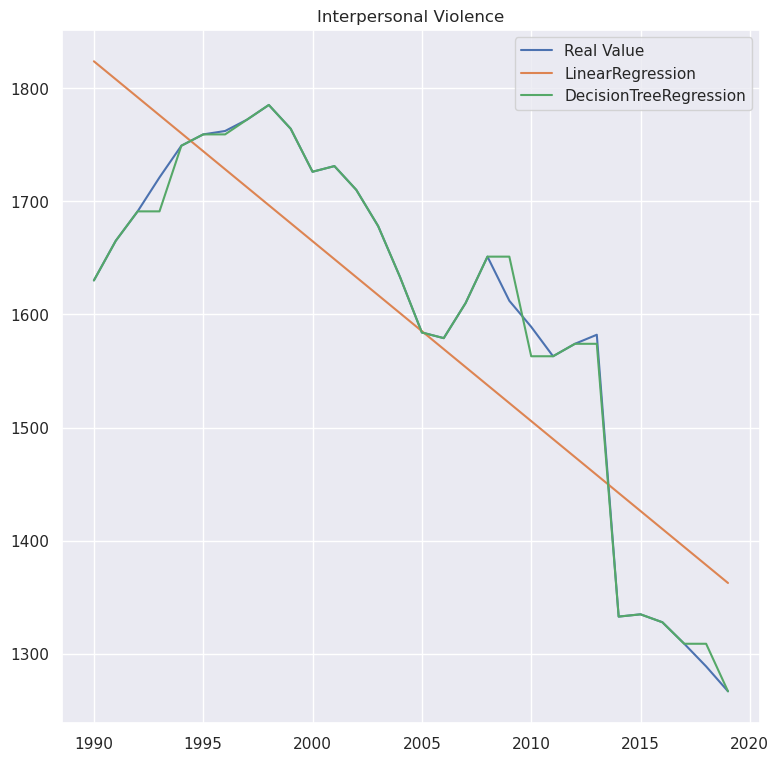

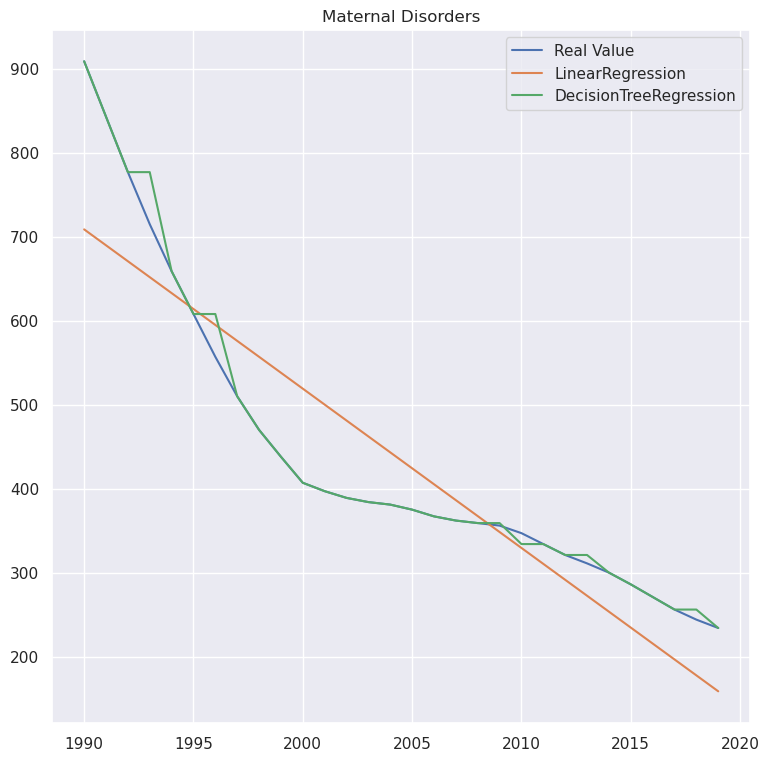

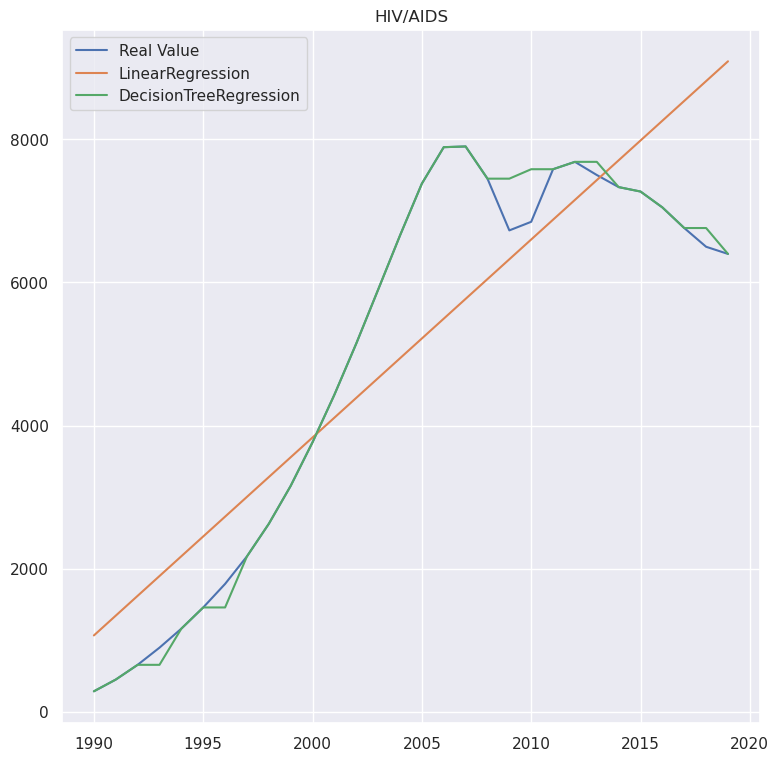

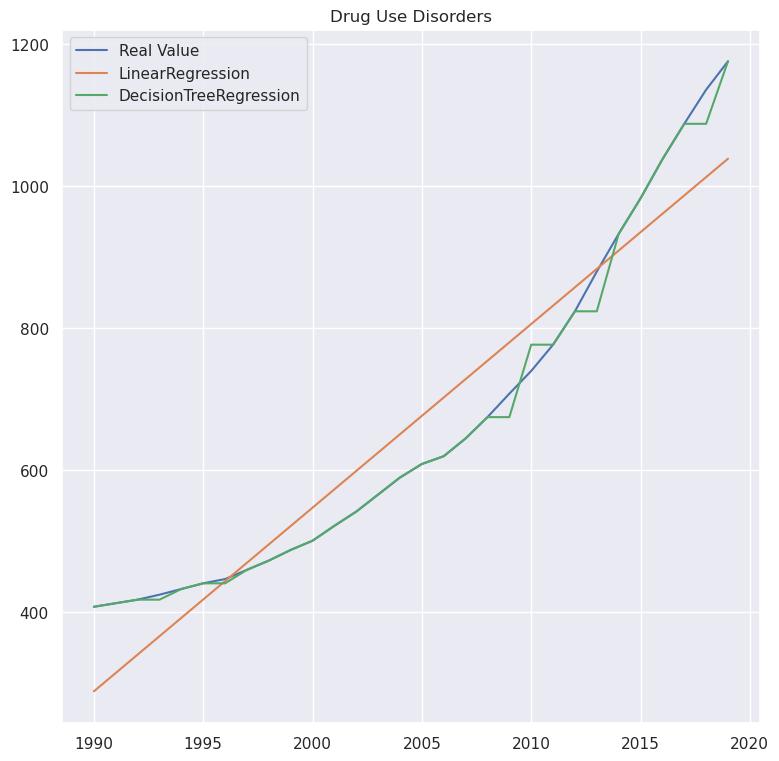

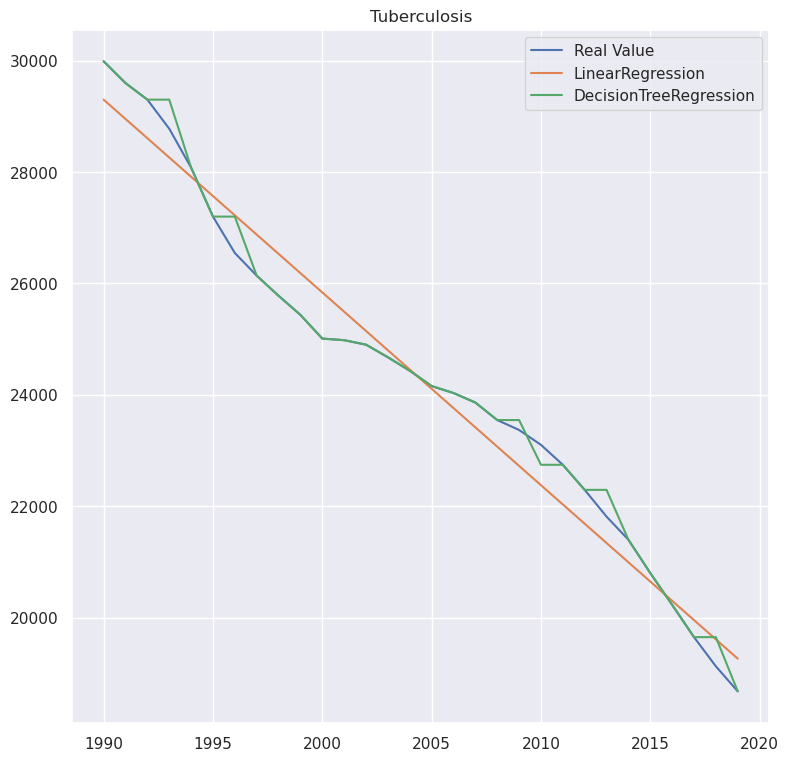

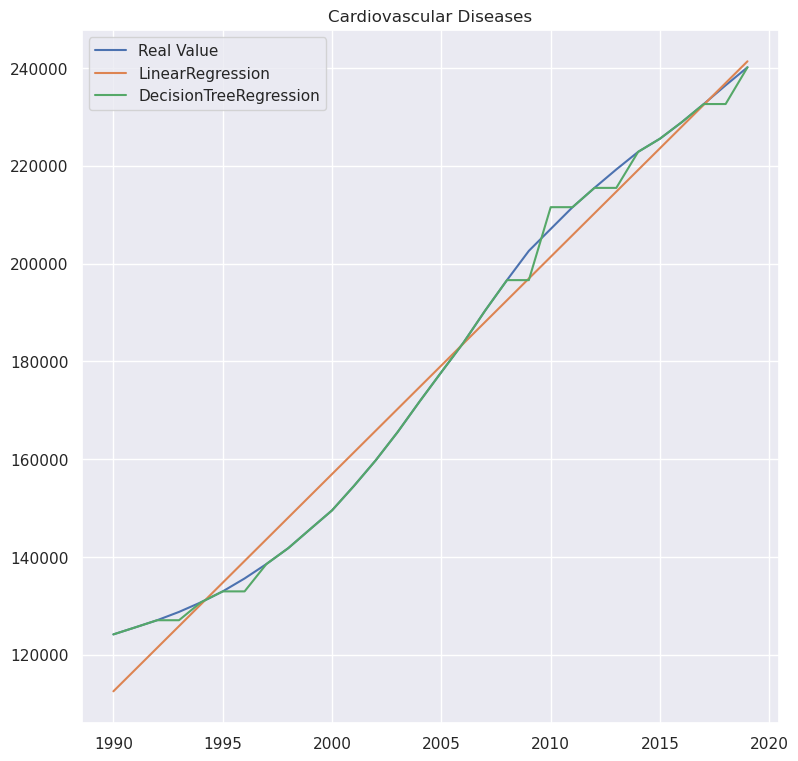

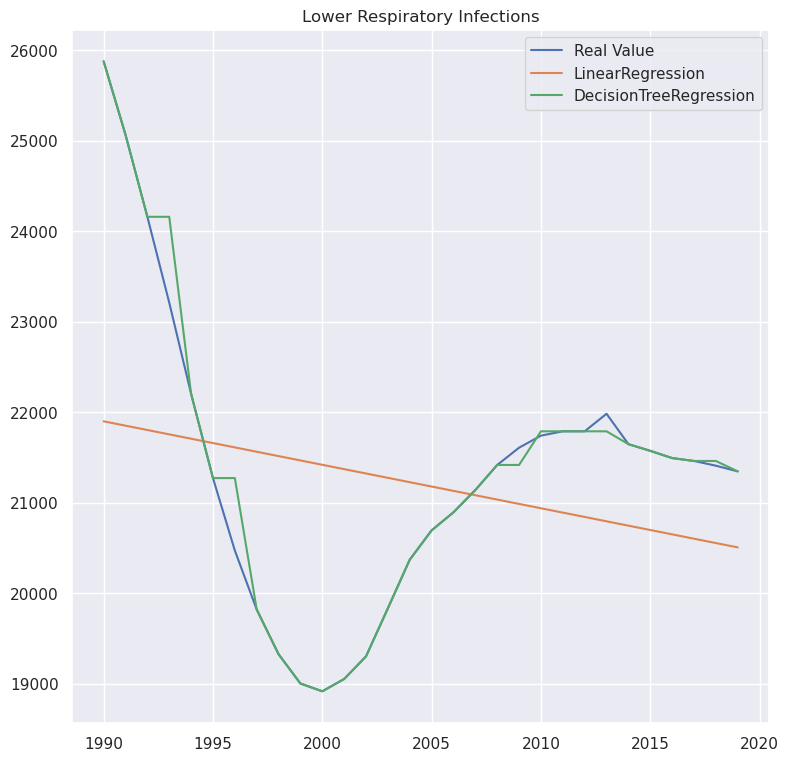

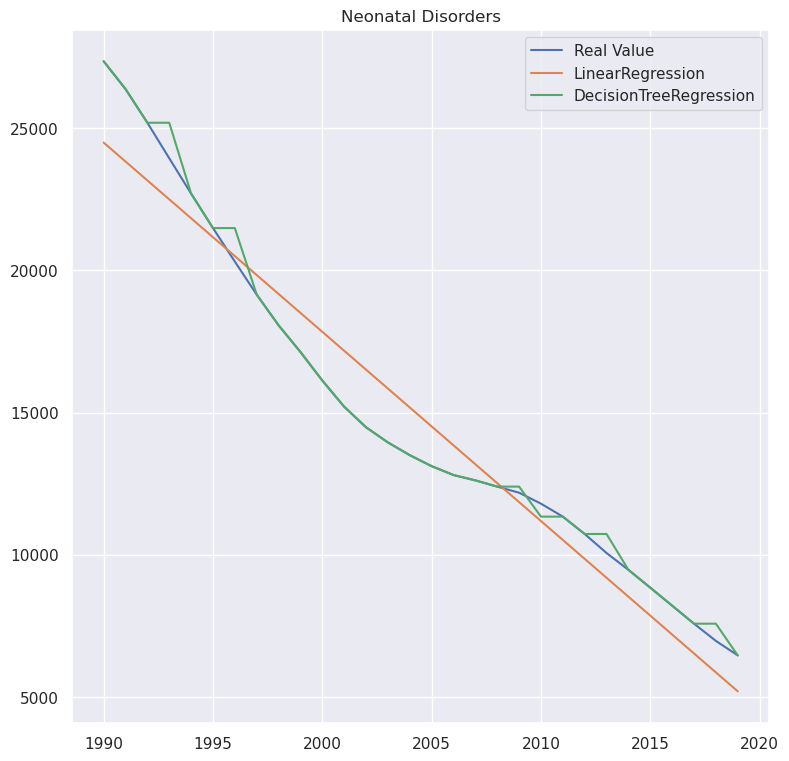

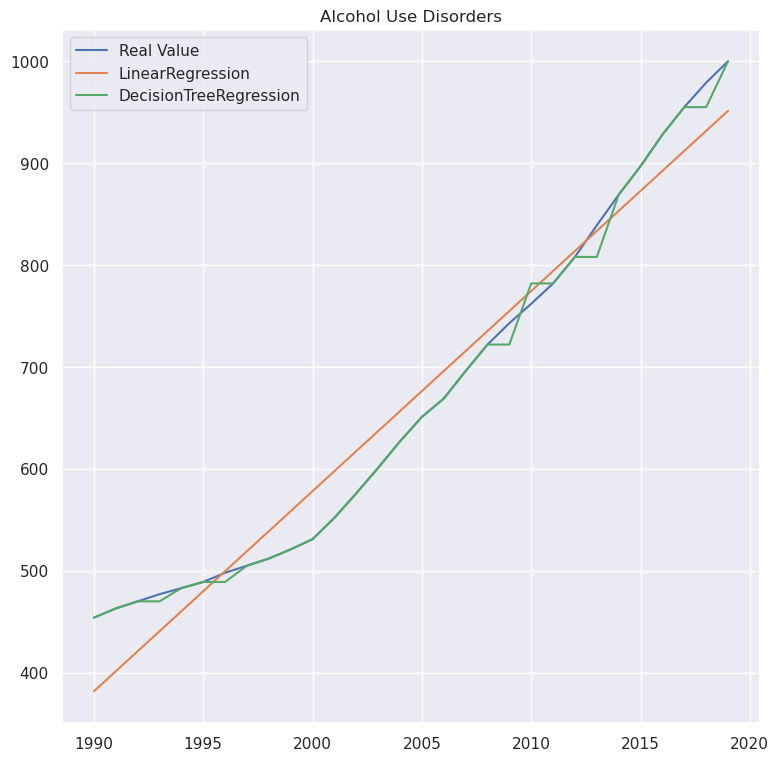

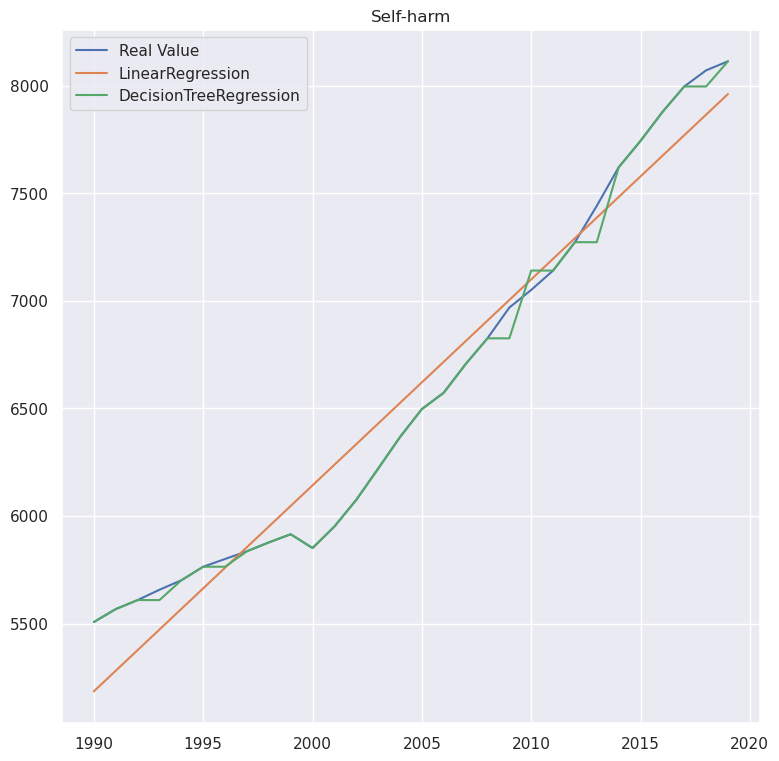

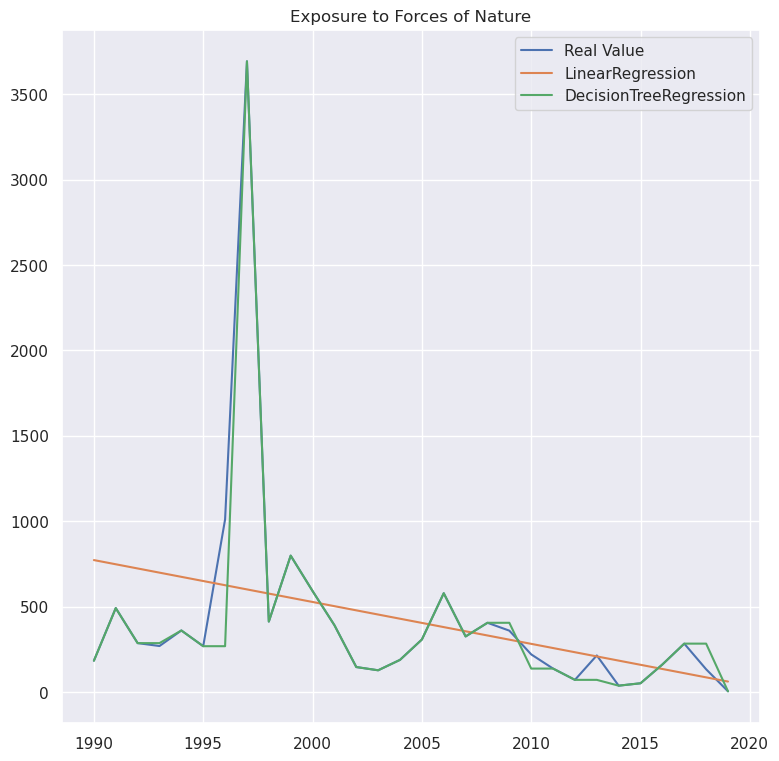

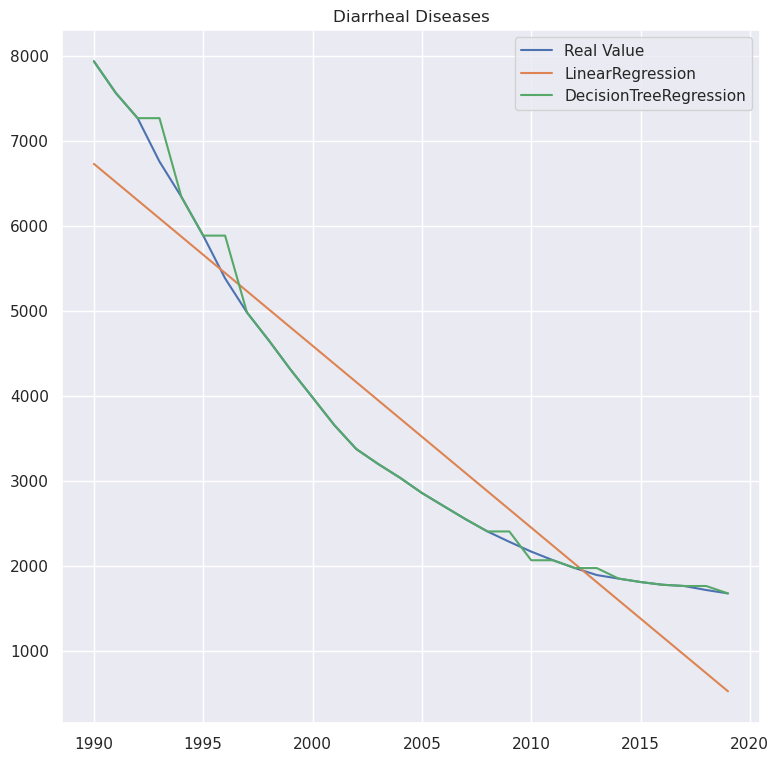

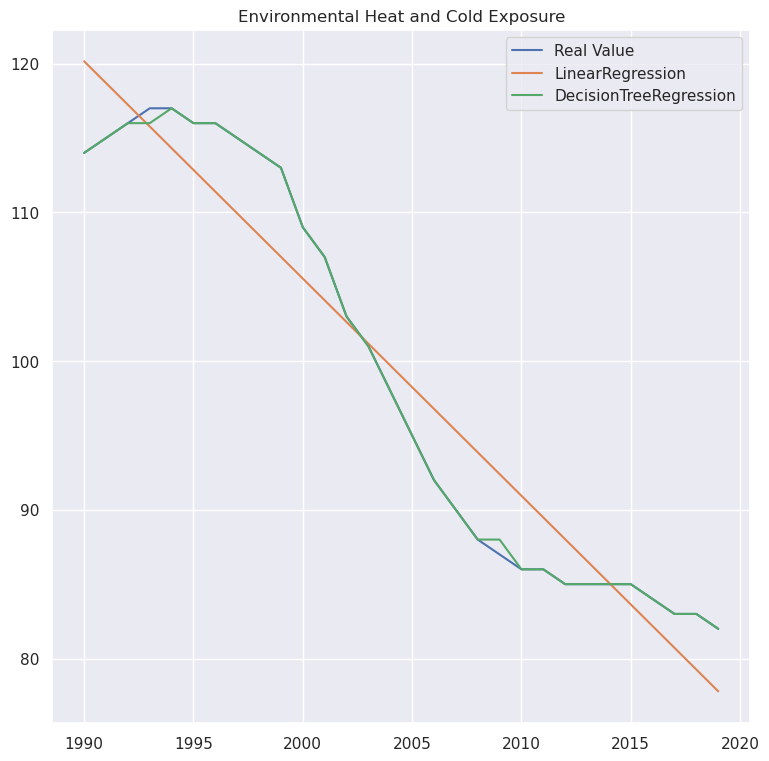

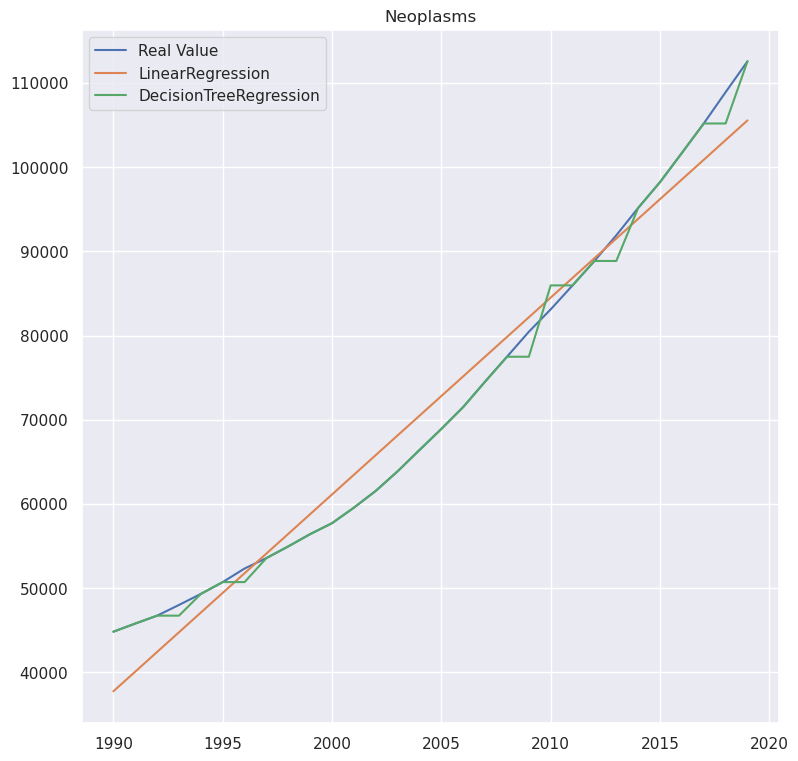

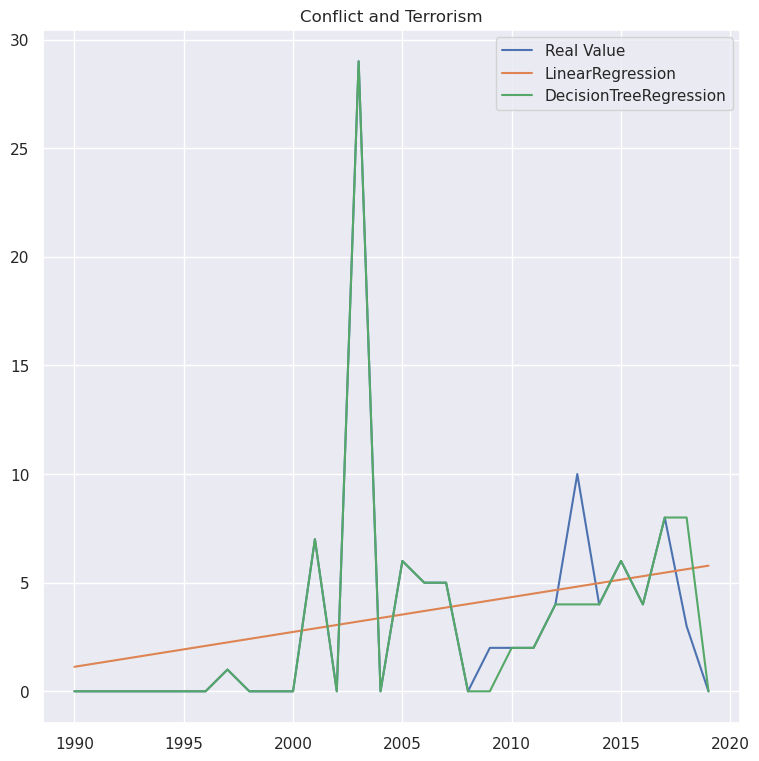

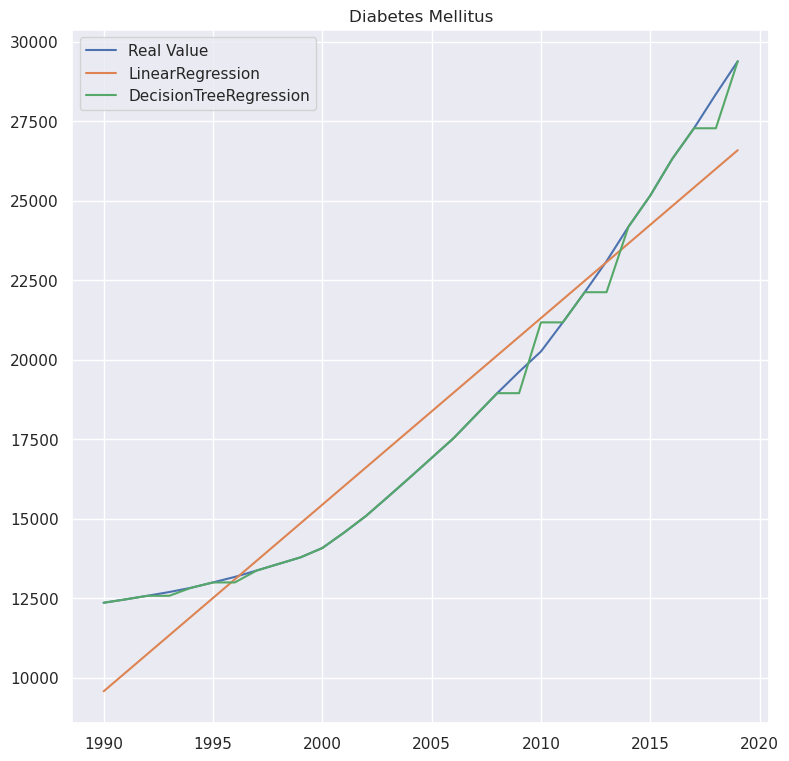

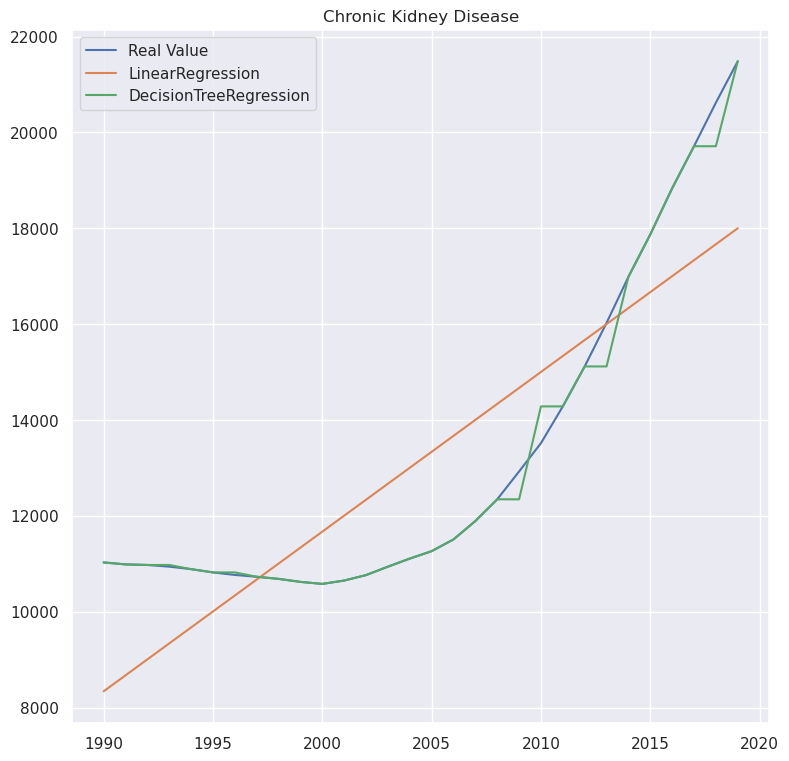

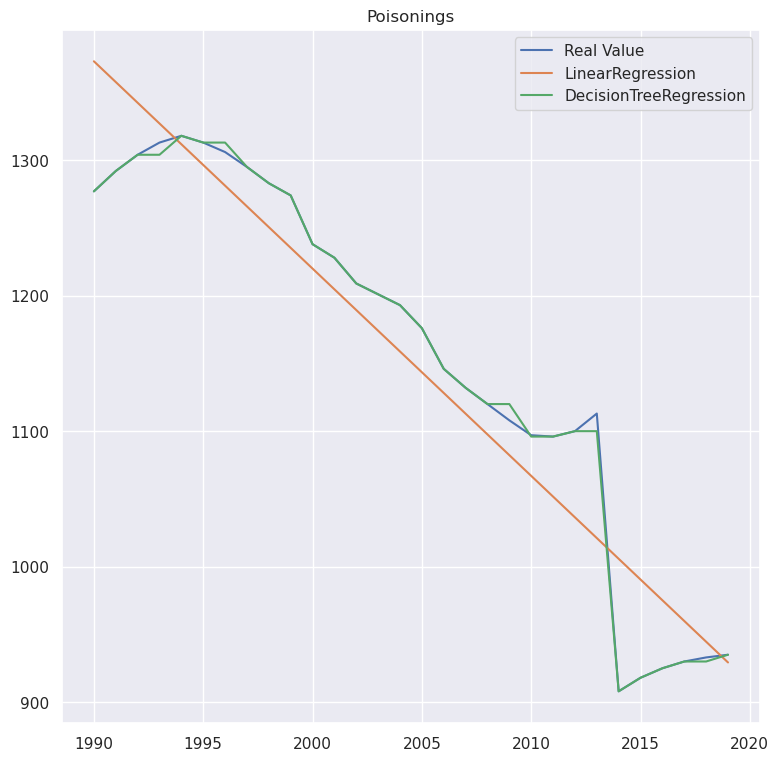

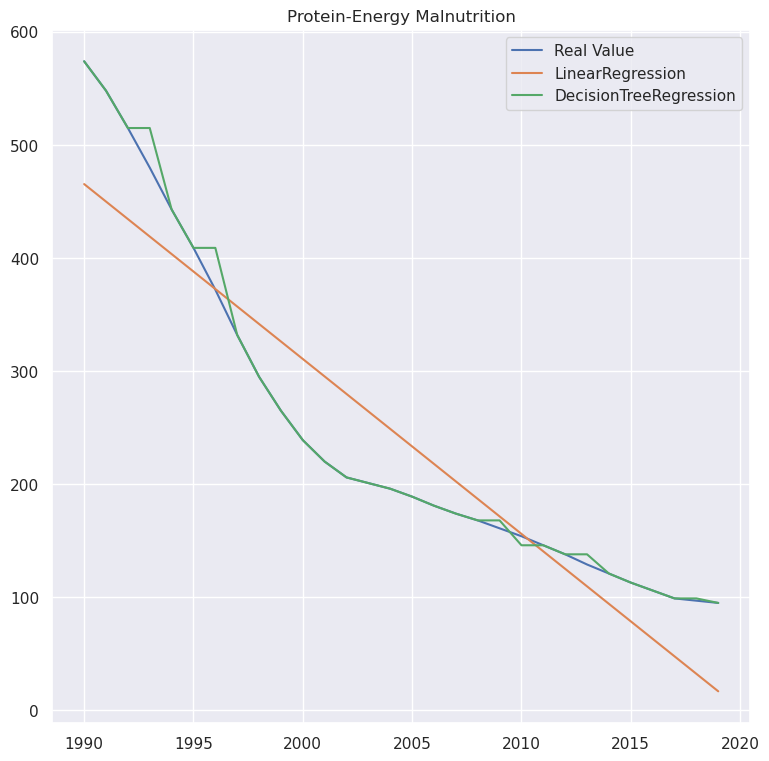

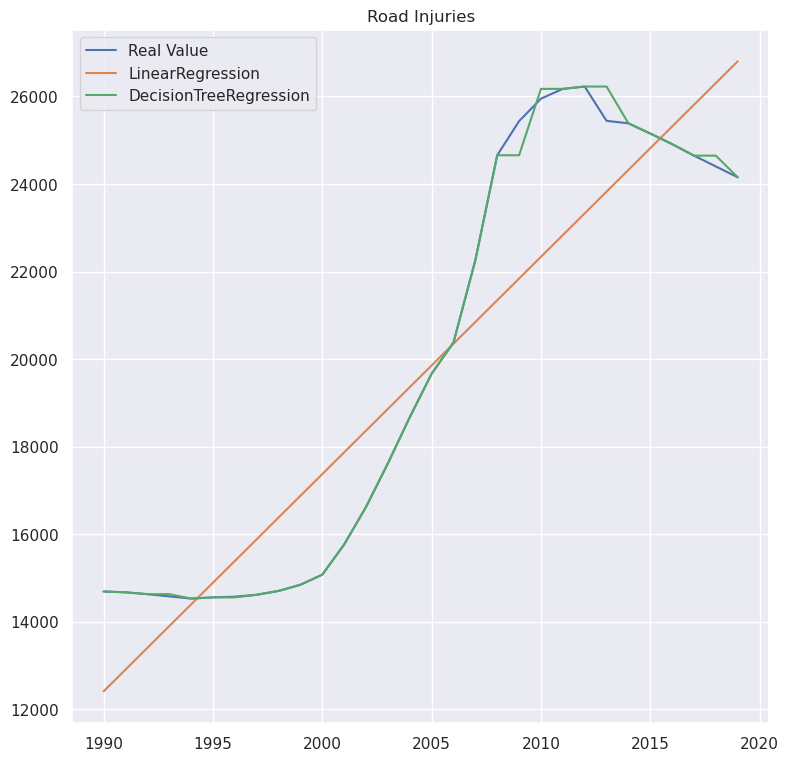

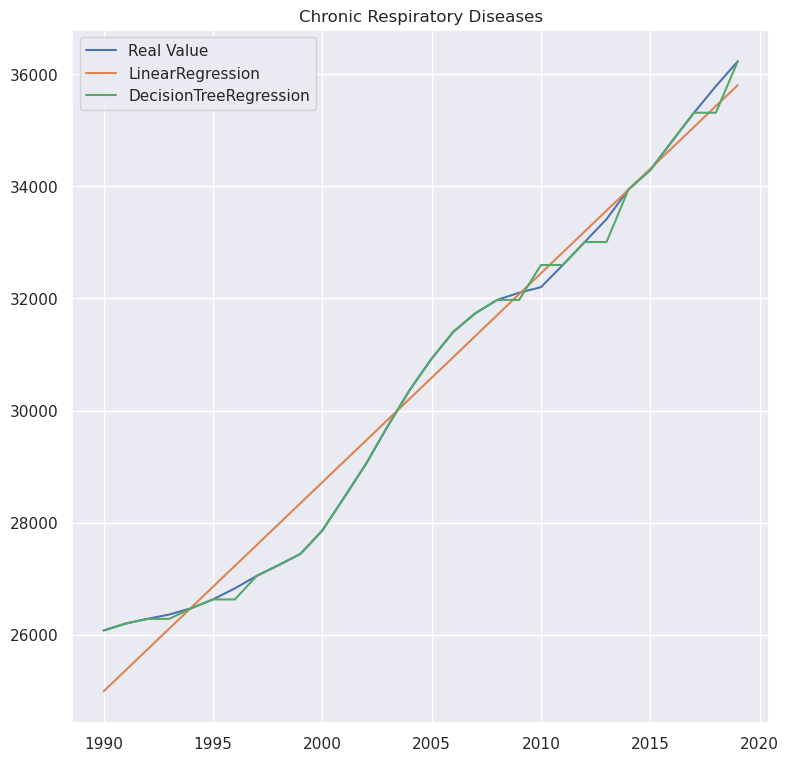

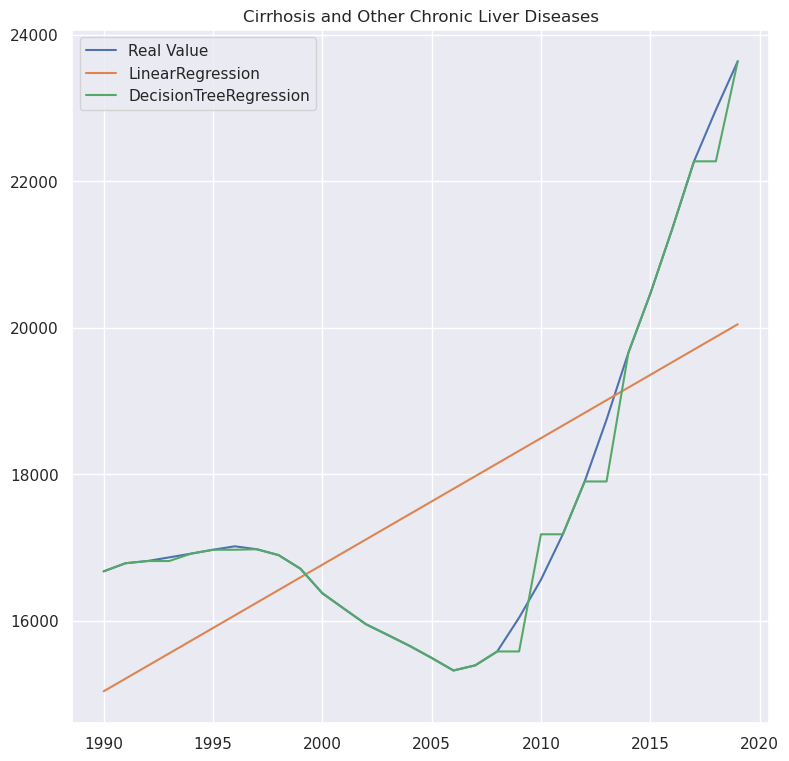

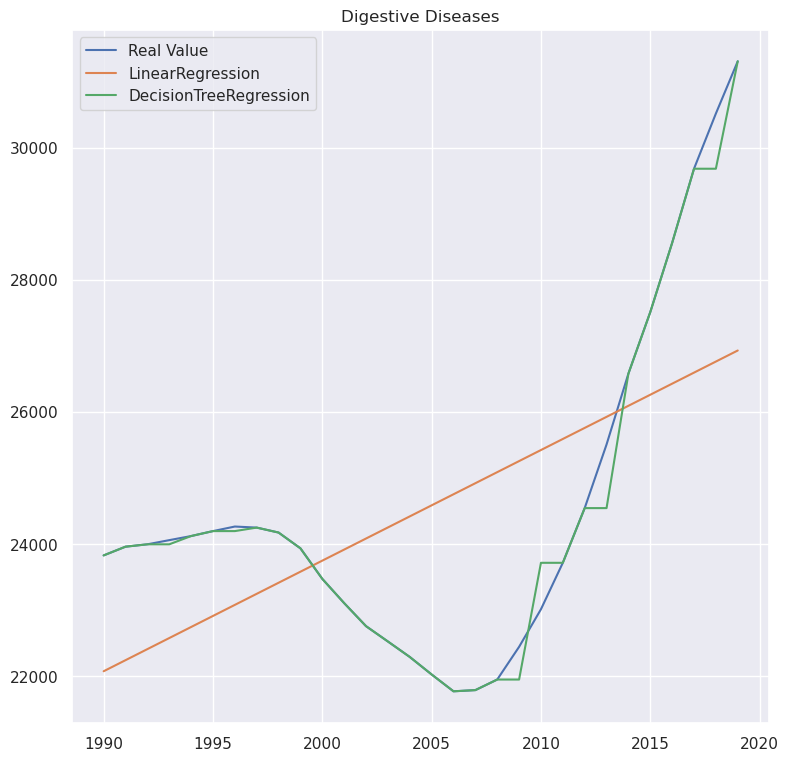

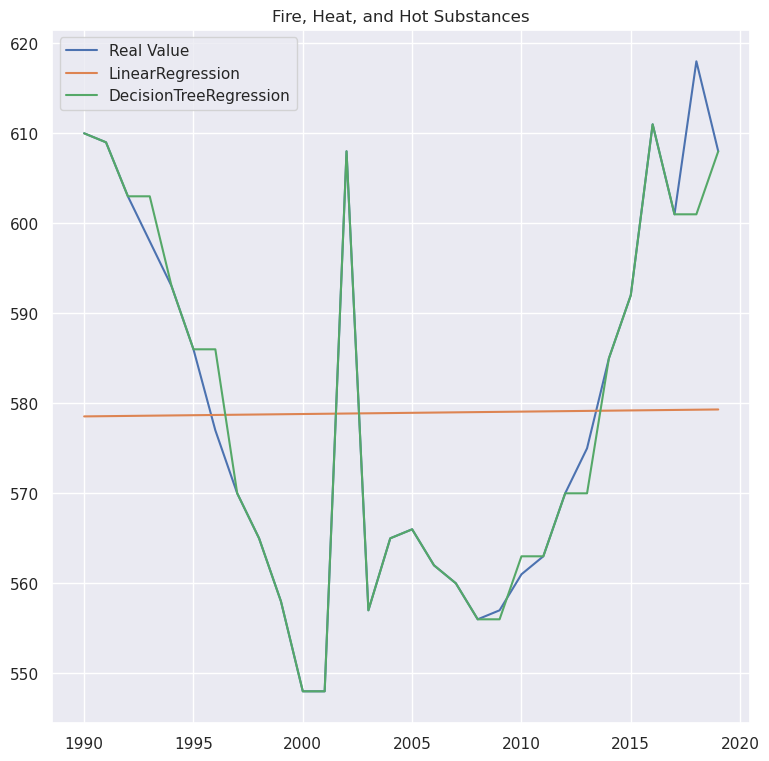

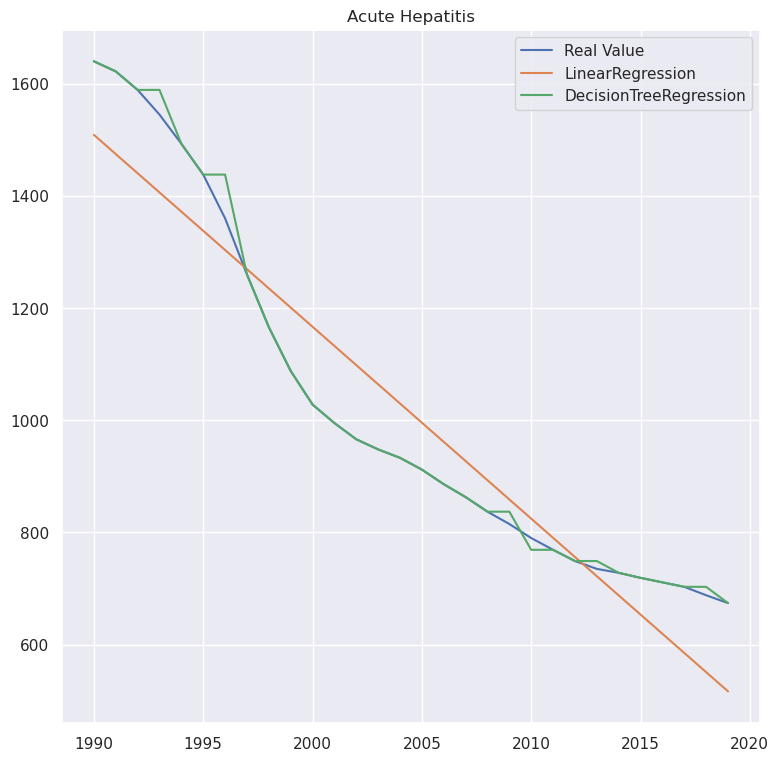

In [69]:
##So sánh các dự đoán của Decision Tree Regression so với Linear Regression

##Ta sẽ sử dụng lại biến dự đoán
year_next = decisionTree_regression_x
year_next_flatten = np.array(year_next).flatten()

compare_df_dict = {}

for name in names_cause:
    Y_Linear_regression_predict = linear_regression_vietnam[name].predict(year_next)
    Y_DecisionTree_regression_predict = decisionTree_regression_vietnam[name].predict(year_next)
    Y = np.array(vietnamese_death_df[[name]]).flatten()
    ##Normalize lai output
    Y_Linear_regression_predict = np.array(Y_Linear_regression_predict).flatten()
    Y_DecisionTree_regression_predDecisionTreeict = np.array(Y_DecisionTree_regression_predict).flatten()
    df_dict = {"Real Value":Y,"LinearRegression": Y_Linear_regression_predict, "DecisionTreeRegression": Y_DecisionTree_regression_predict}
    df = pd.DataFrame(df_dict,index = year_next_flatten + min_year)
    compare_df_dict[name] = df


for name in names_cause:
    compare_df_dict[name].sort_index().plot(figsize = (9,9), title = name)

Ta có thể thấy được rằng Decision Tree luôn ôm sát phổ trong tập dữ liệu, vì rằng chúng ta sẽ dự đoán trong tầm vực của dữ liệu

Nếu như rằng chúng ta muốn dự đoán xu hướng của dữ liệu, thì ta nên sử dụng Linear Regression, còn nếu muốn bám theo được tập dữ liệu, ta sẽ cần cân nhắc sử dụng Decision Tree